# Supplemental Materials

In [306]:
#INSTALLS
#!pip install pandas
#!pip install xlrd
#!pip install seaborn
#!pip install statsmodels
#!pip install researchpy
#!pip install scikit-posthocs

In [3]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.multicomp
import statsmodels.formula.api as sfa
#import scikit_posthocs as sp

# Suppress Warnings (not in the blog post)
import warnings
warnings.filterwarnings("ignore")

In [4]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

In [5]:
import statsmodels as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multitest import multipletests
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.sandbox.stats.multicomp import TukeyHSDResults
from scipy.stats import levene

In [6]:
from functools import reduce

In [7]:
import string
import time

In [8]:
from pandas import ExcelWriter
from pandas import ExcelFile

### Github Site for the Jupyter Notebook and the data repository

#### https://github.com/manugent/marshanalyses

## Maps of the elevation gradient and hydrological features present around the field site in the Pearl River Wildlife Management Area (WMA) near Slidell, Louisiana

In [349]:
#from IPython.display import Image
#Image(filename = "landcovermap3.jpg", width=700, height=700) 

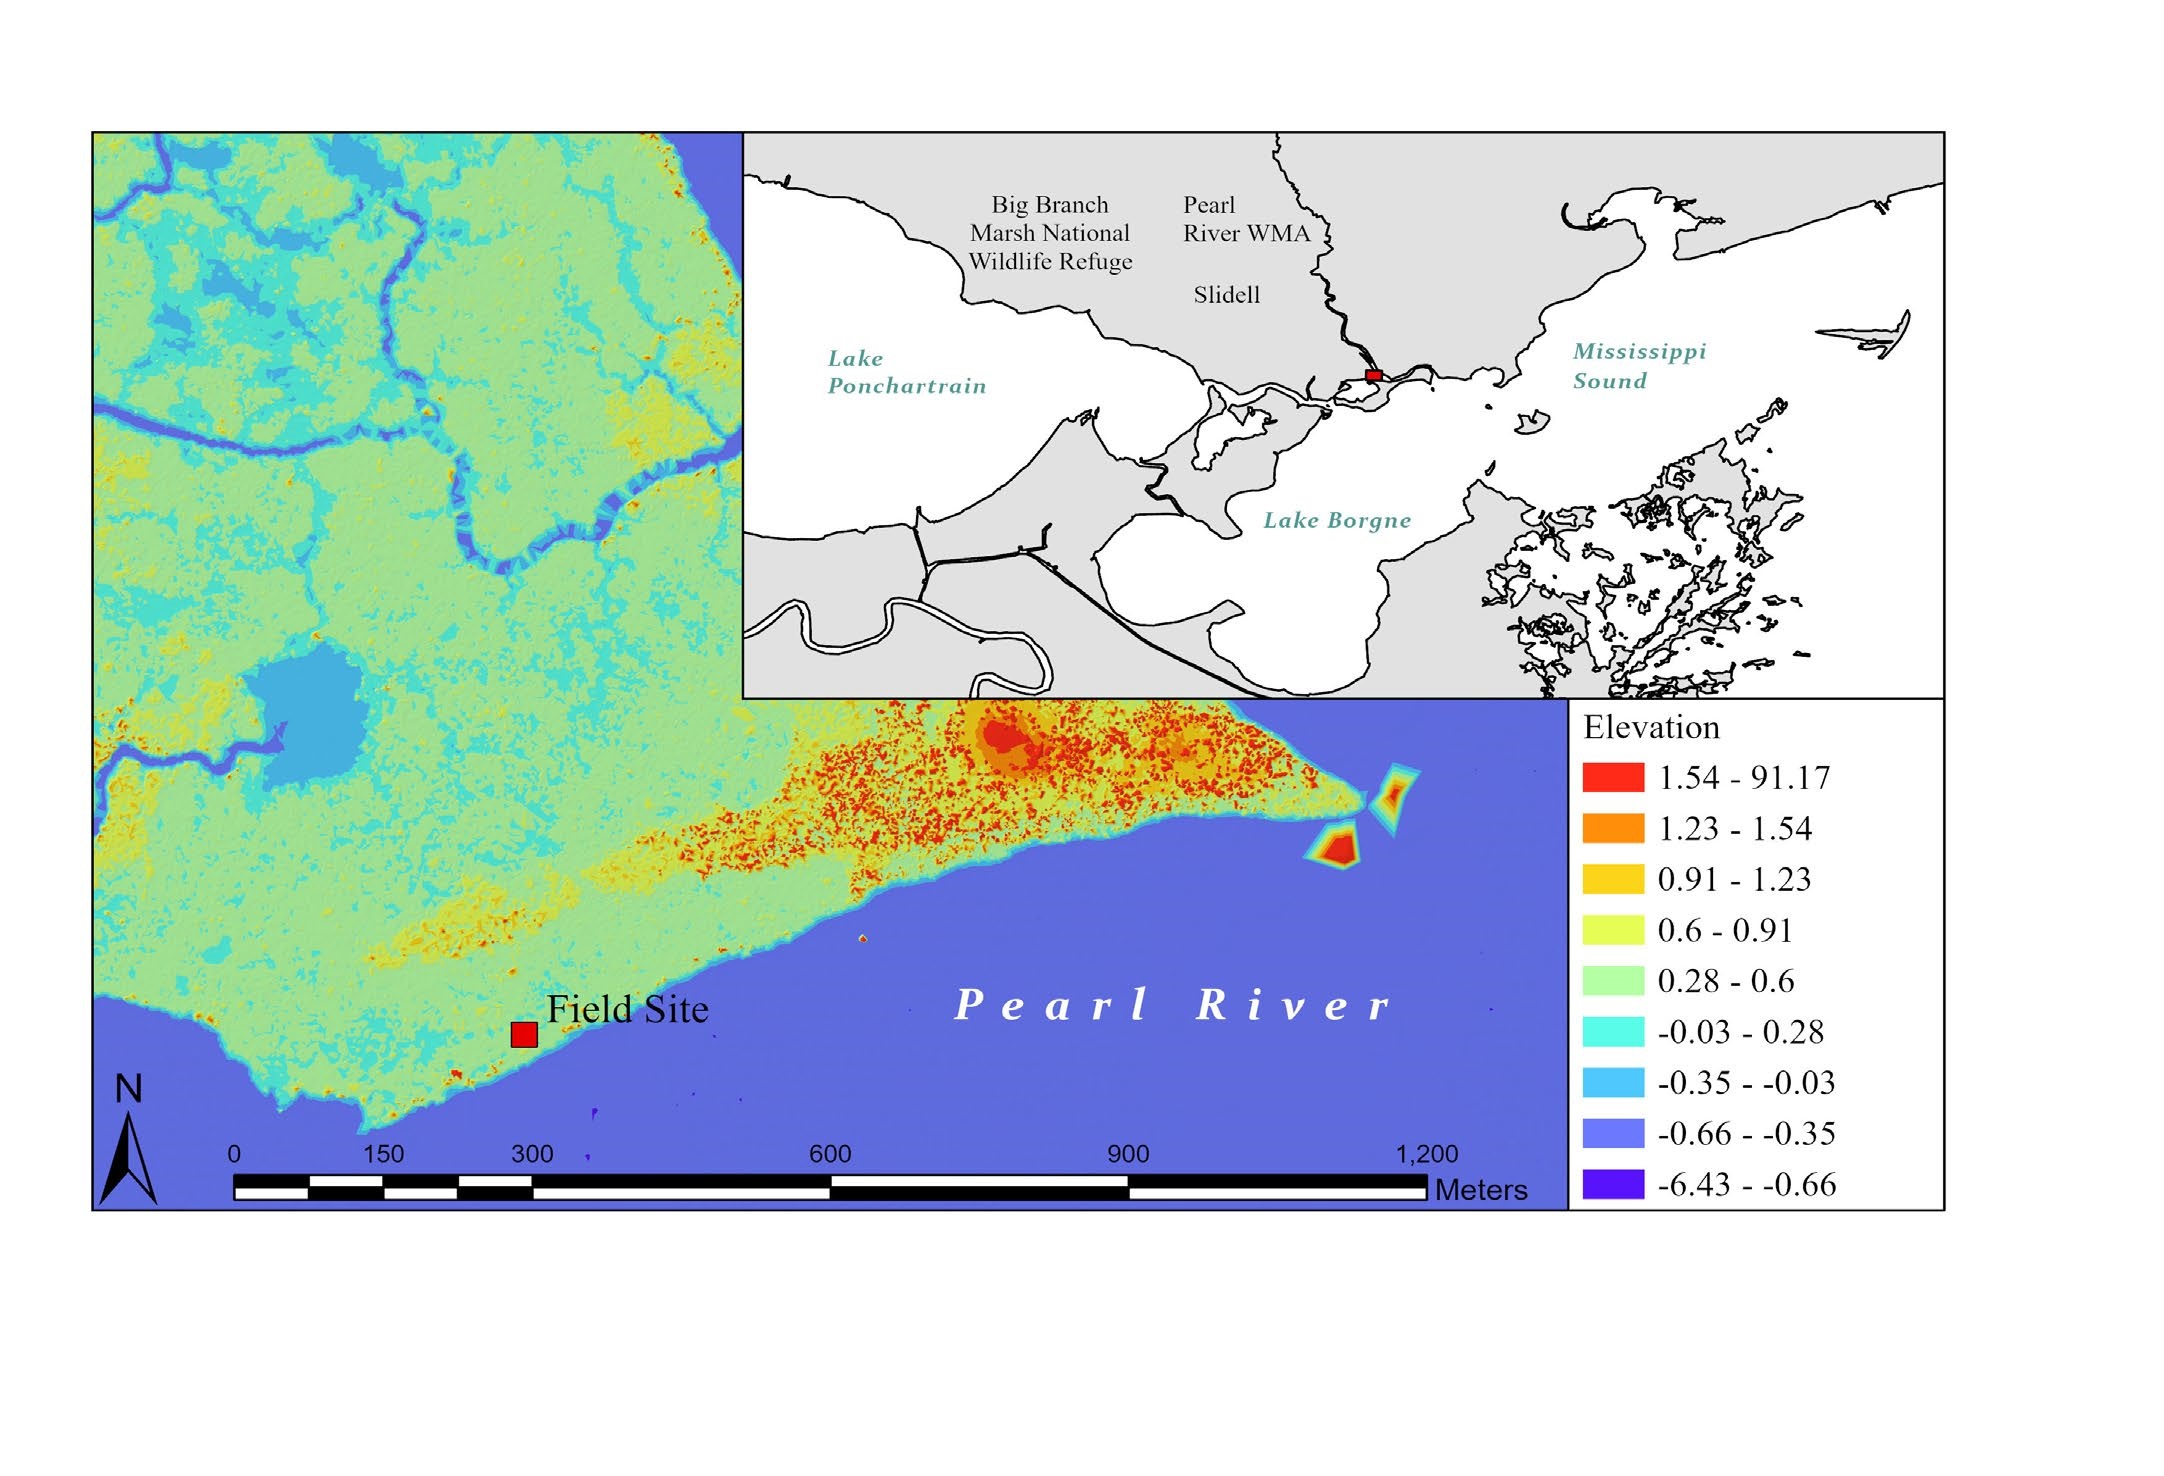

In [302]:
from IPython.display import Image
Image(filename = "map3.jpg", width=700, height=700) 

## Allometric Growth Curves

Allometric growth curve regression equations are compiled for the dominant $C^{3}$ and $C^{4}$ species. The species were collected in the study area, along the Pearl River WMA, for estimation of the aboveground biomass using the collected shoot lengths and weights.

Originally, the excel power regression option was chosen. However, we switched to the python matplot library to take advantage of the more accurate scipy.optimize option. See https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html for more information.

In [10]:
df = pd.read_excel (r'C:\Users\molli\Dropbox\Publish\Working Graphs for Publication_2020_revised.xlsx', sheet_name='Allometric', index_col=0) 
df = pd.DataFrame(df, columns= ['Length.effuses','Mass.effuses'])

In [11]:
number_column = df.loc[:,'Length.effuses']
length_e = number_column.values

number_column = df.loc[:,'Mass.effuses']
mass_e = number_column.values

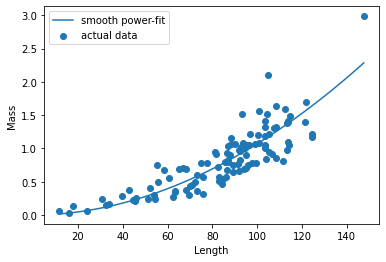

In [12]:
popt, pcov = curve_fit(lambda fx,a,b: a*fx**-b,  length_e,  mass_e)
x_linspace = np.linspace(min(length_e), max(length_e), 100)
power_y = popt[0]*x_linspace**-popt[1]

plt.scatter(length_e, mass_e, label='actual data')
plt.plot(x_linspace, power_y, label='smooth power-fit')
plt.xlabel('Length')
plt.ylabel('Mass')
plt.legend()
plt.show()

# equation
a=popt[0].round(4)
b=popt[1].round(4)
#print(f'The equation of regression line is y={a}x^{-b} - Juncus effuses') #y={a}x^{b}

The equation of regression line is $y=0.0001x^{1.9481}$ for Juncus effuses

In [13]:
#Function to calculate the power-law with constants a and b
def power_law(x, a, b):
    return a*np.power(x, b)

popt, pcov = curve_fit(f=power_law, xdata = length_e,  ydata = mass_e)
residuals = mass_e - power_law(length_e, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((mass_e -np.mean(mass_e))**2)
r_squared = 1 - (ss_res / ss_tot)
#print(f'The r squared value is {r_squared}')

The r squared value is 0.74919.

In [14]:
# dropping the rows having NaN values 
df = pd.read_excel (r'C:\Users\molli\Dropbox\Publish\Working Graphs for Publication_2020_revised.xlsx', sheet_name='Allometric', index_col=0) 
df = pd.DataFrame(df, columns= ['Length.effuses','Mass.effuses','Length.roemarianus','Mass.roemarianus'])
#df['sediments'] = df['sediments'].apply(str)
# using dropna() function     
df = df.dropna() 

In [15]:
number_column = df.loc[:,'Length.roemarianus']
length_r = number_column.values
number_column = df.loc[:,'Mass.roemarianus']
mass_r = number_column.values

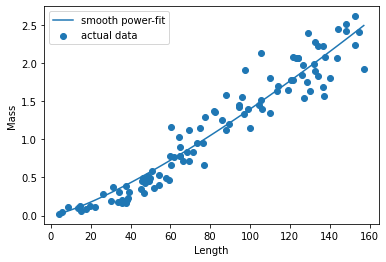

In [16]:
popt, pcov = curve_fit(lambda fx,a,b: a*fx**-b,  length_r,  mass_r)
x_linspace = np.linspace(min(length_r), max(length_r), 100)
power_y = popt[0]*x_linspace**-popt[1]

plt.scatter(length_r, mass_r, label='actual data')
plt.plot(x_linspace, power_y, label='smooth power-fit')
plt.xlabel('Length')
plt.ylabel('Mass')
plt.legend()
plt.show()
#https://stackoverflow.com/questions/32121877/how-do-i-replicate-excels-power-trendline-in-python
#https://towardsdatascience.com/basic-curve-fitting-of-scientific-data-with-python-9592244a2509
#https://towardsdatascience.com/modeling-functions-78704936477a

# equation
a=popt[0].round(4)
b=popt[1].round(4)
#print(f'The equation of regression line is y={a}x^{-b} - Juncus roemarianus') #y={a}x^{b}

The equation of regression line is $y=0.0038x^{1.2822}$ for Juncus roemarianus 

In [17]:
#Function to calculate the power-law with constants a and b
def power_law(x, a, b):
    return a*np.power(x, b)
popt, pcov = curve_fit(f=power_law, xdata = length_r,  ydata = mass_r)
residuals = mass_r- power_law(length_r, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((mass_r-np.mean(mass_r))**2)
r_squared = 1 - (ss_res / ss_tot)
#print(f'The r squared value is {r_squared}')

The r squared value is 0.922916.

In [18]:
# Creates a indexes DataFrame using arrays.
import pandas as pd 
data = {'Study':['Collected during this study', 'Collected during this study', 'Temple et al in print', 'Temple et al in print', 'Thursby et al 2002'],
        'Species':[ 'Juncus effuses', 'Juncus roemarianus', 'Schoenoplectus americanus', 'Spartina patens', 'Spartina alternflora'],
        'Power regression equation':['$y=0.00014x^{1.948}$', '$y=0.0038x^{1.282}$', '$y=0.0018x^{1.3504}$', '$y=0.0003x^{1.757}$', '$y=0.0002x^{2.21}$'],
        'R squared': [0.749,0.922,0.753,0.835,0.887]
       }

df = pd.DataFrame(data, index = ['1', '2', '3', '4', '5']) 
pd.options.display.max_columns = None
df.style

,Study,Species,Power regression equation,R squared
1,Collected during this study,Juncus effuses,$y=0.00014x^{1.948}$,0.749000
2,Collected during this study,Juncus roemarianus,$y=0.0038x^{1.282}$,0.922000
3,Temple et al in print,Schoenoplectus americanus,$y=0.0018x^{1.3504}$,0.753000
4,Temple et al in print,Spartina patens,$y=0.0003x^{1.757}$,0.835000
5,Thursby et al 2002,Spartina alternflora,$y=0.0002x^{2.21}$,0.887000


This is the list of allometric growth curve equations, targeted species, power equations, and their references.

### Table Summary of the Two-Way ANOVAs completed, with necessary transformations and plot removals

In [323]:
# Creates a indexes DataFrame using arrays.
import pandas as pd 
data = {'Data Type':['AGBM Initial Spring', 'AGBM proportional change', 'AG Stem Density', 'AGBM Standing', 'AGBM Senesced Material', 'AGBM Harvest (standing + litter)', 'Initial Elevation Change (+5 days)', 'SET Rate of Change (ROC)', 'SET Net Change', 'BGBM Original Sod', 'BGBM New Sediment Layer', 'Total BGBM', 'Decomposition', 'Bulk Density', 'Water Content', 'Organic Matter Content', 'Nitrate Concentrations', 'Phosphate Concentrations'],
        'Metric':['$g$ $m^{2}$', '$proportion$ $remaining$', '$proportion$ $remaining$', '$g$ $m^{2}$', '$g$ $m^{2}$', '$g$ $m^{2}$', '$mm$', '$mm$ $y^{-1}$', '$mm$', '$g$ $m^{3}$ $mon^{-1}$', '$g$ $m^{3}$ $mon^{-1}$', '$g$ $m^{3}$ $mon^{-1}$', '% $AFDM$', '$g$ $m^{3}$', '% $WC$', '% $OMC$', '$NH_4^+$', '$PO_4^{3-}$'],
        'Transformation':['None', 'Square root (x+1)', 'Square root', 'Square root', 'None', 'Natural log', 'None', 'None', 'None', 'Natural log', 'Natural log', 'Natural log', 'None', 'Square root', 'None', 'None', 'Natural log', 'Natural log'],
        'Outliers etc.': ['None','0S10,0S11,3S10,6S11,9S10,12S10','6S11','Infinite values were replaced with zeroes ','None', 'None', 'None', 'None', 'None', 'None', '9S2 removed', '9S2 New removed', 'None', 'None', 'None', 'None', 'Negative values were replaced with zero for the fall season', 'None']
       }

df = pd.DataFrame(data, index = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18']) 
pd.options.display.max_columns = None
df.style

,Data Type,Metric,Transformation,Outliers etc.
1,AGBM Initial Spring,$g$ $m^{2}$,None,None
2,AGBM proportional change,$proportion$ $remaining$,Square root (x+1),"0S10,0S11,3S10,6S11,9S10,12S10"
3,AG Stem Density,$proportion$ $remaining$,Square root,6S11
4,AGBM Standing,$g$ $m^{2}$,Square root,Infinite values were replaced with zeroes
5,AGBM Senesced Material,$g$ $m^{2}$,None,None
6,AGBM Harvest (standing + litter),$g$ $m^{2}$,Natural log,None
7,Initial Elevation Change (+5 days),$mm$,None,None
8,SET Rate of Change (ROC),$mm$ $y^{-1}$,None,None
9,SET Net Change,$mm$,None,None
10,BGBM Original Sod,$g$ $m^{3}$ $mon^{-1}$,Natural log,None


This is a synopsis of all the strategies using for transforming the data. Transformations and outlier removals were necessary to meet the normality assumption for the Shapiro Wilkes Normality test and to meet to homoscedasticity requirement for all the groups for the Levene's Test.

## Aboveground Production using Allometric Growth Curves

We collected biomass estimates based on the power regression equations (above) and known stem lengths of plants collected for each mesocosm during the four seasons.

In [20]:
#Reading the data
df = pd.read_excel (r'C:\Users\molli\Dropbox\Publish\Working Graphs for Publication_2020_revised.xlsx', sheet_name='AGseasons', index_col=0) 
df = pd.DataFrame(df, columns= ['plots','Season','Species','Biomass_old','Length_cm'])
#df['Species'].unique()

In [21]:
# write the dictionary
def CalculateBiomass (df_name, plots, sediment, nutrient, seasons, species, lengths, biomass):
    calculations = {
            'unknown'  : 0.00,
            'small unknown' : 0.00,
            'big unknown' : 0.00,
            'SYDI' : 0.00,
            'SPCY' : 0.00, #df_name[biomass],
            'SPAL' : 0.0002*df_name[lengths]**2.21,
            'SPPA' : 0.0003*df_name[lengths]**1.757,
            'SCAM' : 0.0018*df_name[lengths]**1.3504,
            'JURO' : 0.0038*df_name[lengths]**1.2822,
            'JUEF' : 0.00014*df_name[lengths]**1.9281
            }
    df_method = df_name[species]
    return calculations.get(df_method, "not in dict")

# call the function inside a lambda
df['Biomass_2'] = df.apply(lambda row: CalculateBiomass(
row,
plots = 'plots',
seasons = 'Season',
species = 'Species',
sediment = 'sediments',
nutrient = 'nutrients',
biomass = 'Biomass_old',
lengths = 'Length_cm'), axis = 1)

In [22]:
df_1 = df.loc[df['Season'] == 'Spring']
spring = df_1.groupby(['plots'], as_index=False)['Biomass_2'].sum()
spring = spring.rename(columns={"Biomass_2": "Spring"})
spring['Spring'] = (spring['Spring']/0.071)

In [23]:
df_1 = df.loc[df['Season'] == 'Summer']
summer = df_1.groupby(['plots'], as_index=False)['Biomass_2'].sum()
summer = summer.rename(columns={"Biomass_2": "Summer"})
summer['Summer'] = (summer['Summer']/0.071)

In [24]:
df_1 = df.loc[df['Season'] == 'Winter']
winter = df_1.groupby(['plots'], as_index=False)['Biomass_2'].sum()
winter = winter.rename(columns={"Biomass_2": "Winter"})
winter['Winter'] = (winter['Winter']/0.071)

In [25]:
dfs = [spring, summer, winter]
df_final = reduce(lambda left,right: pd.merge(left,right,on='plots'), dfs)
df_final['PropF'] = (df_final['Winter'] - df_final['Spring'])/(df_final['Spring'])
df_final['PropFplus1'] = (df_final['PropF'] + 1.00)
df_final['PropFln'] = np.log(df_final['PropFplus1'])
df_final.set_index('plots');

These are the ANOVA results for the initial aboveground (AG) biomass estimates ($g$ $m^{2}$) and the proportional changes of the plant biomass from the start and end of the experiment. The senesced material was derived from the litter material collected throughout the study period ($g$ $m^{2}$). The standing harvest ($g$ $m^{2}$) was derived from the standing live and dead vegetation extracted at the end of the trial period. The "total" harvest estimate was the sum of all the litter and standing (live and dead) biomass that accumulated in each mesocosm.

### 1. Initial aboveground biomass estimates from the spring

During the Spring, when the experiment began, the biomass for all the mesocosms was not statistically different.

#### Two-way ANOVA

In [311]:
#Reading the data
df5 = pd.read_excel (r'C:\Users\molli\Dropbox\Publish\Working Graphs for Publication_2020_revised.xlsx', sheet_name='AGHarvest') #index_col=0 
df5 = pd.DataFrame(df5, columns= ['sediments','nutrients'])
df5['sediments'] = df5['sediments'].astype('str')

In [312]:
df = pd.concat([df5, df_final], axis=1)

In [28]:
zero_df = df.query('sediments == "0"')
thirty_df = df.query('sediments == "13"')
sixty_df = df.query('sediments == "35"')
ninety_df = df.query('sediments == "50"')
onetwenty_df = df.query('sediments == "75"')

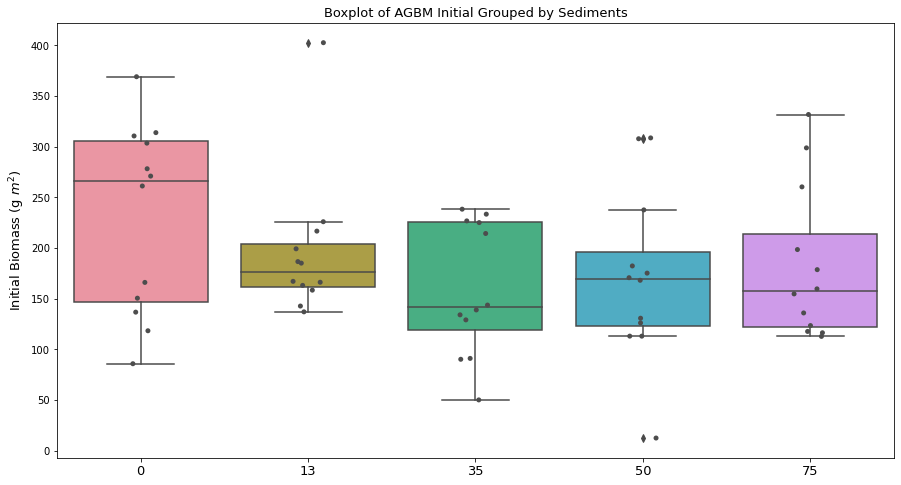

In [29]:
#I visualise the data using the seaborn library to create a boxplot of the subsidence for each sediment treatment.
#The middle line is the median.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="sediments", y="Spring", data=df, order=["0","13","35","50","75"]) 
sns.stripplot(x="sediments", y="Spring", data=df, order=["0","13","35","50","75"], jitter=0.1, color="0.3")  #
plt.title("Boxplot of AGBM Initial Grouped by Sediments", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2,3,4],["0","13","35","50","75"], fontsize=13)  #
plt.ylabel("Initial Biomass (g $m^{2}$)", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "Initialagbmchange_boxplot.png")
plt.show()

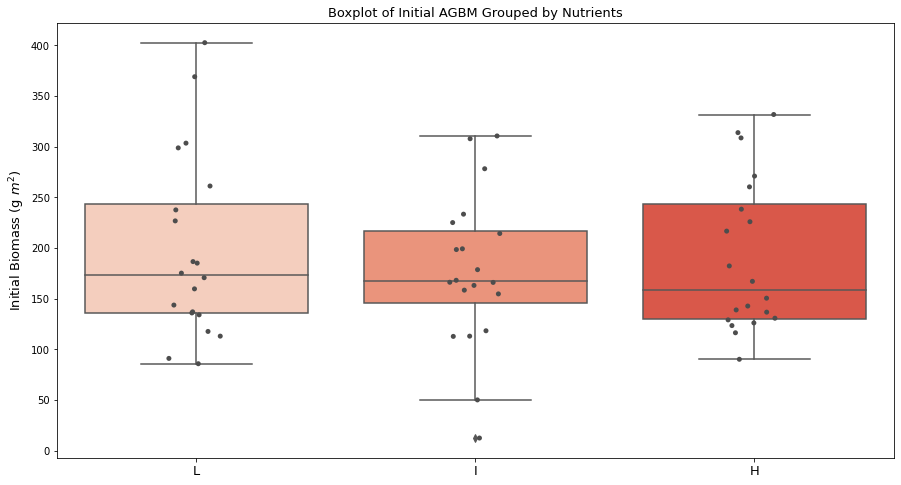

In [30]:
#I repeat this for each nutrient treatment.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="nutrients", y="Spring", data=df, order=["L","I","H"])  #,"90","120"
sns.stripplot(x="nutrients", y="Spring", data=df, order=["L","I","H"], jitter=0.1, color="0.3")  #,"90","120"
plt.title("Boxplot of Initial AGBM Grouped by Nutrients", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2],["L","I","H"], fontsize=13)  #,"90","120"
plt.ylabel("Initial Biomass (g $m^{2}$)", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "Initial_agbm_nutrients_boxplot.png")
plt.show()

#### Normality Assumption Check

In [31]:
formula = 'Spring ~ C(sediments) *C(nutrients)'
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Spring   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                 -0.114
Method:                 Least Squares   F-statistic:                    0.5692
Date:                Tue, 13 Oct 2020   Prob (F-statistic):              0.874
Time:                        15:27:01   Log-Likelihood:                -342.34
No. Observations:                  60   AIC:                             714.7
Df Residuals:                      45   BIC:                             746.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              218.0188     41.992      5.192      0.000     133.443     302.594
C(sediments)[T.13]                     -29.8893     59.385     -0.503      0.617    -149.497      89.719
C(sediments)[T.35]                     -68.8624     59.385     -1.160      0.252    -188.470      50.745
C(sediments)[T.50]                     -31.0607     59.385     -0.523      0.604    -150.669      88.547
C(sediments)[T.75]                     -10.0386     59.385     -0.169      0.867    -129.647     109.569
C(nutrients)[T.I]                        0.2800     59.385      0.005      0.996    -119.328     119.888
C(nutrients)[T.L]                       36.8493     59.385      0.621      0.538     -82.759     156.457
C(sediments)[T.13]:C(nutrients)[T.I]   -16.6460     83.983     -0.198      0.844    -185.797     152.505
C(sediments)[T.35]:C(nutrients)[T.I]    31.3151     83.983      0.373      0.711    -137.836     200.466
C(sediments)[T.50]:C(nutrients)[T.I]   -36.8364     83.983     -0.439      0.663    -205.987     132.315
C(sediments)[T.75]:C(nutrients)[T.I]   -47.0815     83.983     -0.561      0.578    -216.233     122.070
C(sediments)[T.13]:C(nutrients)[T.L]     2.8478     83.983      0.034      0.973    -166.303     171.999
C(sediments)[T.35]:C(nutrients)[T.L]   -37.0817     83.983     -0.442      0.661    -206.233     132.069
C(sediments)[T.50]:C(nutrients)[T.L]   -49.6466     83.983     -0.591      0.557    -218.798     119.504
C(sediments)[T.75]:C(nutrients)[T.L]   -66.7859     83.983     -0.795      0.431    -235.937     102.365
==============================================================================
Omnibus:                        0.519   Durbin-Watson:                   1.724
Prob(Omnibus):                  0.771   Jarque-Bera (JB):                0.578
Skew:                           0.208   Prob(JB):                        0.749
Kurtosis:                       2.757   Cond. No.                         21.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
w, pvalue = stats.shapiro(model.resid)
print("Shapiro: w", w, "pvalue", pvalue)
#p-value is >0.05 for all groups, follow the Gaussian Distribution

Shapiro: w 0.988327145576477 pvalue 0.8365917801856995


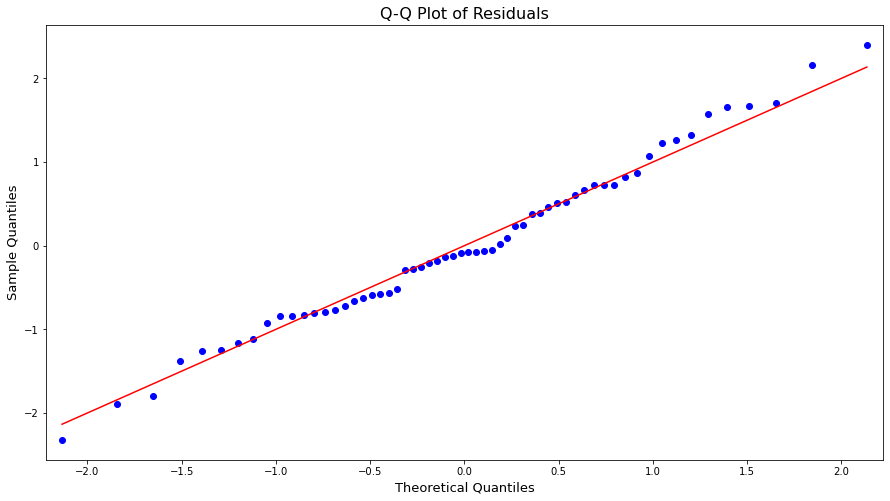

In [33]:
#QQ Plot Test - check the Normal distribution of residuals to ensure that the first asumption of ANOVA is satisfied. 
#As the plot is fairly linear along the diagonal, the assumption is considered satisfied.
res = model.resid
fig = qqplot(res, line='s', fit=True)
ax = plt.gca()
fig.set_size_inches(15,8)
ax.set_xlabel("Theoretical Quantiles", fontsize=13)
ax.set_ylabel("Sample Quantiles", fontsize=13)
ax.set_title("Q-Q Plot of Residuals", fontsize=16)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "InitialAGBMfinal_residuals.png")
plt.show()

#### Homogeneity Check

In [34]:
#A levene tests is then used to test the homoscedasticity of the groups. 
#P-value more than 0.05 means groups are homoscedastic and assumption was satisfied
levene_test = levene(zero_df.Spring, thirty_df.Spring, sixty_df.Spring, ninety_df.Spring, onetwenty_df.Spring)
levene_test

LeveneResult(statistic=0.7226519445259704, pvalue=0.5801946264498461)

#### Summary of ANOVA results - Initial aboveground biomass estimates from the spring 

In [35]:
#Two-way ANOVA was then completed using the statsmodels library. 
#The threshold was then adjusted using a Bonferroni correction (P-value/number of tests). 
#P-value was below this threshold, meaning the null hypothesis should be rejected.
table = anova_lm(model) #, typ=2
table

,df,sum_sq,mean_sq,F,PR(>F)
C(sediments),4.0,36034.871123,9008.717781,1.277253,0.293026
C(nutrients),2.0,4271.738649,2135.869325,0.302823,0.740223
C(sediments):C(nutrients),8.0,15900.278148,1987.534768,0.281792,0.968643
Residual,45.0,317393.874984,7053.197222,NaN,NaN


### 2. Aboveground biomass proportional change from the start to the end of the experiment

These biomass estimates were also collected using allometric growth curve data. The "change ratio" is also known as the "proportional change". Most of these mesocosms were negative due to the reduced vegetation that was left at the end of the experiment.

We used a square root transformation (x + 1) and outliers : '0S10','0S11','3S10','6S11','9S10','12S10'.These mescosms either had no vegetation at the end of the experiment or the mesocosm had abnormally high aboveground biomass remaining. At the end of the experiment, the intermediate sediment treatments had higher amounts of aboveground biomass remaining. 

The results indicate that all the mesocosms lost biomass, however, the aboveground biomass at the intermediate sediment loads had the least drastic changes overall. Nutrient loading did not impact these changes. 

#### Two-way ANOVA

In [36]:
df_narrow = df[~df['plots'].isin(['0S10', '0S11', '3S10', '6S11', '9S10', '12S10'])]

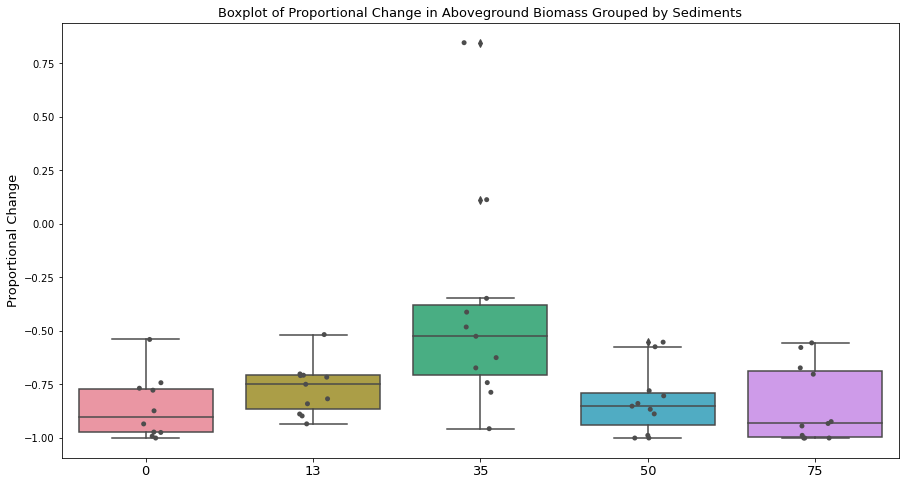

In [37]:
#I visualise the data using the seaborn library to create a boxplot of the subsidence for each sediment treatment.
#The middle line is the median.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="sediments", y="PropF", data=df_narrow, order=["0","13","35","50","75"]) 
sns.stripplot(x="sediments", y="PropF", data=df_narrow, order=["0","13","35","50","75"], jitter=0.1, color="0.3")  #
plt.title("Boxplot of Proportional Change in Aboveground Biomass Grouped by Sediments", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2,3,4],["0","13","35","50","75"], fontsize=13)  #
plt.ylabel("Proportional Change", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "PropF_boxplot.png")
plt.show()

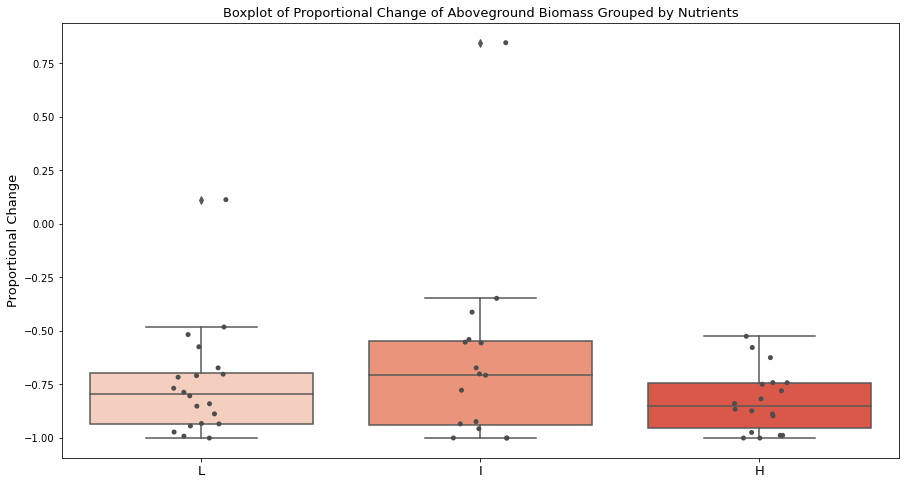

In [38]:
#I repeat this for each nutrient treatment.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="nutrients", y="PropF", data=df_narrow, order=["L","I","H"])  #,"90","120"
sns.stripplot(x="nutrients", y="PropF", data=df_narrow, order=["L","I","H"], jitter=0.1, color="0.3")  #,"90","120"
plt.title("Boxplot of Proportional Change of Aboveground Biomass Grouped by Nutrients", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2],["L","I","H"], fontsize=13)  #,"90","120"
plt.ylabel("Proportional Change", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "PJPropF_nutrients_boxplot.png")
plt.show()

#### Normality Assumption Check

In [39]:
df_narrow = df[~df['plots'].isin(['0S10', '0S11', '3S10', '6S11', '9S10', '12S10'])]
#df_narrow2 = df[~df['plots'].isin(['0S2', '12S1', '12S11', '12S3', '9S8'])]
df_narrow['Prop'] = np.sqrt(df_narrow['PropFplus1']) 

In [40]:
zero_df = df_narrow.query('sediments == "0"')
thirty_df = df_narrow.query('sediments == "13"')
sixty_df = df_narrow.query('sediments == "35"')
ninety_df = df_narrow.query('sediments == "50"')
onetwenty_df = df_narrow.query('sediments == "75"')

In [41]:
formula = 'Prop ~ C(sediments) *C(nutrients)'
model = ols(formula, df_narrow).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Prop   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     1.944
Date:                Tue, 13 Oct 2020   Prob (F-statistic):             0.0513
Time:                        15:27:04   Log-Likelihood:                 8.2290
No. Observations:                  54   AIC:                             13.54
Df Residuals:                      39   BIC:                             43.38
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                0.3421      0.141      2.424      0.020       0.057       0.628
C(sediments)[T.13]                       0.0542      0.187      0.290      0.773      -0.323       0.432
C(sediments)[T.35]                       0.2615      0.200      1.310      0.198      -0.142       0.665
C(sediments)[T.50]                      -0.0047      0.187     -0.025      0.980      -0.382       0.373
C(sediments)[T.75]                      -0.1516      0.187     -0.812      0.422      -0.529       0.226
C(nutrients)[T.I]                        0.0416      0.200      0.208      0.836      -0.362       0.445
C(nutrients)[T.L]                       -0.0920      0.187     -0.493      0.625      -0.470       0.286
C(sediments)[T.13]:C(nutrients)[T.I]     0.0107      0.273      0.039      0.969      -0.542       0.564
C(sediments)[T.35]:C(nutrients)[T.I]     0.1403      0.273      0.513      0.611      -0.413       0.693
C(sediments)[T.50]:C(nutrients)[T.I]    -0.1507      0.273     -0.551      0.585      -0.704       0.402
C(sediments)[T.75]:C(nutrients)[T.I]     0.2732      0.273      0.999      0.324      -0.280       0.826
C(sediments)[T.13]:C(nutrients)[T.L]     0.2377      0.254      0.934      0.356      -0.277       0.752
C(sediments)[T.35]:C(nutrients)[T.L]     0.1908      0.264      0.723      0.474      -0.343       0.725
C(sediments)[T.50]:C(nutrients)[T.L]     0.2092      0.254      0.822      0.416      -0.306       0.724
C(sediments)[T.75]:C(nutrients)[T.L]     0.1625      0.254      0.639      0.527      -0.352       0.677
==============================================================================
Omnibus:                        3.094   Durbin-Watson:                   1.329
Prob(Omnibus):                  0.213   Jarque-Bera (JB):                2.239
Skew:                           0.286   Prob(JB):                        0.326
Kurtosis:                       3.817   Cond. No.                         23.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
w, pvalue = stats.shapiro(model.resid)
print("Shapiro: w", w, "pvalue", pvalue)
#p-value is >0.05 for all groups, does not follow the Gaussian Distribution ut it would have been a lot worse if I did not remove some.

Shapiro: w 0.9750038385391235 pvalue 0.31675323843955994


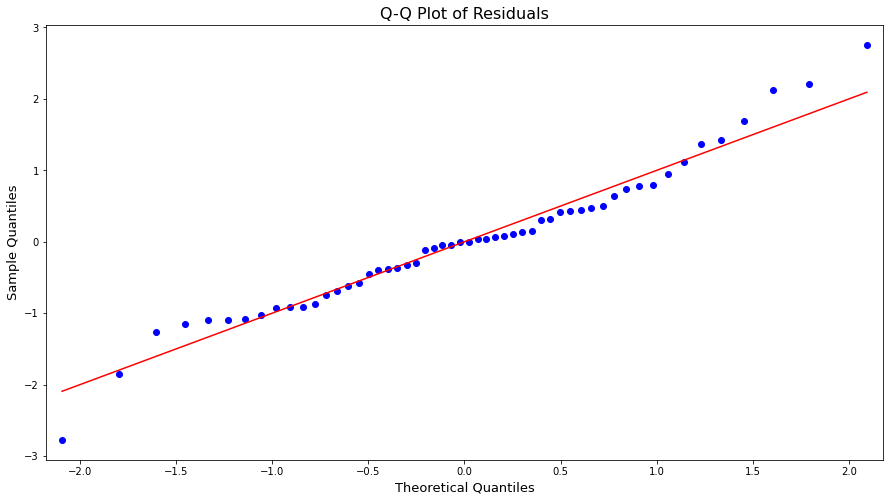

In [43]:
#QQ Plot Test - check the Normal distribution of residuals to ensure that the first asumption of ANOVA is satisfied. 
#As the plot is fairly linear along the diagonal, the assumption is considered satisfied.
res = model.resid
fig = qqplot(res, line='s', fit=True)
ax = plt.gca()
fig.set_size_inches(15,8)
ax.set_xlabel("Theoretical Quantiles", fontsize=13)
ax.set_ylabel("Sample Quantiles", fontsize=13)
ax.set_title("Q-Q Plot of Residuals", fontsize=16)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "Prop_residuals.png")
plt.show()

#### Homogeneity Check

In [44]:
#A levene tests is then used to test the homoscedasticity of the groups. 
#P-value more than 0.05 means groups are homoscedastic and assumption was satisfied
levene_test = levene(zero_df.Prop, thirty_df.Prop, sixty_df.Prop, ninety_df.Prop, onetwenty_df.Prop)
levene_test

LeveneResult(statistic=1.1160147082854444, pvalue=0.35972333042984717)

#### Summary of the ANOVA results for the 'proportional change" of aboveground biomass 

These biomass results were based on the allometric growth curves and the lengths of shoots obtained from the plants growing in the mesocosms at the beginning of the spring season and end of the fall season.

In [45]:
#Two-way ANOVA was then completed using the statsmodels library. 
#The threshold was then adjusted using a Bonferroni correction (P-value/number of tests). 
#P-value was below this threshold, meaning the null hypothesis should be rejected.
table = anova_lm(model) #, typ=2
table

,df,sum_sq,mean_sq,F,PR(>F)
C(sediments),4.0,1.224460,0.306115,5.121445,0.002051
C(nutrients),2.0,0.092320,0.046160,0.772276,0.468896
C(sediments):C(nutrients),8.0,0.310152,0.038769,0.648623,0.732185
Residual,39.0,2.331078,0.059771,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0     13   0.1458 0.6078 -0.1465  0.4381  False
     0     35   0.3879  0.004  0.0956  0.6802   True
     0     50   0.0325    0.9 -0.2598  0.3248  False
     0     75  -0.0158    0.9  -0.308  0.2765  False
    13     35   0.2421 0.1312 -0.0431  0.5273  False
    13     50  -0.1133 0.7676 -0.3985  0.1719  False
    13     75  -0.1616 0.5015 -0.4468  0.1237  False
    35     50  -0.3554 0.0078 -0.6406 -0.0702   True
    35     75  -0.4037 0.0019 -0.6889 -0.1184   True
    50     75  -0.0483    0.9 -0.3335   0.237  False
----------------------------------------------------


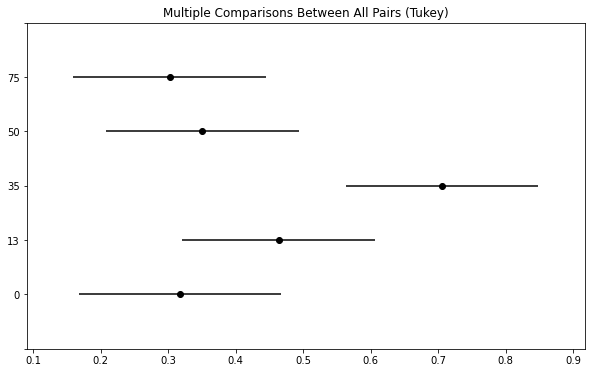

In [46]:
#To determine which groups had a significant difference from one another, a Tukey's HSD test was performed.
#The null hypothesis should be rejected for all the 'False' pairs.
mc = pairwise_tukeyhsd(df_narrow['Prop'],df_narrow['sediments'])
result = mc._results_table
print(result)
_ = mc.plot_simultaneous()

### 3. Stem density changes

The stem density is measured as the proportion of stems present in the mesocosms in late fall ($m^{2}$) compared to what was there in the spring ($m^{2}$). We used sqrt transformation and  one outlier was removed, 6S11.

#### Two-way ANOVA

In [47]:
#Reading the data
stem_density = pd.read_excel (r'C:\Users\molli\Dropbox\Publish\Working Graphs for Publication_2020_revised.xlsx', sheet_name='Stem_density', index_col=0) 
df = pd.DataFrame(stem_density, columns= ['plots','stem_density_remaining','sediments','nutrients'])
df = df[~df['plots'].isin(['6S11'])]

In [48]:
df['stems'] = np.sqrt(df['stem_density_remaining']) #
#df['stems'] = df['stem_density_remaining']
df['sediments'] = df['sediments'].astype('str')
#df.replace([np.inf, -np.inf], np.nan, inplace=True)
#df['stand'] = df['stand'].fillna(0)

In [49]:
zero_df = df.query('sediments == "0"')
thirty_df = df.query('sediments == "13"')
sixty_df = df.query('sediments == "35"')
ninety_df = df.query('sediments == "50"')
onetwenty_df = df.query('sediments == "75"')

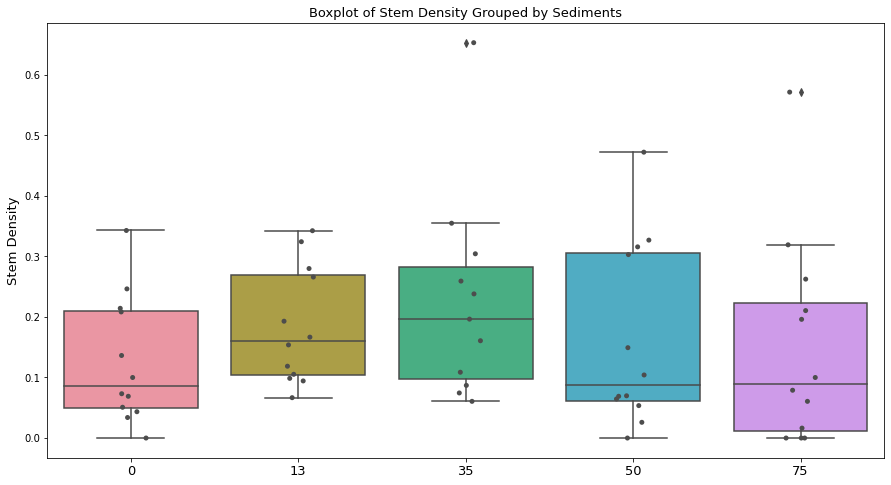

In [50]:
#I visualise the data using the seaborn library to create a boxplot of the subsidence for each sediment treatment.
#The middle line is the median.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="sediments", y="stem_density_remaining", data=df, order=["0","13","35","50","75"]) 
sns.stripplot(x="sediments", y="stem_density_remaining", data=df, order=["0","13","35","50","75"], jitter=0.1, color="0.3")  #
plt.title("Boxplot of Stem Density Grouped by Sediments", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2,3,4],["0","13","35","50","75"], fontsize=13)  #
plt.ylabel("Proportion Stems Remaining", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "Stem_density_boxplot.png")
plt.show()

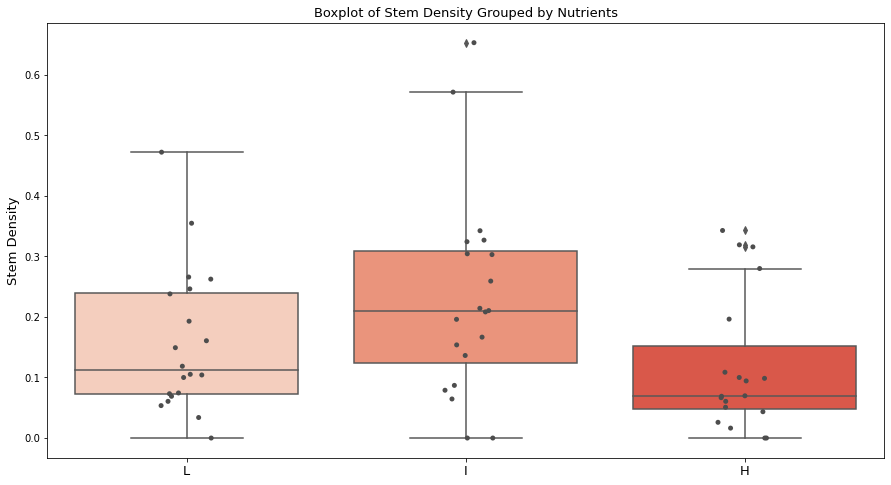

In [51]:
#I repeat this for each nutrient treatment.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="nutrients", y="stem_density_remaining", data=df, order=["L","I","H"])  #,"90","120"
sns.stripplot(x="nutrients", y="stem_density_remaining", data=df, order=["L","I","H"], jitter=0.1, color="0.3")  #,"90","120"
plt.title("Boxplot of Stem Density Grouped by Nutrients", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2],["L","I","H"], fontsize=13)  #,"90","120"
plt.ylabel("Proportion Stems Remaining", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "Stem_density_nutrients_boxplot.png")
plt.show()

#### Normality Assumption Check

In [52]:
formula = 'stems ~ C(sediments) *C(nutrients)'
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  stems   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.061
Date:                Tue, 13 Oct 2020   Prob (F-statistic):              0.416
Time:                        15:27:08   Log-Likelihood:                 24.773
No. Observations:                  59   AIC:                            -19.55
Df Residuals:                      44   BIC:                             11.62
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                0.3339      0.092      3.627      0.001       0.148       0.519
C(sediments)[T.13]                       0.0182      0.130      0.140      0.890      -0.244       0.281
C(sediments)[T.35]                       0.0057      0.141      0.041      0.968      -0.278       0.289
C(sediments)[T.50]                      -0.0215      0.130     -0.165      0.870      -0.284       0.241
C(sediments)[T.75]                      -0.1607      0.130     -1.234      0.224      -0.423       0.102
C(nutrients)[T.I]                       -0.0118      0.130     -0.091      0.928      -0.274       0.251
C(nutrients)[T.L]                       -0.0305      0.130     -0.235      0.816      -0.293       0.232
C(sediments)[T.13]:C(nutrients)[T.I]     0.1485      0.184      0.806      0.424      -0.223       0.520
C(sediments)[T.35]:C(nutrients)[T.I]     0.2131      0.192      1.112      0.272      -0.173       0.599
C(sediments)[T.50]:C(nutrients)[T.I]     0.0434      0.184      0.236      0.815      -0.328       0.414
C(sediments)[T.75]:C(nutrients)[T.I]     0.3232      0.184      1.755      0.086      -0.048       0.694
C(sediments)[T.13]:C(nutrients)[T.L]     0.0844      0.184      0.458      0.649      -0.287       0.455
C(sediments)[T.35]:C(nutrients)[T.L]     0.1302      0.192      0.679      0.500      -0.256       0.516
C(sediments)[T.50]:C(nutrients)[T.L]     0.1250      0.184      0.679      0.501      -0.246       0.496
C(sediments)[T.75]:C(nutrients)[T.L]     0.1260      0.184      0.684      0.497      -0.245       0.497
==============================================================================
Omnibus:                        0.866   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.648   Jarque-Bera (JB):                0.937
Skew:                           0.261   Prob(JB):                        0.626
Kurtosis:                       2.671   Cond. No.                         21.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
w, pvalue = stats.shapiro(model.resid)
print("Shapiro: w", w, "pvalue", pvalue)
#p-value is >0.05 for all groups, does not follow the Gaussian Distribution ut it would have been a lot worse if I did not remove some.

Shapiro: w 0.973275363445282 pvalue 0.21913330256938934


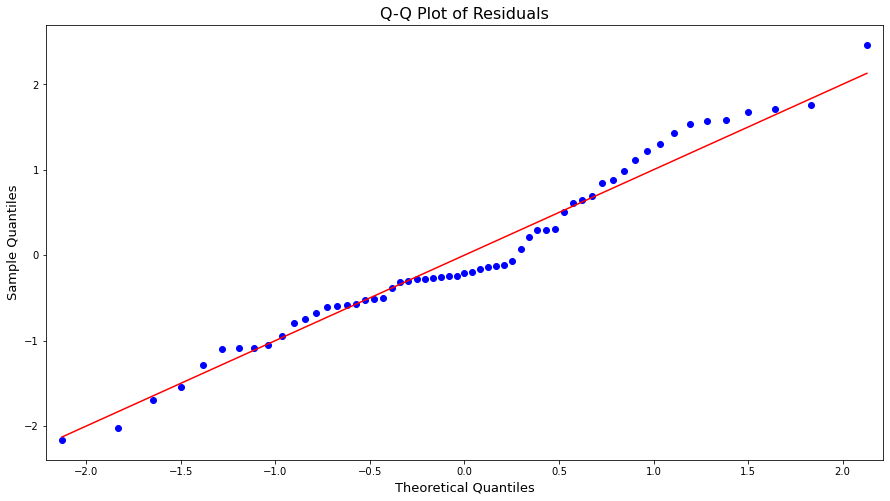

In [54]:
#QQ Plot Test - check the Normal distribution of residuals to ensure that the first asumption of ANOVA is satisfied. 
#As the plot is fairly linear along the diagonal, the assumption is considered satisfied.
res = model.resid
fig = qqplot(res, line='s', fit=True)
ax = plt.gca()
fig.set_size_inches(15,8)
ax.set_xlabel("Theoretical Quantiles", fontsize=13)
ax.set_ylabel("Sample Quantiles", fontsize=13)
ax.set_title("Q-Q Plot of Residuals", fontsize=16)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "stem_density_residuals.png")
plt.show()

#### Homogeneity Check

In [55]:
#A levene tests is then used to test the homoscedasticity of the groups. 
#P-value more than 0.05 means groups are homoscedastic and assumption was satisfied
levene_test = levene(zero_df.stems, thirty_df.stems, sixty_df.stems, ninety_df.stems, onetwenty_df.stems)
levene_test

LeveneResult(statistic=1.6862848020245937, pvalue=0.16659869288068524)

#### Summary of the ANOVA results for the stem density

In [56]:
#Two-way ANOVA was then completed using the statsmodels library. 
#The threshold was then adjusted using a Bonferroni correction (P-value/number of tests). 
#P-value was below this threshold, meaning the null hypothesis should be rejected.
table = anova_lm(model) #, typ=2
table

,df,sum_sq,mean_sq,F,PR(>F)
C(sediments),4.0,0.171619,0.042905,1.265566,0.297890
C(nutrients),2.0,0.169752,0.084876,2.503583,0.093379
C(sediments):C(nutrients),8.0,0.162223,0.020278,0.598136,0.774124
Residual,44.0,1.491676,0.033902,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0     13   0.0958 0.6829 -0.1159 0.3075  False
     0     35   0.1293 0.4528 -0.0872 0.3458  False
     0     50   0.0347    0.9 -0.1771 0.2464  False
     0     75   -0.011    0.9 -0.2227 0.2008  False
    13     35   0.0335    0.9  -0.183   0.25  False
    13     50  -0.0611    0.9 -0.2729 0.1506  False
    13     75  -0.1068 0.6015 -0.3185  0.105  False
    35     50  -0.0946  0.707 -0.3111 0.1218  False
    35     75  -0.1403  0.369 -0.3568 0.0762  False
    50     75  -0.0456    0.9 -0.2574 0.1661  False
---------------------------------------------------


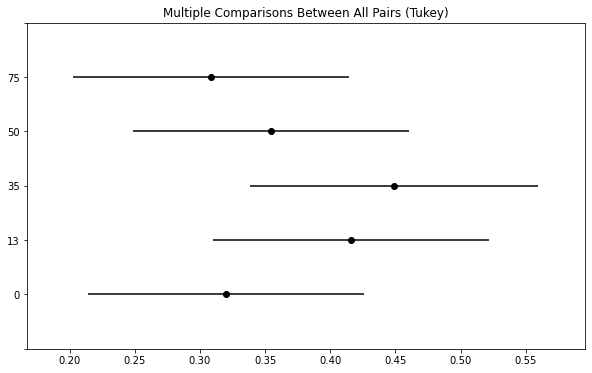

In [57]:
#To determine which groups had a significant difference from one another, a Tukey's HSD test was performed.
#The null hypothesis should be rejected for all the 'False' pairs.
mc = pairwise_tukeyhsd(df['stems'],df['sediments'])
result = mc._results_table
print(result)
_ = mc.plot_simultaneous()

### 4. Aboveground biomass standing harvest

Standing harvest represents the final harvested (live and dead stems) clipped from the mesocosms and weighed at the end of the experiment. We used a square root transformation for the ANOVA, however, the boxplots and other figures represent the raw data without transformation.

The harvested standing biomass follows a similiar pattern to the "proportional change" data in which biomass tend to accumulate more in the intermediate sediment treated mesocosms.

#### Two-way ANOVA

In [58]:
#Reading the data
agharvest_df = pd.read_excel (r'C:\Users\molli\Dropbox\Publish\Working Graphs for Publication_2020_revised.xlsx', sheet_name='AGHarvest', index_col=0) 
df = pd.DataFrame(agharvest_df, columns= ['plots','Total_m2','sediments','nutrients'])

In [59]:
df['stand'] = np.sqrt(df['Total_m2']) 
df['sediments'] = df['sediments'].astype('str')
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df['stand'] = df['stand'].fillna(0)

In [60]:
zero_df = df.query('sediments == "0"')
thirty_df = df.query('sediments == "13"')
sixty_df = df.query('sediments == "35"')
ninety_df = df.query('sediments == "50"')
onetwenty_df = df.query('sediments == "75"')

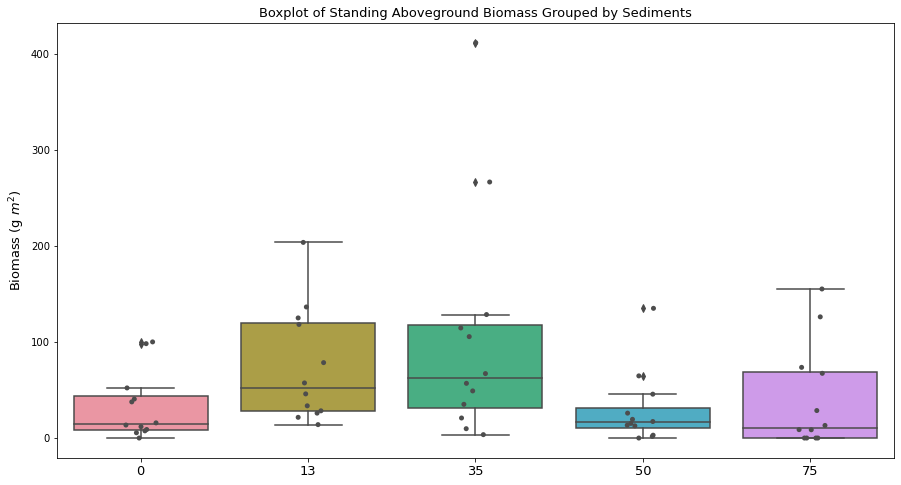

In [61]:
#I visualise the data using the seaborn library to create a boxplot of the subsidence for each sediment treatment.
#The middle line is the median.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="sediments", y="Total_m2", data=df, order=["0","13","35","50","75"]) 
sns.stripplot(x="sediments", y="Total_m2", data=df, order=["0","13","35","50","75"], jitter=0.1, color="0.3")  #
plt.title("Boxplot of Standing Aboveground Biomass Grouped by Sediments", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2,3,4],["0","13","35","50","75"], fontsize=13)  #
plt.ylabel("Biomass (g $m^{2}$)", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "Standing_boxplot.png")
plt.show()

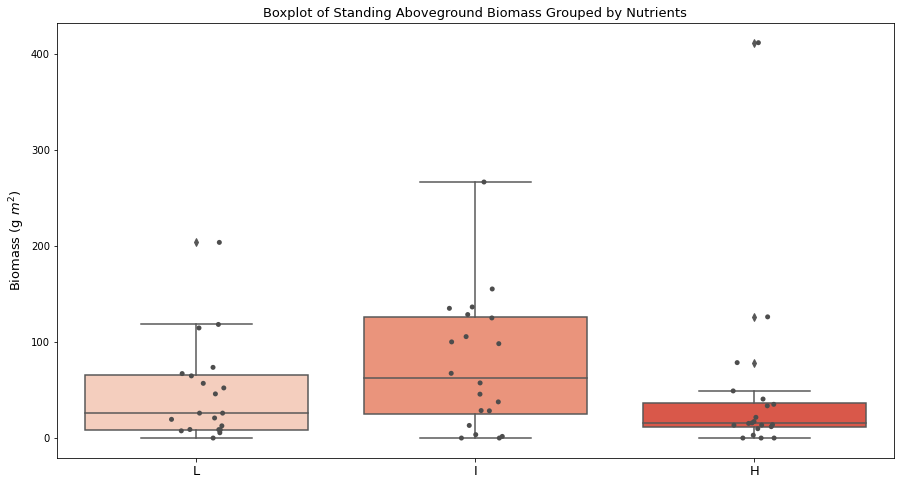

In [62]:
#I repeat this for each nutrient treatment.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="nutrients", y="Total_m2", data=df, order=["L","I","H"])  #,"90","120"
sns.stripplot(x="nutrients", y="Total_m2", data=df, order=["L","I","H"], jitter=0.1, color="0.3")  #,"90","120"
plt.title("Boxplot of Standing Aboveground Biomass Grouped by Nutrients", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2],["L","I","H"], fontsize=13)  #,"90","120"
plt.ylabel("Biomass (g $m^{2}$)", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "Standing_biomass_nutrients_boxplot.png")
plt.show()

#### Normality Assumption Check

In [63]:
formula = 'stand ~ C(sediments) *C(nutrients)'
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  stand   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     1.370
Date:                Tue, 13 Oct 2020   Prob (F-statistic):              0.207
Time:                        15:27:11   Log-Likelihood:                -161.36
No. Observations:                  60   AIC:                             352.7
Df Residuals:                      45   BIC:                             384.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                4.3643      2.057      2.122      0.039       0.222       8.507
C(sediments)[T.13]                       1.3915      2.909      0.478      0.635      -4.467       7.250
C(sediments)[T.35]                       4.7157      2.909      1.621      0.112      -1.143      10.574
C(sediments)[T.50]                      -1.0086      2.909     -0.347      0.730      -6.867       4.850
C(sediments)[T.75]                      -1.5575      2.909     -0.535      0.595      -7.416       4.301
C(nutrients)[T.I]                        2.1457      2.909      0.738      0.465      -3.713       8.004
C(nutrients)[T.L]                       -0.5460      2.909     -0.188      0.852      -6.405       5.313
C(sediments)[T.13]:C(nutrients)[T.I]     1.0348      4.114      0.252      0.803      -7.251       9.320
C(sediments)[T.35]:C(nutrients)[T.I]    -1.2756      4.114     -0.310      0.758      -9.561       7.010
C(sediments)[T.50]:C(nutrients)[T.I]    -0.5837      4.114     -0.142      0.888      -8.869       7.702
C(sediments)[T.75]:C(nutrients)[T.I]     2.4534      4.114      0.596      0.554      -5.832      10.739
C(sediments)[T.13]:C(nutrients)[T.L]     4.0410      4.114      0.982      0.331      -4.244      12.326
C(sediments)[T.35]:C(nutrients)[T.L]    -0.7847      4.114     -0.191      0.850      -9.070       7.501
C(sediments)[T.50]:C(nutrients)[T.L]     2.4652      4.114      0.599      0.552      -5.820      10.751
C(sediments)[T.75]:C(nutrients)[T.L]     1.3542      4.114      0.329      0.744      -6.931       9.640
==============================================================================
Omnibus:                        5.905   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                4.965
Skew:                           0.588   Prob(JB):                       0.0835
Kurtosis:                       3.776   Cond. No.                         21.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
w, pvalue = stats.shapiro(model.resid)
print("Shapiro: w", w, "pvalue", pvalue)
#p-value is >0.05 for all groups, does not follow the Gaussian Distribution ut it would have been a lot worse if I did not remove some.

Shapiro: w 0.9748355746269226 pvalue 0.24977067112922668


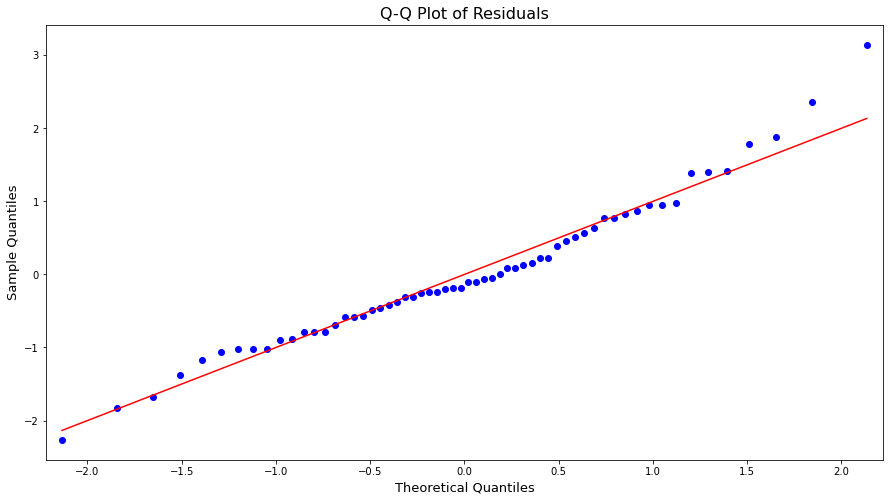

In [65]:
#QQ Plot Test - check the Normal distribution of residuals to ensure that the first asumption of ANOVA is satisfied. 
#As the plot is fairly linear along the diagonal, the assumption is considered satisfied.
res = model.resid
fig = qqplot(res, line='s', fit=True)
ax = plt.gca()
fig.set_size_inches(15,8)
ax.set_xlabel("Theoretical Quantiles", fontsize=13)
ax.set_ylabel("Sample Quantiles", fontsize=13)
ax.set_title("Q-Q Plot of Residuals", fontsize=16)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "litter_residuals.png")
plt.show()

#### Homogeneity Check

In [66]:
#A levene tests is then used to test the homoscedasticity of the groups. 
#P-value more than 0.05 means groups are homoscedastic and assumption was satisfied
levene_test = levene(zero_df.stand, thirty_df.stand, sixty_df.stand, ninety_df.stand, onetwenty_df.stand)
levene_test

LeveneResult(statistic=1.0547188401656031, pvalue=0.3876927612848818)

#### Summary of the ANOVA results for the harvested standing (live and dead) aboveground biomass

In [67]:
#Two-way ANOVA was then completed using the statsmodels library. 
#The threshold was then adjusted using a Bonferroni correction (P-value/number of tests). 
#P-value was below this threshold, meaning the null hypothesis should be rejected.
table = anova_lm(model) #, typ=2
table

,df,sum_sq,mean_sq,F,PR(>F)
C(sediments),4.0,212.000728,53.000182,3.131986,0.023488
C(nutrients),2.0,62.876704,31.438352,1.857814,0.167782
C(sediments):C(nutrients),8.0,49.625678,6.203210,0.366572,0.932710
Residual,45.0,761.500189,16.922226,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0     13   3.0834 0.3324 -1.5065 7.6733  False
     0     35    4.029 0.1114  -0.561 8.6189  False
     0     50  -0.3814    0.9 -4.9713 4.2085  False
     0     75  -0.2883    0.9 -4.8782 4.3017  False
    13     35   0.9455    0.9 -3.6444 5.5355  False
    13     50  -3.4648 0.2228 -8.0547 1.1251  False
    13     75  -3.3717 0.2469 -7.9616 1.2183  False
    35     50  -4.4104 0.0654 -9.0003 0.1796  False
    35     75  -4.3172 0.0748 -8.9071 0.2727  False
    50     75   0.0931    0.9 -4.4968 4.6831  False
---------------------------------------------------


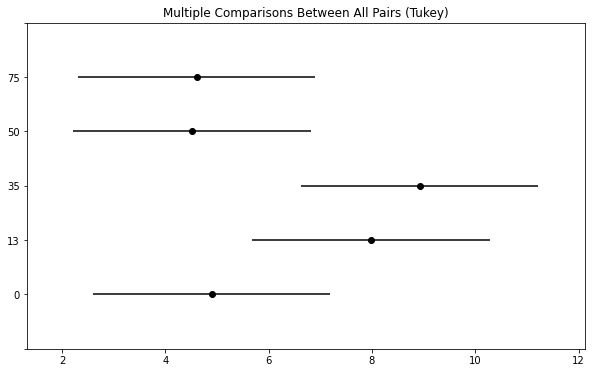

In [68]:
#To determine which groups had a significant difference from one another, a Tukey's HSD test was performed.
#The null hypothesis should be rejected for all the 'False' pairs.
mc = pairwise_tukeyhsd(df['stand'],df['sediments'])
result = mc._results_table
print(result)
_ = mc.plot_simultaneous()

### 5. Senesced aboveground biomass

The senesced material is the litter, or dead plant matter ($g$ $m^{2}$), found in the mesocosms and the end of and throughout the course of the experiment. There was no transformations of this data like there was with the standing biomass.

#### Two-way ANOVA

In [69]:
#Reading the data
df = pd.DataFrame(agharvest_df, columns= ['plots','litter_m2','standing','sediments','nutrients'])
df['litter'] = df['litter_m2'] 
df['sediments'] = df['sediments'].astype('str')

In [70]:
zero_df = df.query('sediments == "0"')
thirty_df = df.query('sediments == "13"')
sixty_df = df.query('sediments == "35"')
ninety_df = df.query('sediments == "50"')
onetwenty_df = df.query('sediments == "75"')

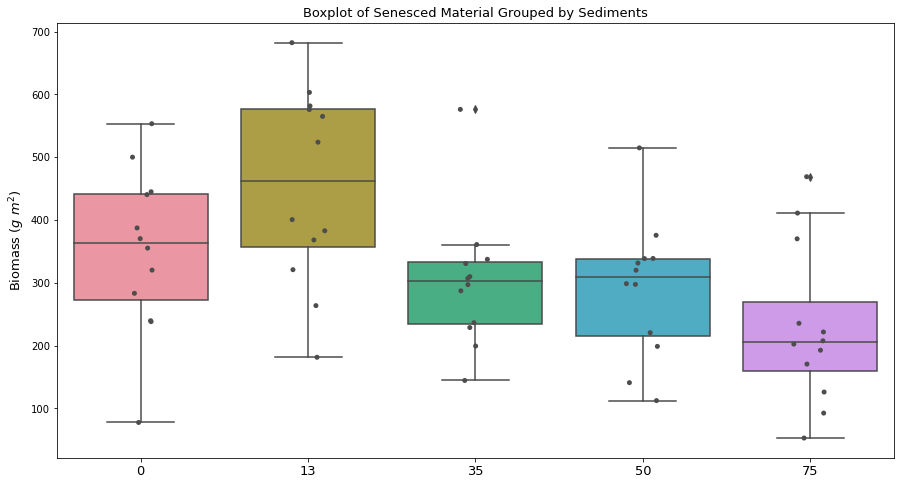

In [71]:
#I visualise the data using the seaborn library to create a boxplot of the subsidence for each sediment treatment.
#The middle line is the median.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="sediments", y="litter", data=df, order=["0","13","35","50","75"]) 
sns.stripplot(x="sediments", y="litter", data=df, order=["0","13","35","50","75"], jitter=0.1, color="0.3")  #
plt.title("Boxplot of Senesced Material Grouped by Sediments", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2,3,4],["0","13","35","50","75"], fontsize=13)  #
plt.ylabel("Biomass ($g$ $m^{2}$)", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "Senecsed_boxplot.png")
plt.show()

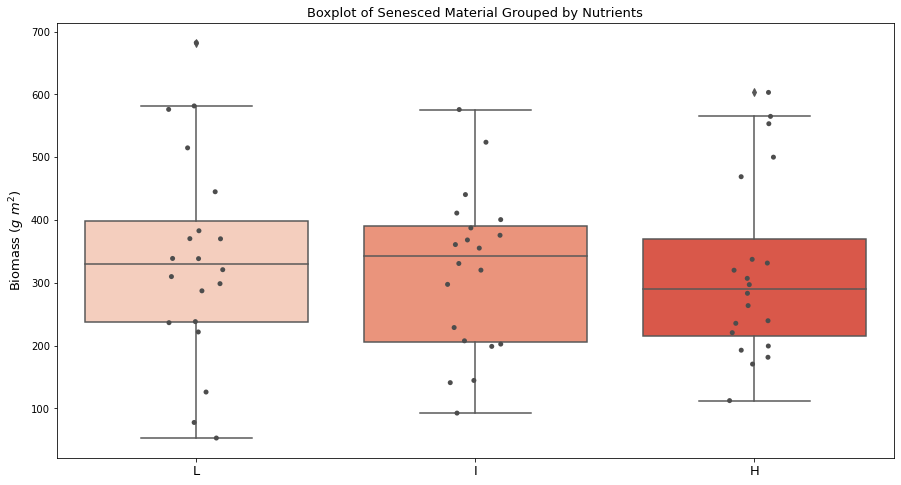

In [72]:
#I repeat this for each nutrient treatment.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="nutrients", y="litter", data=df, order=["L","I","H"])  #,"90","120"
sns.stripplot(x="nutrients", y="litter", data=df, order=["L","I","H"], jitter=0.1, color="0.3")  #,"90","120"
plt.title("Boxplot of Senesced Material Grouped by Nutrients", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2],["L","I","H"], fontsize=13)  #,"90","120"
plt.ylabel("Biomass ($g$ $m^{2}$)", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "Senecsed_nutrients_boxplot.png")
plt.show()

#### Normality Assumption Check

In [73]:
formula = 'litter ~ C(sediments) *C(nutrients)'
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 litter   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     1.874
Date:                Tue, 13 Oct 2020   Prob (F-statistic):             0.0564
Time:                        15:27:14   Log-Likelihood:                -369.13
No. Observations:                  60   AIC:                             768.3
Df Residuals:                      45   BIC:                             799.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              394.0141     65.622      6.004      0.000     261.844     526.184
C(sediments)[T.13]                       9.2606     92.804      0.100      0.921    -177.656     196.178
C(sediments)[T.35]                    -108.8380     92.804     -1.173      0.247    -295.755      78.079
C(sediments)[T.50]                    -147.9225     92.804     -1.594      0.118    -334.840      38.995
C(sediments)[T.75]                    -127.1127     92.804     -1.370      0.178    -314.030      59.804
C(nutrients)[T.I]                      -18.2394     92.804     -0.197      0.845    -205.156     168.678
C(nutrients)[T.L]                     -111.2676     92.804     -1.199      0.237    -298.185      75.649
C(sediments)[T.13]:C(nutrients)[T.I]    82.0423    131.245      0.625      0.535    -182.298     346.383
C(sediments)[T.35]:C(nutrients)[T.I]    -0.7394    131.245     -0.006      0.996    -265.080     263.601
C(sediments)[T.50]:C(nutrients)[T.I]    25.3521    131.245      0.193      0.848    -238.989     289.693
C(sediments)[T.75]:C(nutrients)[T.I]   -20.2817    131.245     -0.155      0.878    -284.622     244.059
C(sediments)[T.13]:C(nutrients)[T.L]   199.8592    131.245      1.523      0.135     -64.481     464.200
C(sediments)[T.35]:C(nutrients)[T.L]   178.4859    131.245      1.360      0.181     -85.855     442.827
C(sediments)[T.50]:C(nutrients)[T.L]   237.8169    131.245      1.812      0.077     -26.524     502.158
C(sediments)[T.75]:C(nutrients)[T.L]    37.0070    131.245      0.282      0.779    -227.334     301.348
==============================================================================
Omnibus:                        5.737   Durbin-Watson:                   2.135
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                2.636
Skew:                           0.216   Prob(JB):                        0.268
Kurtosis:                       2.068   Cond. No.                         21.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
w, pvalue = stats.shapiro(model.resid)
print("Shapiro: w", w, "pvalue", pvalue)
#p-value is >0.05 for all groups, does not follow the Gaussian Distribution ut it would have been a lot worse if I did not remove some.

Shapiro: w 0.9665494561195374 pvalue 0.09874507039785385


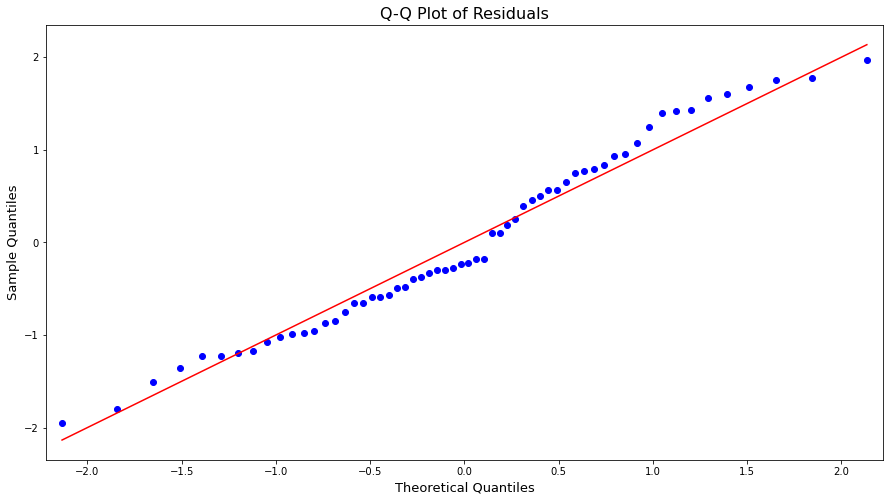

In [75]:
#QQ Plot Test - check the Normal distribution of residuals to ensure that the first asumption of ANOVA is satisfied. 
#As the plot is fairly linear along the diagonal, the assumption is considered satisfied.
res = model.resid
fig = qqplot(res, line='s', fit=True)
ax = plt.gca()
fig.set_size_inches(15,8)
ax.set_xlabel("Theoretical Quantiles", fontsize=13)
ax.set_ylabel("Sample Quantiles", fontsize=13)
ax.set_title("Q-Q Plot of Residuals", fontsize=16)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "litter_residuals.png")
plt.show()

#### Homogeneity Check

In [76]:
#A levene tests is then used to test the homoscedasticity of the groups. 
#P-value more than 0.05 means groups are homoscedastic and assumption was satisfied
levene_test = levene(zero_df.litter, thirty_df.litter, sixty_df.litter, ninety_df.litter, onetwenty_df.litter)
levene_test

LeveneResult(statistic=1.2256214844387143, pvalue=0.31060490425359866)

#### Summary of the ANOVA results of the senecsed material (i.e. litter)

In [77]:
#Two-way ANOVA was then completed using the statsmodels library. 
#The threshold was then adjusted using a Bonferroni correction (P-value/number of tests). 
#P-value was below this threshold, meaning the null hypothesis should be rejected.
table = anova_lm(model) #, typ=2
table

,df,sum_sq,mean_sq,F,PR(>F)
C(sediments),4.0,338742.704490,84685.676122,4.916382,0.002247
C(nutrients),2.0,5262.195993,2631.097996,0.152747,0.858790
C(sediments):C(nutrients),8.0,107825.577597,13478.197200,0.782470,0.620295
Residual,45.0,775134.040865,17225.200908,NaN,NaN


  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
     0     13  103.2277 0.2847  -43.0945 249.5499  False
     0     35  -49.5892 0.8616 -195.9114   96.733  False
     0     50  -60.1995 0.7478 -206.5217  86.1227  False
     0     75 -121.5376 0.1471 -267.8598  24.7846  False
    13     35 -152.8169 0.0365 -299.1391  -6.4947   True
    13     50 -163.4272 0.0213 -309.7494  -17.105   True
    13     75 -224.7653  0.001 -371.0875 -78.4431   True
    35     50  -10.6103    0.9 -156.9325 135.7119  False
    35     75  -71.9484 0.6217 -218.2706  74.3738  False
    50     75   -61.338 0.7356 -207.6602  84.9842  False
--------------------------------------------------------


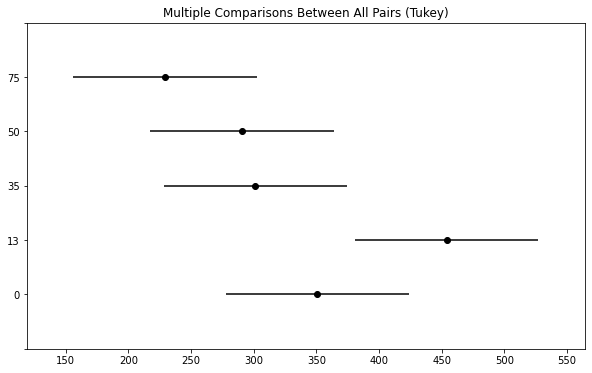

In [78]:
#To determine which groups had a significant difference from one another, a Tukey's HSD test was performed.
#The null hypothesis should be rejected for all the 'False' pairs.
mc = pairwise_tukeyhsd(df['litter'],df['sediments'])
result = mc._results_table
print(result)
_ = mc.plot_simultaneous()

### 6. Aboveground biomass harvest (standing + litter)

The harvest is the standing plant material (dead and alive) that was clipped and weighed at the end of the experiment combined with the litter materials that were removed and weighed throughout the course of the experiment. All of the mesocosms were growing vegetation to begin with, and they all had aproximately the same amount of healthy aboveground biomass. This assertion is backed up by results of the initial spring biomass estimates that had no significant differences between sediments and nutrient treatments.

The results of the harvested aboveground biomass material suggest that intermediate sediment treatments had higher total harvested biomass estimates. We transformed the data with a natural log transformation, however, the figures are a result of the raw data.

#### Two-way ANOVA

In [79]:
df = pd.DataFrame(agharvest_df, columns= ['plots', 'TP.8','sediments','nutrients'])
df['TPln'] = np.log(df['TP.8'])
df['sediments'] = df['sediments'].astype('str')

In [80]:
zero_df = df.query('sediments == "0"')
thirty_df = df.query('sediments == "13"')
sixty_df = df.query('sediments == "35"')
ninety_df = df.query('sediments == "50"')
onetwenty_df = df.query('sediments == "75"')

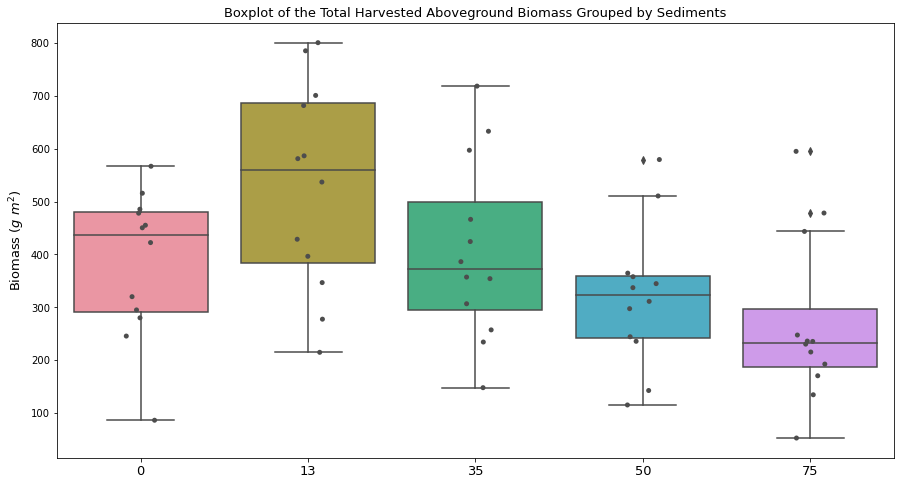

In [81]:
#I visualise the data using the seaborn library to create a boxplot of the subsidence for each sediment treatment.
#The middle line is the median.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="sediments", y="TP.8", data=df, order=["0","13","35","50","75"]) 
sns.stripplot(x="sediments", y="TP.8", data=df, order=["0","13","35","50","75"], jitter=0.1, color="0.3")  #
plt.title("Boxplot of the Total Harvested Aboveground Biomass Grouped by Sediments", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2,3,4],["0","13","35","50","75"], fontsize=13)  #
plt.ylabel("Biomass ($g$ $m^{2}$)", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "agtp_boxplot.png")
plt.show()

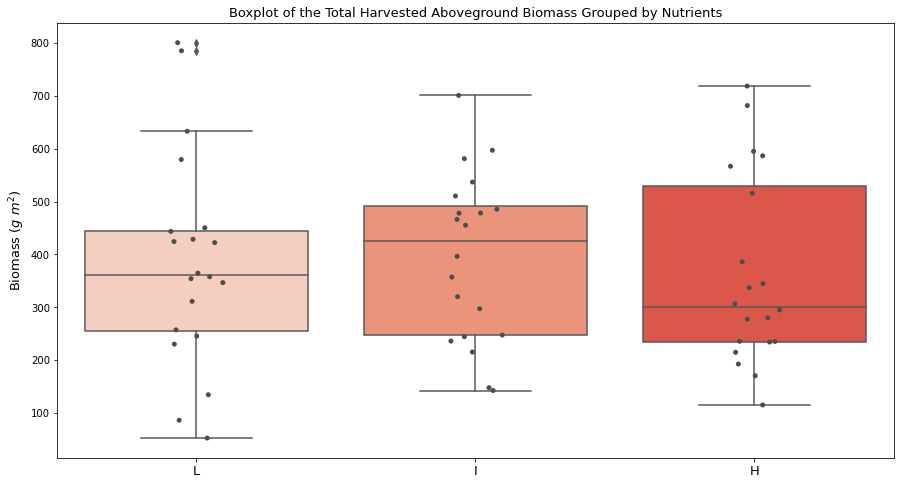

In [82]:
#I repeat this for each nutrient treatment.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="nutrients", y="TP.8", data=df, order=["L","I","H"])  #,"90","120"
sns.stripplot(x="nutrients", y="TP.8", data=df, order=["L","I","H"], jitter=0.1, color="0.3")  #,"90","120"
plt.title("Boxplot of the Total Harvested Aboveground Biomass Grouped by Nutrients", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2],["L","I","H"], fontsize=13)  #,"90","120"
plt.ylabel("Biomass ($g$ $m^{2}$)", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "TP_nutrients_boxplot.png")
plt.show()

#### Normality Assumption Check

In [83]:
formula = 'TPln ~ C(sediments) *C(nutrients)'
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   TPln   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     1.656
Date:                Tue, 13 Oct 2020   Prob (F-statistic):              0.101
Time:                        15:27:17   Log-Likelihood:                -36.271
No. Observations:                  60   AIC:                             102.5
Df Residuals:                      45   BIC:                             134.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                5.9770      0.256     23.375      0.000       5.462       6.492
C(sediments)[T.13]                      -0.0033      0.362     -0.009      0.993      -0.732       0.725
C(sediments)[T.35]                      -0.0479      0.362     -0.132      0.895      -0.776       0.680
C(sediments)[T.50]                      -0.5084      0.362     -1.406      0.167      -1.237       0.220
C(sediments)[T.75]                      -0.4145      0.362     -1.146      0.258      -1.143       0.314
C(nutrients)[T.I]                        0.0841      0.362      0.232      0.817      -0.644       0.812
C(nutrients)[T.L]                       -0.4471      0.362     -1.236      0.223      -1.175       0.281
C(sediments)[T.13]:C(nutrients)[T.I]     0.2386      0.511      0.466      0.643      -0.791       1.269
C(sediments)[T.35]:C(nutrients)[T.I]    -0.1601      0.511     -0.313      0.756      -1.190       0.870
C(sediments)[T.50]:C(nutrients)[T.I]     0.0448      0.511      0.088      0.931      -0.985       1.075
C(sediments)[T.75]:C(nutrients)[T.I]    -0.0167      0.511     -0.033      0.974      -1.047       1.013
C(sediments)[T.13]:C(nutrients)[T.L]     0.7884      0.511      1.542      0.130      -0.242       1.818
C(sediments)[T.35]:C(nutrients)[T.L]     0.4982      0.511      0.974      0.335      -0.532       1.528
C(sediments)[T.50]:C(nutrients)[T.L]     0.9489      0.511      1.855      0.070      -0.081       1.979
C(sediments)[T.75]:C(nutrients)[T.L]    -0.0145      0.511     -0.028      0.978      -1.044       1.016
==============================================================================
Omnibus:                        0.830   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.660   Jarque-Bera (JB):                0.662
Skew:                          -0.255   Prob(JB):                        0.718
Kurtosis:                       2.924   Cond. No.                         21.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
w, pvalue = stats.shapiro(model.resid)
print("Shapiro: w", w, "pvalue", pvalue)
#p-value is >0.05 for all groups, does not follow the Gaussian Distribution ut it would have been a lot worse if I did not remove some.

Shapiro: w 0.9863592386245728 pvalue 0.7404484152793884


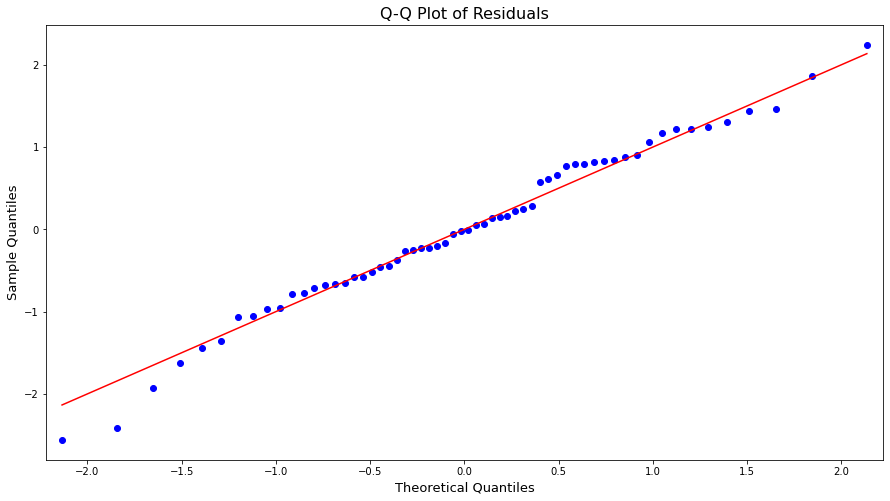

In [85]:
#QQ Plot Test - check the Normal distribution of residuals to ensure that the first asumption of ANOVA is satisfied. 
#As the plot is fairly linear along the diagonal, the assumption is considered satisfied.
res = model.resid
fig = qqplot(res, line='s', fit=True)
ax = plt.gca()
fig.set_size_inches(15,8)
ax.set_xlabel("Theoretical Quantiles", fontsize=13)
ax.set_ylabel("Sample Quantiles", fontsize=13)
ax.set_title("Q-Q Plot of Residuals", fontsize=16)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "TP_residuals.png")
plt.show()

#### Homogeneity Check

In [86]:
#A levene tests is then used to test the homoscedasticity of the groups. 
#P-value more than 0.05 means groups are homoscedastic and assumption was satisfied
levene_test = levene(zero_df.TPln, thirty_df.TPln, sixty_df.TPln, ninety_df.TPln, onetwenty_df.TPln)
levene_test

LeveneResult(statistic=0.1231983974031814, pvalue=0.973556181554195)

#### Summary of ANOVA results of the Total Harvested Aboveground Biomass

In [87]:
#Two-way ANOVA was then completed using the statsmodels library. 
#The threshold was then adjusted using a Bonferroni correction (P-value/number of tests). 
#P-value was below this threshold, meaning the null hypothesis should be rejected.
table = anova_lm(model) #, typ=2
table

,df,sum_sq,mean_sq,F,PR(>F)
C(sediments),4.0,3.878322,0.969580,3.707180,0.010835
C(nutrients),2.0,0.152192,0.076096,0.290953,0.748947
C(sediments):C(nutrients),8.0,2.033633,0.254204,0.971947,0.469823
Residual,45.0,11.769354,0.261541,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0     13    0.339 0.4745 -0.2409   0.919  False
     0     35   0.0648    0.9 -0.5151  0.6448  False
     0     50  -0.1772    0.9 -0.7572  0.4028  False
     0     75  -0.4249 0.2494 -1.0048  0.1551  False
    13     35  -0.2742 0.6514 -0.8542  0.3058  False
    13     50  -0.5162 0.1032 -1.0962  0.0638  False
    13     75  -0.7639 0.0042 -1.3439 -0.1839   True
    35     50   -0.242 0.7386  -0.822   0.338  False
    35     75  -0.4897 0.1357 -1.0697  0.0903  False
    50     75  -0.2477 0.7232 -0.8277  0.3323  False
----------------------------------------------------


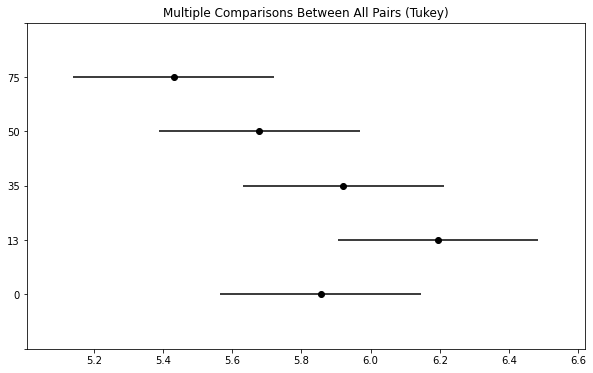

In [88]:
#To determine which groups had a significant difference from one another, a Tukey's HSD test was performed.
#The null hypothesis should be rejected for all the 'False' pairs.
mc = pairwise_tukeyhsd(df['TPln'],df['sediments'])
result = mc._results_table
print(result)
_ = mc.plot_simultaneous()

## Elevation Changes

The measurements from a Set Elevation Table (SET) demonstrates patterns of elevation change relative to a pre-treatment elevation baseline. The important patterns to consider are the "rates" of elevation change predicted for the year and the "net" elevation change for sediment and nutrient treated mesocosms. There was no transformations neccessary for the elevation-based ANOVA tests.

### 7. Initial elevation changes during the first five days of the experiment

The 'initial' elevation change is the product of the drastic elevation drop (mm) at the start of the experiment. This initial loss of elevation is most likely due to compaction of the original sod.

This 'initial' elevation measurement was calculated relative to pre-treatment baseline taken the week prior to the treatment. Mesocosm elevation was considered stable for approximately a month prior to treatment. This "initial" elevation is also relevant for showing that the "gradient" was achieved.

#### Two-way ANOVA

In [89]:
#Reading the data
set_df = pd.read_excel (r'C:\Users\molli\Dropbox\Publish\Working Graphs for Publication_2020_revised.xlsx', sheet_name='SET', index_col=0) 
df = pd.DataFrame(set_df, columns= ['plots','initialchange','sediments','nutrients'])
df['sediments'] = df['sediments'].apply(str)
df[["sediments", "initialchange"]].groupby("sediments").agg(['mean', 'sem'])

initialchange          
                   mean       sem
sediments                        
0             -7.076861  1.690143
13            13.168488  2.007452
35            35.308341  2.910684
50            50.292138  3.064294
75            75.224741  2.984165

In [90]:
zero_df = df.query('sediments == "0"')
thirty_df = df.query('sediments == "13"')
sixty_df = df.query('sediments == "35"')
ninety_df = df.query('sediments == "50"')
onetwenty_df = df.query('sediments == "75"')

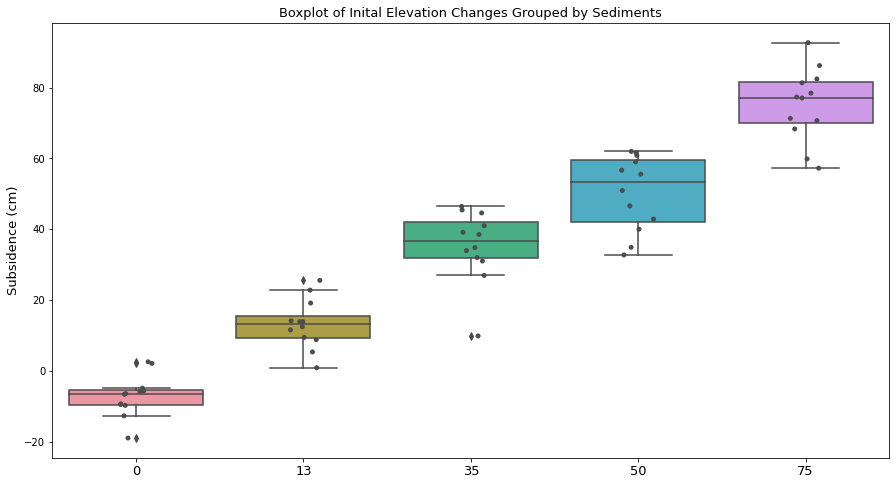

In [91]:
#I visualise the data using the seaborn library to create a boxplot of the subsidence for each sediment treatment.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="sediments", y="initialchange", data=df, order=["0","13","35","50","75"]) 
sns.stripplot(x="sediments", y="initialchange", data=df, order=["0","13","35","50","75"], jitter=0.1, color="0.3")  #
plt.title("Boxplot of Inital Elevation Changes Grouped by Sediments", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2,3,4],["0","13","35","50","75"], fontsize=13)  #
plt.ylabel("Subsidence (cm)", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "set_rate_sediments_boxplot.png")
plt.show()

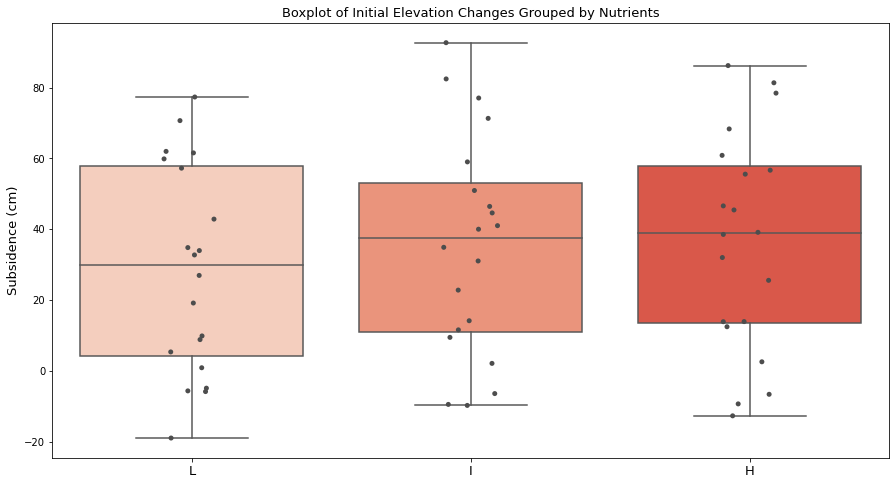

In [92]:
#I repeat this for each nutrient treatment.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="nutrients", y="initialchange", data=df, order=["L","I","H"])  #,"90","120"
sns.stripplot(x="nutrients", y="initialchange", data=df, order=["L","I","H"], jitter=0.1, color="0.3")  #,"90","120"
plt.title("Boxplot of Initial Elevation Changes Grouped by Nutrients", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2],["L","I","H"], fontsize=13)  #,"90","120"
plt.ylabel("Subsidence (cm)", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "set_rate_nutrients_boxplot.png")
plt.show()

#### Normality Assumption Check

In [93]:
formula = 'initialchange ~ C(sediments) *C(nutrients)'
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          initialchange   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     51.23
Date:                Tue, 13 Oct 2020   Prob (F-statistic):           6.71e-23
Time:                        15:27:21   Log-Likelihood:                -204.03
No. Observations:                  60   AIC:                             438.1
Df Residuals:                      45   BIC:                             469.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -6.5167      4.188     -1.556      0.127     -14.952       1.919
C(sediments)[T.13]                      22.9712      5.923      3.878      0.000      11.042      34.901
C(sediments)[T.35]                      45.2837      5.923      7.646      0.000      33.354      57.213
C(sediments)[T.50]                      61.4206      5.923     10.370      0.000      49.491      73.350
C(sediments)[T.75]                      85.0785      5.923     14.364      0.000      73.149      97.008
C(nutrients)[T.I]                        0.6386      5.923      0.108      0.915     -11.291      12.568
C(nutrients)[T.L]                       -2.3190      5.923     -0.392      0.697     -14.248       9.610
C(sediments)[T.13]:C(nutrients)[T.I]    -2.5952      8.376     -0.310      0.758     -19.466      14.275
C(sediments)[T.35]:C(nutrients)[T.I]     1.3578      8.376      0.162      0.872     -15.513      18.228
C(sediments)[T.50]:C(nutrients)[T.I]    -9.3409      8.376     -1.115      0.271     -26.212       7.530
C(sediments)[T.75]:C(nutrients)[T.I]     1.6495      8.376      0.197      0.845     -15.221      18.520
C(sediments)[T.13]:C(nutrients)[T.L]    -5.5823      8.376     -0.666      0.509     -22.453      11.288
C(sediments)[T.35]:C(nutrients)[T.L]   -10.0534      8.376     -1.200      0.236     -26.924       6.817
C(sediments)[T.50]:C(nutrients)[T.L]    -2.8139      8.376     -0.336      0.738     -19.685      14.057
C(sediments)[T.75]:C(nutrients)[T.L]    -9.9801      8.376     -1.191      0.240     -26.851       6.891
==============================================================================
Omnibus:                        1.433   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.488   Jarque-Bera (JB):                1.207
Skew:                          -0.156   Prob(JB):                        0.547
Kurtosis:                       2.379   Cond. No.                         21.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
w, pvalue = stats.shapiro(model.resid)
print("Shapiro: w", w, "pvalue", pvalue)
#p-value is >0.05 for all groups, hence, we can conclude that they follow the Gaussian Distribution

Shapiro: w 0.9783595204353333 pvalue 0.3631591796875


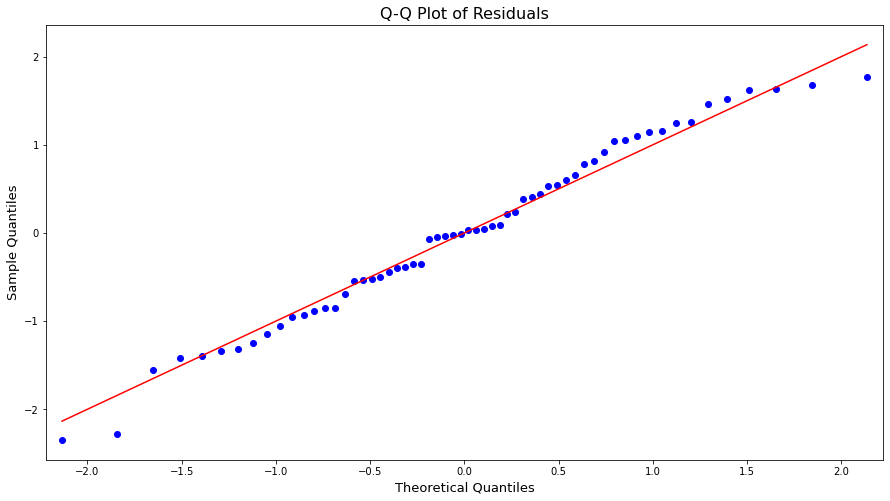

In [95]:
#QQ Plot Test - check the Normal distribution of residuals to ensure that the first asumption of ANOVA is satisfied. 
#As the plot is fairly linear along the diagonal, the assumption is considered satisfied.
res = model.resid
fig = qqplot(res, line='s', fit=True)
ax = plt.gca()
fig.set_size_inches(15,8)
ax.set_xlabel("Theoretical Quantiles", fontsize=13)
ax.set_ylabel("Sample Quantiles", fontsize=13)
ax.set_title("Q-Q Plot of Residuals", fontsize=16)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "set_initialchanges_residuals.png")
plt.show()

#### Homogeneity Check

In [96]:
#A levene tests is then used to test the homoscedasticity of the groups. An assumption of ANOVA is that the groups must be equal variance (homoscedatic)
#P-value more than 0.05 means groups are homoscedastic and assumption was satisfied
levene_test = levene(zero_df.initialchange, thirty_df.initialchange, sixty_df.initialchange, ninety_df.initialchange, onetwenty_df.initialchange)
levene_test

LeveneResult(statistic=1.501545496727345, pvalue=0.21442046291007574)

#### Summary of ANOVA results for the "Initial" SET measurements

In [97]:
#Two-way ANOVA was then completed using the statsmodels library. 
#The threshold was then adjusted using a Bonferroni correction (P-value/number of tests). 
#P-value was below this threshold, meaning the null hypothesis should be rejected.
table = anova_lm(model)  #, typ=2
table

,df,sum_sq,mean_sq,F,PR(>F)
C(sediments),4.0,49031.807457,12257.951864,174.709939,8.593099e-27
C(nutrients),2.0,749.484061,374.742031,5.341117,8.291953e-03
C(sediments):C(nutrients),8.0,535.521545,66.940193,0.954084,4.831396e-01
Residual,45.0,3157.277920,70.161732,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0     13  20.2453  0.001  9.8974 30.5933   True
     0     35  42.3852  0.001 32.0373 52.7331   True
     0     50   57.369  0.001 47.0211 67.7169   True
     0     75  82.3016  0.001 71.9537 92.6495   True
    13     35  22.1399  0.001 11.7919 32.4878   True
    13     50  37.1236  0.001 26.7757 47.4716   True
    13     75  62.0563  0.001 51.7083 72.4042   True
    35     50  14.9838 0.0013  4.6359 25.3317   True
    35     75  39.9164  0.001 29.5685 50.2643   True
    50     75  24.9326  0.001 14.5847 35.2805   True
----------------------------------------------------


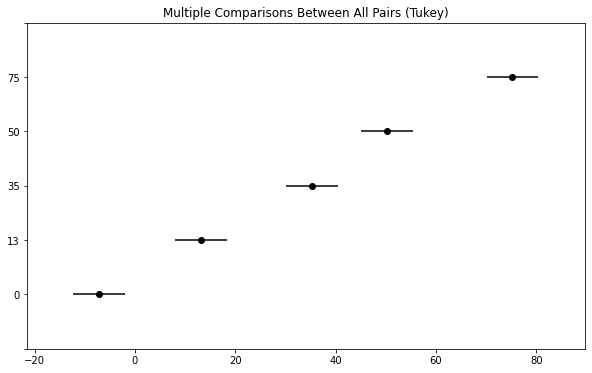

In [98]:
#To determine which groups had a significant difference from one another, a Tukey's HSD test was performed.
mc = pairwise_tukeyhsd(df['initialchange'],df['sediments'])
result = mc._results_table
print(result)
_ = mc.plot_simultaneous()

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     H      I  -1.1472    0.9  -24.291 21.9967  False
     H      L  -8.0049   0.67 -31.1487 15.1389  False
     I      L  -6.8577 0.7377 -30.0015 16.2861  False
-----------------------------------------------------


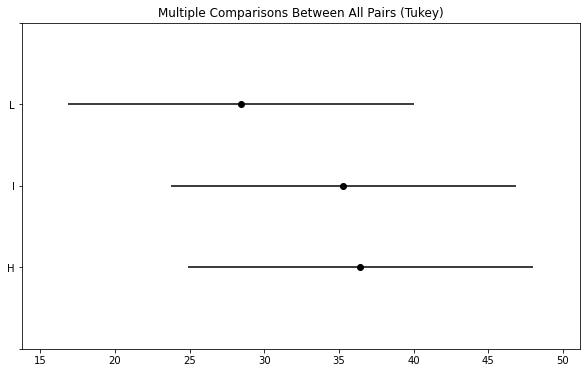

In [99]:
#To determine which groups had a significant difference from one another, a Tukey's HSD test was performed.
mc = pairwise_tukeyhsd(df['initialchange'],df['nutrients'])
result = mc._results_table
print(result)
_ = mc.plot_simultaneous()

### 8. SET Rate of Change (ROC)

The SET rate is the estimated rate of elevation change over the course of a year.

#### Two-way ANOVA

In [318]:
df = pd.DataFrame(set_df, columns= ['plots','mm.per.246days', 'mm.per.yr','sediments','nutrients'])
df['rate'] = df['mm.per.yr']
#df['yr_rate'] = df['mm.per.yr']
df['sediments'] = df['sediments'].apply(str)
df[["sediments", "rate"]].groupby("sediments").agg(['mean', 'sem'])

rate          
                mean       sem
sediments                     
0         -20.634560  1.775627
13        -26.404067  2.890954
35        -18.189762  1.335094
50        -16.508820  1.567137
75         -9.911697  1.348850

In [319]:
zero_df = df.query('sediments == "0"')
thirty_df = df.query('sediments == "13"')
sixty_df = df.query('sediments == "35"')
ninety_df = df.query('sediments == "50"')
onetwenty_df = df.query('sediments == "75"')

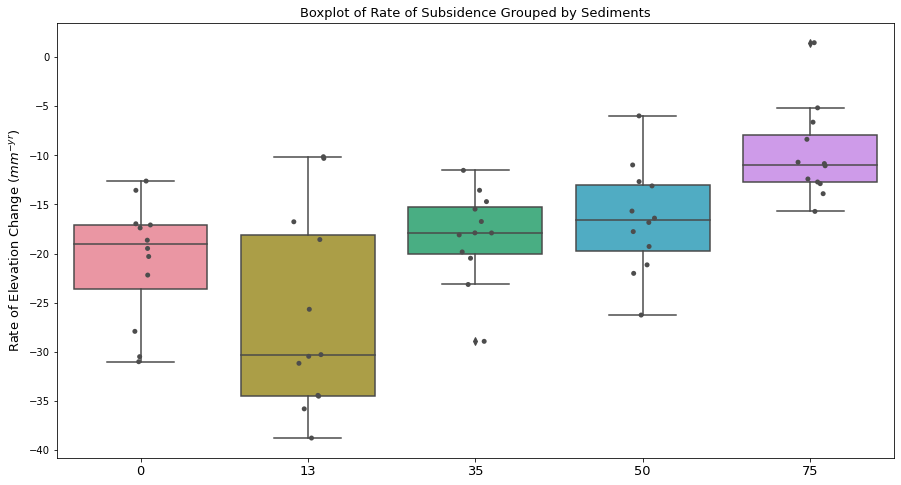

In [320]:
#I visualise the data using the seaborn library to create a boxplot of the subsidence for each sediment treatment.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="sediments", y="rate", data=df, order=["0","13","35","50","75"]) 
sns.stripplot(x="sediments", y="rate", data=df, order=["0","13","35","50","75"], jitter=0.1, color="0.3")  #
plt.title("Boxplot of Rate of Subsidence Grouped by Sediments", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2,3,4],["0","13","35","50","75"], fontsize=13)  #
plt.ylabel("Rate of Elevation Change ($mm$ $y^{-1}$)", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "set_rate_sediments_boxplot.png")
plt.show()

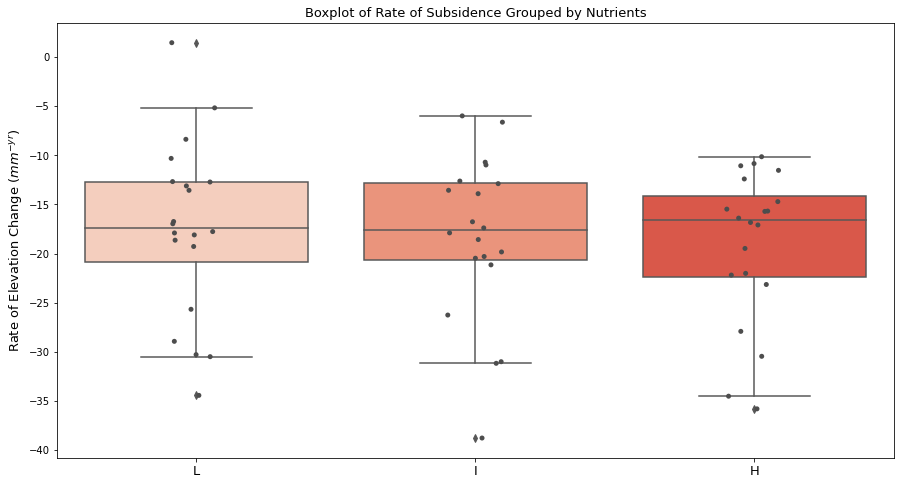

In [321]:
#I repeat this for each nutrient treatment.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="nutrients", y="rate", data=df, order=["L","I","H"])  #,"90","120"
sns.stripplot(x="nutrients", y="rate", data=df, order=["L","I","H"], jitter=0.1, color="0.3")  #,"90","120"
plt.title("Boxplot of Rate of Subsidence Grouped by Nutrients", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2],["L","I","H"], fontsize=13)  #,"90","120"
plt.ylabel("Rate of Elevation Change ($mm$ $y^{-1}$)", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "set_rate_nutrients_boxplot.png")
plt.show()

#### Normality Assumption Check

In [104]:
formula = 'rate ~ C(sediments) *C(nutrients)'
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rate   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     2.800
Date:                Tue, 13 Oct 2020   Prob (F-statistic):            0.00448
Time:                        15:27:24   Log-Likelihood:                 161.25
No. Observations:                  60   AIC:                            -292.5
Df Residuals:                      45   BIC:                            -261.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -0.0594      0.010     -6.243      0.000      -0.079      -0.040
C(sediments)[T.13]                      -0.0166      0.013     -1.235      0.223      -0.044       0.010
C(sediments)[T.35]                       0.0149      0.013      1.111      0.273      -0.012       0.042
C(sediments)[T.50]                       0.0108      0.013      0.802      0.427      -0.016       0.038
C(sediments)[T.75]                       0.0251      0.013      1.867      0.068      -0.002       0.052
C(nutrients)[T.I]                        0.0037      0.013      0.273      0.786      -0.023       0.031
C(nutrients)[T.L]                        0.0048      0.013      0.357      0.723      -0.022       0.032
C(sediments)[T.13]:C(nutrients)[T.I]     0.0002      0.019      0.010      0.992      -0.038       0.038
C(sediments)[T.35]:C(nutrients)[T.I]    -0.0084      0.019     -0.441      0.661      -0.047       0.030
C(sediments)[T.50]:C(nutrients)[T.I]     0.0008      0.019      0.043      0.966      -0.037       0.039
C(sediments)[T.75]:C(nutrients)[T.I]     0.0004      0.019      0.020      0.984      -0.038       0.039
C(sediments)[T.13]:C(nutrients)[T.L]     0.0022      0.019      0.116      0.908      -0.036       0.040
C(sediments)[T.35]:C(nutrients)[T.L]    -0.0163      0.019     -0.858      0.396      -0.055       0.022
C(sediments)[T.50]:C(nutrients)[T.L]     0.0007      0.019      0.039      0.969      -0.038       0.039
C(sediments)[T.75]:C(nutrients)[T.L]     0.0125      0.019      0.656      0.515      -0.026       0.051
==============================================================================
Omnibus:                        2.030   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.362   Jarque-Bera (JB):                1.260
Skew:                           0.296   Prob(JB):                        0.533
Kurtosis:                       3.392   Cond. No.                         21.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
w, pvalue = stats.shapiro(model.resid)
print("Shapiro: w", w, "pvalue", pvalue)
#p-value is >0.05 for all groups, hence, we can conclude that they follow the Gaussian Distribution

Shapiro: w 0.9804326891899109 pvalue 0.44711247086524963


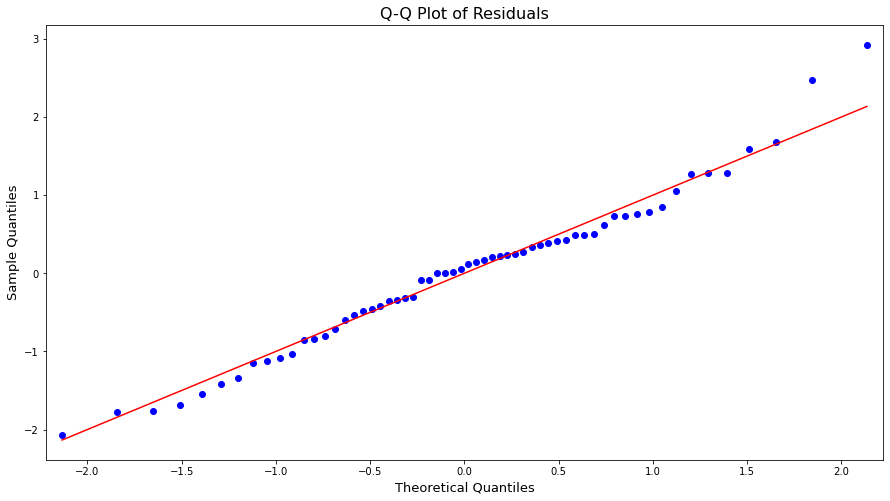

In [106]:
#QQ Plot Test - check the Normal distribution of residuals to ensure that the first asumption of ANOVA is satisfied. 
#As the plot is fairly linear along the diagonal, the assumption is considered satisfied.
res = model.resid
fig = qqplot(res, line='s', fit=True)
ax = plt.gca()
fig.set_size_inches(15,8)
ax.set_xlabel("Theoretical Quantiles", fontsize=13)
ax.set_ylabel("Sample Quantiles", fontsize=13)
ax.set_title("Q-Q Plot of Residuals", fontsize=16)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "set_rate_residuals.png")
plt.show()

#### Homogeneity Check

In [107]:
#A levene tests is then used to test the homoscedasticity of the groups. An assumption of ANOVA is that the groups must be equal variance (homoscedatic)
#P-value more than 0.05 means groups are homoscedastic and assumption was satisfied
levene_test = levene(zero_df.rate, thirty_df.rate, sixty_df.rate, ninety_df.rate, onetwenty_df.rate)
levene_test

LeveneResult(statistic=2.091763734642346, pvalue=0.09427879857766652)

#### Summary of ANOVA results for SET Rate of Elevation Change

In [108]:
#Two-way ANOVA was then completed using the statsmodels library. 
#The threshold was then adjusted using a Bonferroni correction (P-value/number of tests). 
#P-value was below this threshold, meaning the null hypothesis should be rejected.
table = anova_lm(model) #, typ=2
table

,df,sum_sq,mean_sq,F,PR(>F)
C(sediments),4.0,0.013034,0.003259,9.013420,0.000020
C(nutrients),2.0,0.000213,0.000107,0.295135,0.745861
C(sediments):C(nutrients),8.0,0.000925,0.000116,0.319813,0.954335
Residual,45.0,0.016268,0.000362,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0     13  -0.0158  0.204 -0.0363 0.0047  False
     0     35   0.0067 0.8803 -0.0138 0.0272  False
     0     50   0.0113 0.5273 -0.0092 0.0318  False
     0     75   0.0294 0.0015  0.0089 0.0499   True
    13     35   0.0225 0.0245   0.002  0.043   True
    13     50   0.0271  0.004  0.0066 0.0476   True
    13     75   0.0452  0.001  0.0247 0.0657   True
    35     50   0.0046    0.9 -0.0159 0.0251  False
    35     75   0.0227  0.023  0.0022 0.0432   True
    50     75   0.0181 0.1082 -0.0024 0.0386  False
---------------------------------------------------


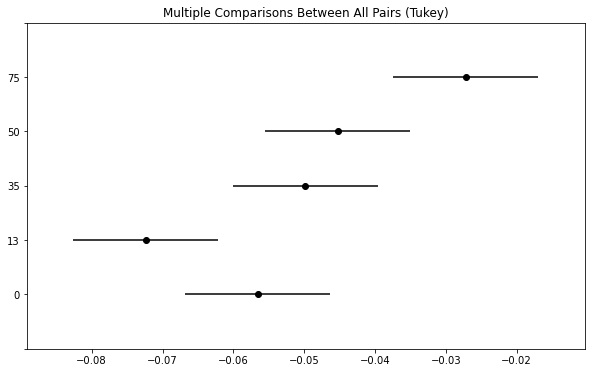

In [109]:
#To determine which groups had a significant difference from one another, a Tukey's HSD test was performed.
#The null hypothesis should be rejected for all the 'False' pairs.
mc = pairwise_tukeyhsd(df['rate'],df['sediments'])
result = mc._results_table
print(result)
_ = mc.plot_simultaneous()

### 9. SET Net Change from the spring to the fall

Net elevation change is the difference between the elevation at the beginning (Day 5) and the end (Day 246) of the experiment. The contrast was most extreme in the lowest sediment treated mesocosms, therefore, the 0 cm and 13 cm sediment treatments had experienced the most elevation losses. This may be due to the impacts of water inundation stressors. There was no transformation neccessary.

#### Two-way ANOVA

In [110]:
#Reading the data
df = pd.read_excel (r'C:\Users\molli\Dropbox\Publish\Working Graphs for Publication_2020_revised.xlsx', sheet_name='SET', index_col=0) 
df = pd.DataFrame(df, columns= ['plots','net.change.246days','sediments','nutrients'])
df['net'] = df['net.change.246days']
df['sediments'] = df['sediments'].apply(str) 
df[["sediments", "net"]].groupby("sediments").agg(['mean', 'sem'])

net          
                mean       sem
sediments                     
0         -13.237226  1.173664
13        -18.570796  2.041057
35        -12.367425  0.699010
50        -12.663780  1.138031
75        -10.846622  0.740206

In [111]:
zero_df = df.query('sediments == "0"')
thirty_df = df.query('sediments == "13"')
sixty_df = df.query('sediments == "35"')
ninety_df = df.query('sediments == "50"')
onetwenty_df = df.query('sediments == "75"')

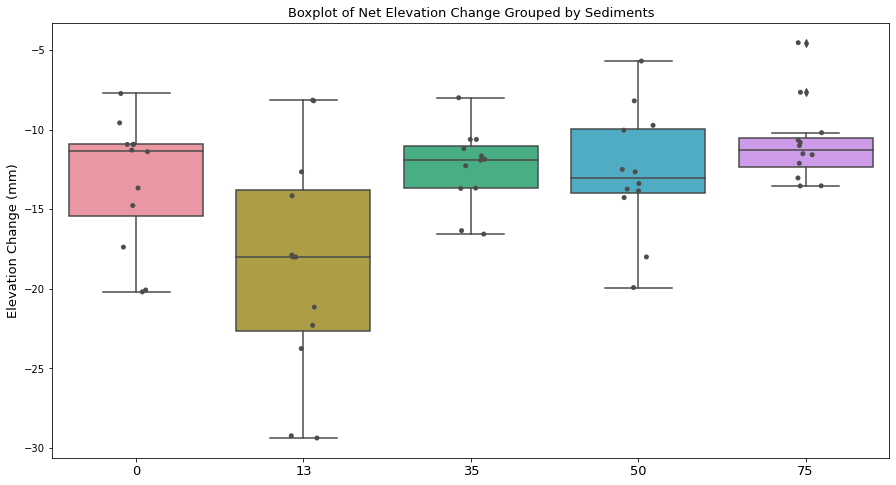

In [112]:
#I visualise the data using the seaborn library to create a boxplot of the subsidence for each sediment treatment.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="sediments", y="net", data=df, order=["0","13","35","50","75"]) 
sns.stripplot(x="sediments", y="net", data=df, order=["0","13","35","50","75"], jitter=0.1, color="0.3")  #
plt.title("Boxplot of Net Elevation Change Grouped by Sediments", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2,3,4],["0","13","35","50","75"], fontsize=13)  #
plt.ylabel("Elevation Change (mm)", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "set_rate_sediments_boxplot.png")
plt.show()

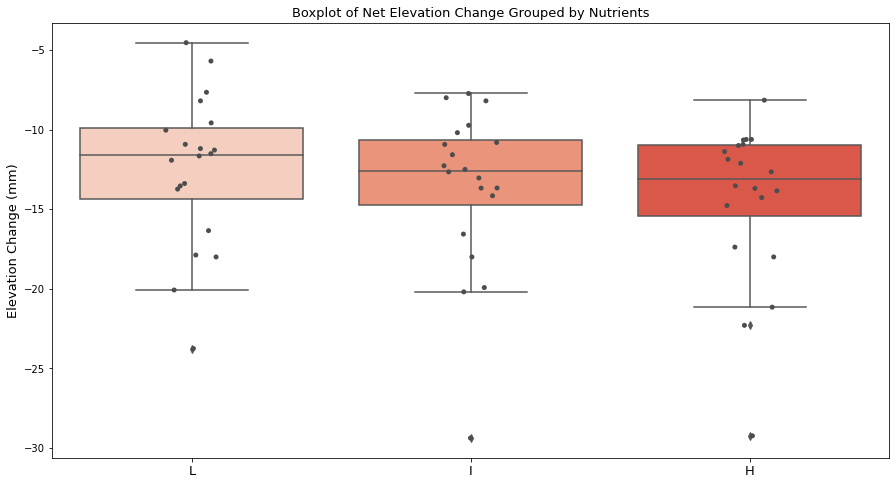

In [113]:
#I repeat this for each nutrient treatment.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="nutrients", y="net", data=df, order=["L","I","H"])  #,"90","120"
sns.stripplot(x="nutrients", y="net", data=df, order=["L","I","H"], jitter=0.1, color="0.3")  #,"90","120"
plt.title("Boxplot of Net Elevation Change Grouped by Nutrients", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2],["L","I","H"], fontsize=13)  #,"90","120"
plt.ylabel("Elevation Change (mm)", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "set_rate_nutrients_boxplot.png")
plt.show()

#### Normality Assumption Check

In [114]:
formula = 'net ~ C(sediments) *C(nutrients)'
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    net   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     1.622
Date:                Tue, 13 Oct 2020   Prob (F-statistic):              0.110
Time:                        15:27:29   Log-Likelihood:                -168.58
No. Observations:                  60   AIC:                             367.2
Df Residuals:                      45   BIC:                             398.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              -13.6159      2.320     -5.870      0.000     -18.288      -8.944
C(sediments)[T.13]                      -6.5937      3.280     -2.010      0.050     -13.201       0.013
C(sediments)[T.35]                       1.9188      3.280      0.585      0.562      -4.688       8.526
C(sediments)[T.50]                      -1.0764      3.280     -0.328      0.744      -7.683       5.531
C(sediments)[T.75]                       1.7906      3.280      0.546      0.588      -4.816       8.398
C(nutrients)[T.I]                        0.4859      3.280      0.148      0.883      -6.121       7.093
C(nutrients)[T.L]                        0.6500      3.280      0.198      0.844      -5.957       7.257
C(sediments)[T.13]:C(nutrients)[T.I]     1.1773      4.639      0.254      0.801      -8.166      10.521
C(sediments)[T.35]:C(nutrients)[T.I]    -1.4151      4.639     -0.305      0.762     -10.759       7.929
C(sediments)[T.50]:C(nutrients)[T.I]     1.6198      4.639      0.349      0.729      -7.724      10.963
C(sediments)[T.75]:C(nutrients)[T.I]    -0.0645      4.639     -0.014      0.989      -9.408       9.279
C(sediments)[T.13]:C(nutrients)[T.L]     2.6030      4.639      0.561      0.578      -6.741      11.947
C(sediments)[T.35]:C(nutrients)[T.L]    -1.7317      4.639     -0.373      0.711     -11.075       7.612
C(sediments)[T.50]:C(nutrients)[T.L]     3.3298      4.639      0.718      0.477      -6.014      12.673
C(sediments)[T.75]:C(nutrients)[T.L]     1.8645      4.639      0.402      0.690      -7.479      11.208
==============================================================================
Omnibus:                        3.211   Durbin-Watson:                   2.203
Prob(Omnibus):                  0.201   Jarque-Bera (JB):                2.923
Skew:                          -0.090   Prob(JB):                        0.232
Kurtosis:                       4.066   Cond. No.                         21.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
w, pvalue = stats.shapiro(model.resid)
print("Shapiro: w", w, "pvalue", pvalue)
#p-value is >0.05 for all groups, hence, we can conclude that they follow the Gaussian Distribution

Shapiro: w 0.9703838229179382 pvalue 0.1523718535900116


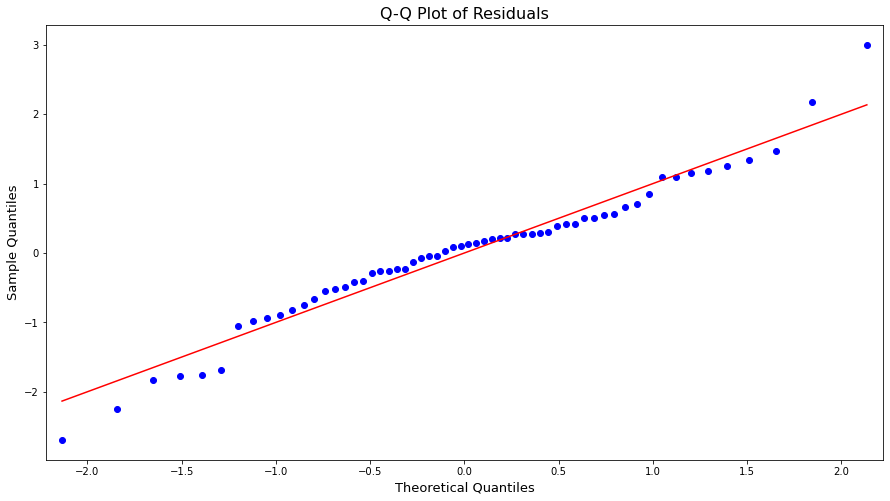

In [116]:
#QQ Plot Test - check the Normal distribution of residuals to ensure that the first asumption of ANOVA is satisfied. 
#As the plot is fairly linear along the diagonal, the assumption is considered satisfied.
res = model.resid
fig = qqplot(res, line='s', fit=True)
ax = plt.gca()
fig.set_size_inches(15,8)
ax.set_xlabel("Theoretical Quantiles", fontsize=13)
ax.set_ylabel("Sample Quantiles", fontsize=13)
ax.set_title("Q-Q Plot of Residuals", fontsize=16)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "set_net_residuals.png")
plt.show()

#### Homogeneity Check

In [117]:
#A levene tests is then used to test the homoscedasticity of the groups. 
#An assumption of ANOVA is that the groups must be equal variance (homoscedatic)
#Though this test did not pass, and the variance (and thus standard deviations) of the groups differ significantly, I am hesitant to transform the data.
levene_test = levene(zero_df.net, thirty_df.net, sixty_df.net, ninety_df.net, onetwenty_df.net)
levene_test

LeveneResult(statistic=3.217314663068219, pvalue=0.019158880605890178)

#### ANOVA results from "Net" Elevation Change

In [118]:
#Two-way ANOVA was then completed using the statsmodels library. 
#The threshold was then adjusted using a Bonferroni correction (P-value/number of tests). 
#P-value was below this threshold, meaning the null hypothesis should be rejected.
table = anova_lm(model) #, typ=2
table

,df,sum_sq,mean_sq,F,PR(>F)
C(sediments),4.0,417.570205,104.392551,4.850660,0.002443
C(nutrients),2.0,35.154057,17.577029,0.816727,0.448318
C(sediments):C(nutrients),8.0,35.891664,4.486458,0.208466,0.987868
Residual,45.0,968.458903,21.521309,NaN,NaN


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0     13  -5.3336 0.0313 -10.3392 -0.3279   True
     0     35   0.8698    0.9  -4.1359  5.8755  False
     0     50   0.5734    0.9  -4.4322  5.5791  False
     0     75   2.3906 0.6439  -2.6151  7.3963  False
    13     35   6.2034 0.0081   1.1977  11.209   True
    13     50    5.907  0.013   0.9013 10.9127   True
    13     75   7.7242  0.001   2.7185 12.7298   True
    35     50  -0.2964    0.9   -5.302  4.7093  False
    35     75   1.5208    0.9  -3.4849  6.5265  False
    50     75   1.8172 0.8238  -3.1885  6.8228  False
-----------------------------------------------------


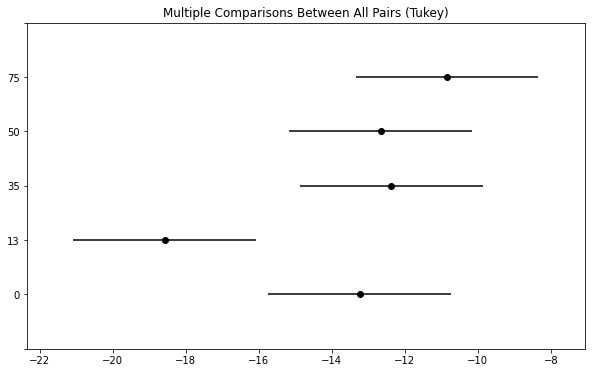

In [119]:
#To determine which groups had a significant difference from one another, a Tukey's HSD test was performed.
#The null hypothesis should be rejected for all the 'False' pairs.
mc = pairwise_tukeyhsd(df['net'],df['sediments'])
result = mc._results_table
print(result)
_ = mc.plot_simultaneous()

## Belowground biomass 

Belowground biomass accumulation estimates ($g$$m^{3}$ per month) for the original sod layer, the newer sediment layer, and both layers combined were collected at the end of the 246 d experiment. The figures depict the final amount of harvested belowground biomass accumulation in the existing and new sediment layers. The data for the belowground biomass accumulation per month was transformed using natural log transformation.

This analysis shows the trends for belowground biomass accumulated over eight months of the experiment. This information was collected based on the total grams of roots and the volume of the sediment core. After a natural log transformation and 9S2 New was removed (because the bag was broken and inadmissible). Belowground biomass was higher with the lowerest sediment loads. Nutrient loading did not impact belowground biomass accumulation.

### 10. Belowground biomass accumulation ($g$$m^{3}$ per month) of the original sod layer over 246 days

#### Two-way ANOVA

In [310]:
#Reading the data
bgbm_df = pd.read_excel (r'C:\Users\molli\Dropbox\Publish\Working Graphs for Publication_2020_revised.xlsx', sheet_name='BGBM', index_col=0) 
bgbm_df = pd.DataFrame(bgbm_df, columns= ['Plot','Core','g_cm3','g_m3','BGP.246.m3.month','sediments','nutrients'])
bgbm_df['sediments'] = bgbm_df['sediments'].astype('str') 
bgbm_df.describe()

,g_cm3,g_m3,BGP.246.m3.month
count,107.000000,107.000000,107.000000
mean,0.001877,1877.335664,234.666958
std,0.002577,2576.620409,322.077551
min,0.000173,173.302000,21.662750
25%,0.000573,573.357000,71.669625
50%,0.001019,1018.892000,127.361500
75%,0.001849,1849.166000,231.145750
max,0.019397,19397.415000,2424.676875


In [121]:
df = bgbm_df.query('Core == "Existing"')
df['BGPln'] = np.log(bgbm_df['BGP.246.m3.month']) 
df['BGPsqrt'] = np.sqrt(bgbm_df['BGP.246.m3.month'])
df.head()

,Plot,Core,g_m3,BGP.246.m3.month,sediments,nutrients,BGPln,BGPsqrt
ID,,,,,,,,
1,0S1,Existing,5210.783,651.347875,0,L,6.479044,25.521518
2,0S2,Existing,528.884,66.110500,0,I,4.191328,8.130836
3,0S3,Existing,963.425,120.428125,0,H,4.791053,10.973975
4,0S4,Existing,640.905,80.113125,0,L,4.383440,8.950594
5,0S5,Existing,703.538,87.942250,0,I,4.476680,9.377753


In [122]:
zero_df = df.query('sediments == "0"')
thirty_df = df.query('sediments == "13"')
sixty_df = df.query('sediments == "35"')
ninety_df = df.query('sediments == "50"')
onetwenty_df = df.query('sediments == "75"')

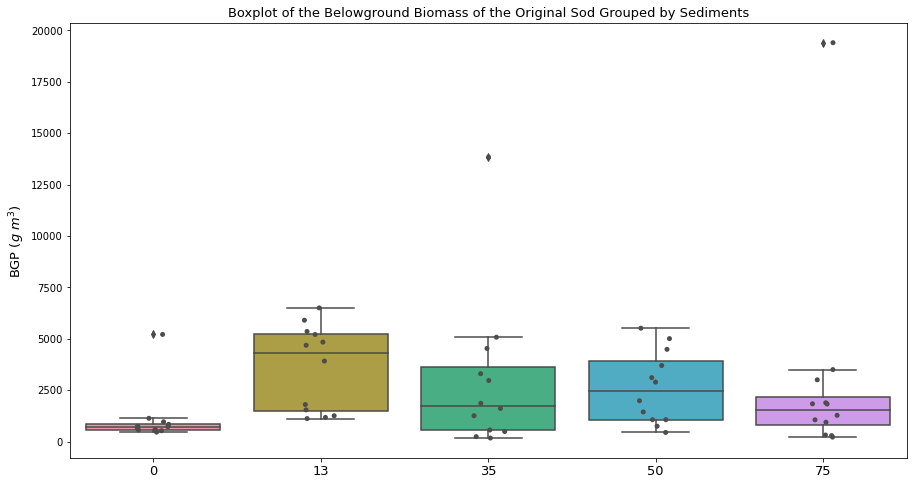

In [123]:
#I visualise the data using the seaborn library to create a boxplot of the subsidence for each sediment treatment.
#The middle line is the median.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="sediments", y="g_m3", data=df, order=["0","13","35","50","75"]) 
sns.stripplot(x="sediments", y="g_m3", data=df, order=["0","13","35","50","75"], jitter=0.1, color="0.3")  #
plt.title("Boxplot of the Belowground Biomass of the Original Sod Grouped by Sediments", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2,3,4],["0","13","35","50","75"], fontsize=13)  #
plt.ylabel("BGP ($g$ $m^{3}$)", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "BGP.m3_original_boxplot.png")
plt.show()

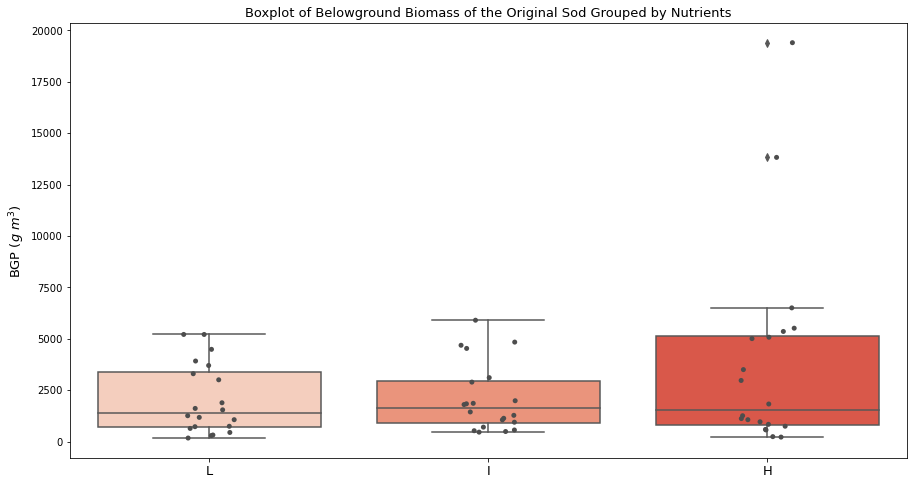

In [124]:
#I repeat this for each nutrient treatment.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="nutrients", y="g_m3", data=df, order=["L","I","H"])  #,"90","120"
sns.stripplot(x="nutrients", y="g_m3", data=df, order=["L","I","H"], jitter=0.1, color="0.3")  #,"90","120"
plt.title("Boxplot of Belowground Biomass of the Original Sod Grouped by Nutrients", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2],["L","I","H"], fontsize=13)  #,"90","120"
plt.ylabel("BGP ($g$ $m^{3}$)", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "BGP.m3_original_nutrients_boxplot.png")
plt.show()

#### Normality Assumption Check

In [125]:
formula = 'BGPln ~ C(sediments) *C(nutrients)'
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  BGPln   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     1.097
Date:                Tue, 13 Oct 2020   Prob (F-statistic):              0.386
Time:                        15:27:37   Log-Likelihood:                -78.274
No. Observations:                  60   AIC:                             186.5
Df Residuals:                      45   BIC:                             218.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                4.5024      0.515      8.743      0.000       3.465       5.540
C(sediments)[T.13]                       1.2991      0.728      1.784      0.081      -0.168       2.766
C(sediments)[T.35]                       1.3053      0.728      1.792      0.080      -0.161       2.772
C(sediments)[T.50]                       1.0987      0.728      1.509      0.138      -0.368       2.566
C(sediments)[T.75]                       1.1517      0.728      1.582      0.121      -0.315       2.619
C(nutrients)[T.I]                       -0.0841      0.728     -0.115      0.909      -1.551       1.383
C(nutrients)[T.L]                        0.4733      0.728      0.650      0.519      -0.993       1.940
C(sediments)[T.13]:C(nutrients)[T.I]     0.4821      1.030      0.468      0.642      -1.592       2.556
C(sediments)[T.35]:C(nutrients)[T.I]    -0.6836      1.030     -0.664      0.510      -2.758       1.391
C(sediments)[T.50]:C(nutrients)[T.I]     0.1237      1.030      0.120      0.905      -1.951       2.198
C(sediments)[T.75]:C(nutrients)[T.I]    -0.5291      1.030     -0.514      0.610      -2.603       1.545
C(sediments)[T.13]:C(nutrients)[T.L]    -0.5430      1.030     -0.527      0.601      -2.617       1.531
C(sediments)[T.35]:C(nutrients)[T.L]    -1.4152      1.030     -1.374      0.176      -3.490       0.659
C(sediments)[T.50]:C(nutrients)[T.L]    -0.7306      1.030     -0.709      0.482      -2.805       1.344
C(sediments)[T.75]:C(nutrients)[T.L]    -1.4565      1.030     -1.414      0.164      -3.531       0.618
==============================================================================
Omnibus:                        2.149   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.341   Jarque-Bera (JB):                1.365
Skew:                          -0.313   Prob(JB):                        0.505
Kurtosis:                       3.393   Cond. No.                         21.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
w, pvalue = stats.shapiro(model.resid)
print("Shapiro: w", w, "pvalue", pvalue)
#If the p-value is >0.05 for all groups, we can conclude that they follow the Gaussian Distribution. 

Shapiro: w 0.9852170944213867 pvalue 0.6813272833824158


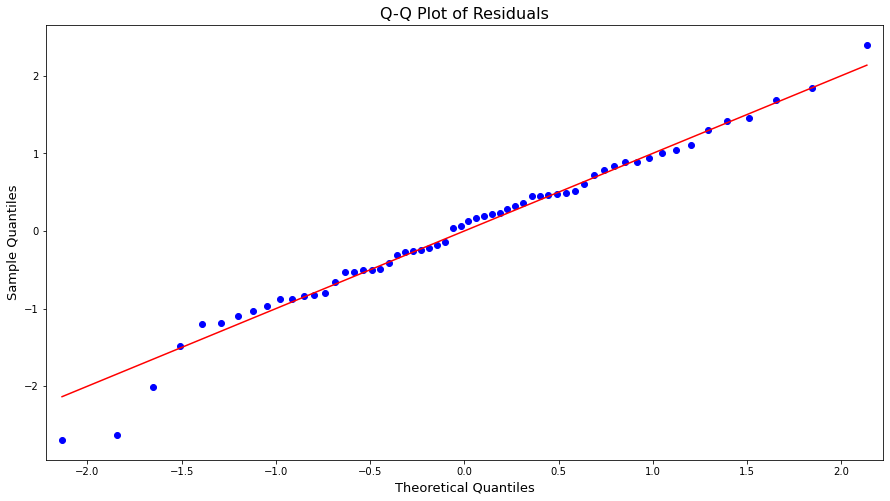

In [127]:
#QQ Plot Test - check the Normal distribution of residuals to ensure that the first asumption of ANOVA is satisfied. 
#As the plot is fairly linear along the diagonal, the assumption is considered satisfied.
res = model.resid
fig = qqplot(res, line='s', fit=True)
ax = plt.gca()
fig.set_size_inches(15,8)
ax.set_xlabel("Theoretical Quantiles", fontsize=13)
ax.set_ylabel("Sample Quantiles", fontsize=13)
ax.set_title("Q-Q Plot of Residuals", fontsize=16)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "BGP_original_residuals.png")
plt.show()

#### Homogeneity Check

In [128]:
#A levene tests is then used to test the homoscedasticity of the groups. 
#An assumption of ANOVA is that the groups must be equal variance (homoscedatic)
#P-value more than 0.05 means groups are homoscedastic and assumption was satisfied
levene_test = levene(zero_df.BGPln, thirty_df.BGPln, sixty_df.BGPln, ninety_df.BGPln, onetwenty_df.BGPln)
levene_test

LeveneResult(statistic=2.1284858249383123, pvalue=0.0895173746102679)

#### Summary of ANOVA results for the Original Sod Belowground Biomass ($g$ $m^{3}$ per month)

In [129]:
#Two-way ANOVA was then completed using the statsmodels library. 
#The threshold was then adjusted using a Bonferroni correction (P-value/number of tests). 
#P-value was below this threshold, meaning the null hypothesis should be rejected.
table = anova_lm(model)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(sediments),4.0,10.873671,2.718418,2.562848,0.051102
C(nutrients),2.0,1.275504,0.637752,0.601255,0.552467
C(sediments):C(nutrients),8.0,4.145942,0.518243,0.488585,0.857849
Residual,45.0,47.731587,1.060702,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0     13   1.2788 0.0193  0.1469 2.4107   True
     0     35   0.6057 0.5536 -0.5262 1.7376  False
     0     50   0.8965 0.1827 -0.2354 2.0284  False
     0     75   0.4899 0.7142  -0.642 1.6218  False
    13     35  -0.6731 0.4576  -1.805 0.4588  False
    13     50  -0.3823 0.8634 -1.5142 0.7496  False
    13     75  -0.7889 0.2963 -1.9208  0.343  False
    35     50   0.2908    0.9 -0.8411 1.4227  False
    35     75  -0.1158    0.9 -1.2477 1.0161  False
    50     75  -0.4066 0.8298 -1.5385 0.7253  False
---------------------------------------------------


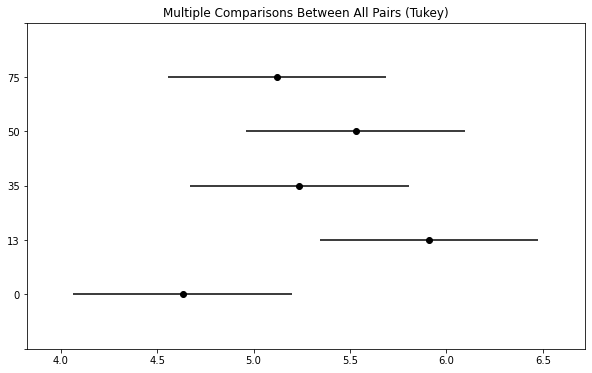

In [130]:
#To determine which groups had a significant difference from one another, a Tukey's HSD test was performed.
#The null hypothesis should be rejected for all the 'False' pairs.
mc = pairwise_tukeyhsd(df['BGPln'],df['sediments'])
result = mc._results_table
print(result)
_ = mc.plot_simultaneous()

### 11. Belowground biomass accumulation ($g$ $m^{3}$ per month) of the newly added sediment layer

#### Two-way ANOVA

In [131]:
df = bgbm_df.query('Core == "New"')
df['BGPln'] = np.log(bgbm_df['BGP.246.m3.month']) 
df['BGPsqrt'] = np.sqrt(bgbm_df['BGP.246.m3.month'])
df.head()

,Plot,Core,g_m3,BGP.246.m3.month,sediments,nutrients,BGPln,BGPsqrt
ID,,,,,,,,
61,3S1,New,816.031,102.003875,13,L,4.625011,10.099697
62,3S2,New,1745.942,218.242750,13,I,5.385608,14.773041
63,3S3,New,746.680,93.335000,13,H,4.536195,9.661004
64,3S4,New,1667.354,208.419250,13,L,5.339552,14.436733
65,3S5,New,960.235,120.029375,13,I,4.787737,10.955792


In [132]:
thirty_df = df.query('sediments == "13"')
sixty_df = df.query('sediments == "35"')
ninety_df = df.query('sediments == "50"')
onetwenty_df = df.query('sediments == "75"')

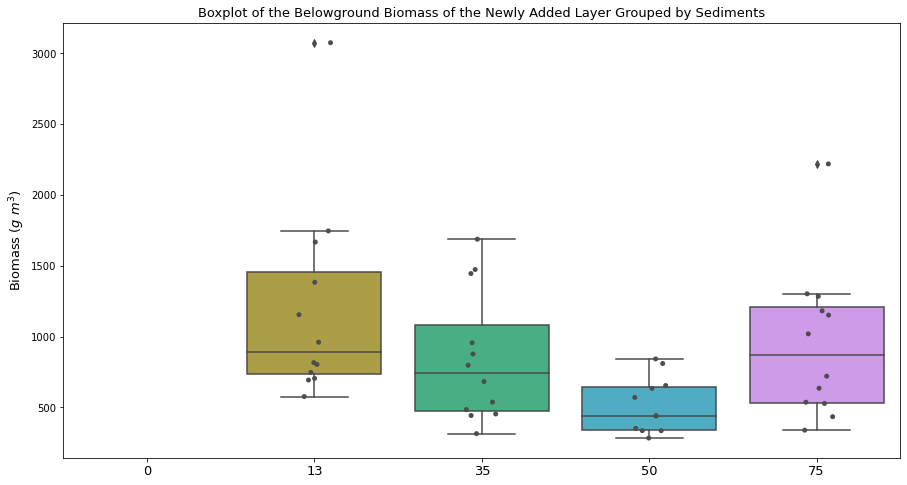

In [133]:
#I visualise the data using the seaborn library to create a boxplot of the subsidence for each sediment treatment.
#The middle line is the median.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="sediments", y="g_m3", data=df, order=["0","13","35","50","75"]) 
sns.stripplot(x="sediments", y="g_m3", data=df, order=["0","13","35","50","75"], jitter=0.1, color="0.3")  #
plt.title("Boxplot of the Belowground Biomass of the Newly Added Layer Grouped by Sediments", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2,3,4],["0","13","35","50","75"], fontsize=13)  #
plt.ylabel("Biomass ($g$ $m^{3}$)", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "BGP.m3.month_new_boxplot.png")
plt.show()

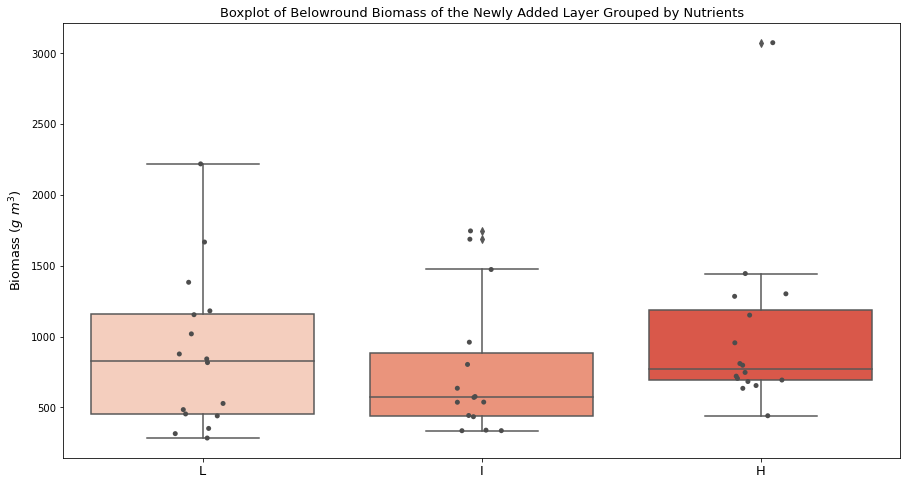

In [134]:
#I repeat this for each nutrient treatment.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="nutrients", y="g_m3", data=df, order=["L","I","H"])  #,"90","120"
sns.stripplot(x="nutrients", y="g_m3", data=df, order=["L","I","H"], jitter=0.1, color="0.3")  #,"90","120"
plt.title("Boxplot of Belowround Biomass of the Newly Added Layer Grouped by Nutrients", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2],["L","I","H"], fontsize=13)  #,"90","120"
plt.ylabel("Biomass ($g$ $m^{3}$)", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "BGP.m3.month_new_nutrients_boxplot.png")
plt.show()

#### Normality Assumption Check

In [135]:
formula = 'BGPln ~ C(sediments) *C(nutrients)'
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  BGPln   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     3.009
Date:                Tue, 13 Oct 2020   Prob (F-statistic):            0.00639
Time:                        15:27:40   Log-Likelihood:                -23.020
No. Observations:                  47   AIC:                             70.04
Df Residuals:                      35   BIC:                             92.24
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                4.8569      0.229     21.227      0.000       4.392       5.321
C(sediments)[T.35]                      -0.0999      0.324     -0.309      0.759      -0.757       0.557
C(sediments)[T.50]                      -0.5061      0.324     -1.564      0.127      -1.163       0.151
C(sediments)[T.75]                       0.0531      0.324      0.164      0.871      -0.604       0.710
C(nutrients)[T.I]                       -0.0919      0.324     -0.284      0.778      -0.749       0.565
C(nutrients)[T.L]                        0.1654      0.324      0.511      0.612      -0.491       0.822
C(sediments)[T.35]:C(nutrients)[T.I]     0.0318      0.458      0.069      0.945      -0.897       0.961
C(sediments)[T.50]:C(nutrients)[T.I]    -0.3462      0.476     -0.727      0.472      -1.313       0.621
C(sediments)[T.75]:C(nutrients)[T.I]    -0.7381      0.458     -1.613      0.116      -1.667       0.191
C(sediments)[T.35]:C(nutrients)[T.L]    -0.7951      0.458     -1.737      0.091      -1.724       0.134
C(sediments)[T.50]:C(nutrients)[T.L]    -0.5130      0.458     -1.121      0.270      -1.442       0.416
C(sediments)[T.75]:C(nutrients)[T.L]    -0.1612      0.458     -0.352      0.727      -1.090       0.768
==============================================================================
Omnibus:                        2.456   Durbin-Watson:                   2.207
Prob(Omnibus):                  0.293   Jarque-Bera (JB):                2.090
Skew:                           0.513   Prob(JB):                        0.352
Kurtosis:                       2.888   Cond. No.                         17.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
w, pvalue = stats.shapiro(model.resid)
print("Shapiro: w", w, "pvalue", pvalue)
#If the p-value is >0.05 for all groups, we can conclude that they follow the Gaussian Distribution. 

Shapiro: w 0.9713190793991089 pvalue 0.297140896320343


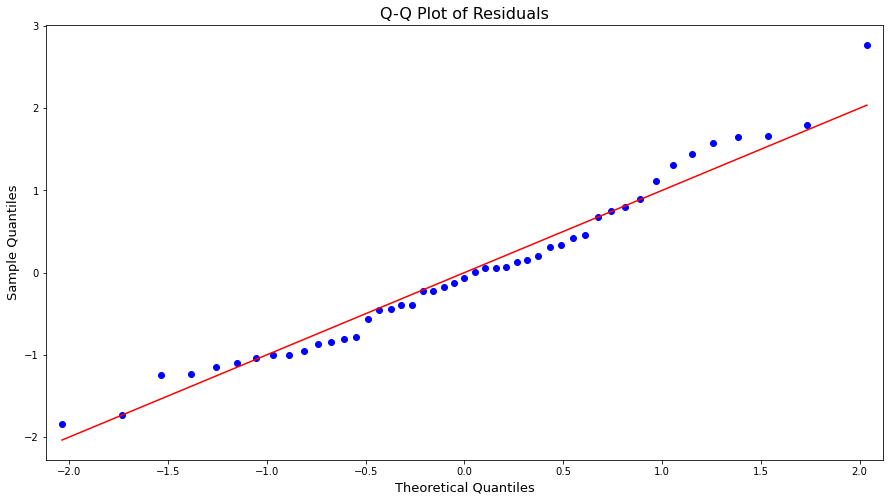

In [137]:
#QQ Plot Test - check the Normal distribution of residuals to ensure that the first asumption of ANOVA is satisfied. 
#As the plot is fairly linear along the diagonal, the assumption is considered satisfied.
res = model.resid
fig = qqplot(res, line='s', fit=True)
ax = plt.gca()
fig.set_size_inches(15,8)
ax.set_xlabel("Theoretical Quantiles", fontsize=13)
ax.set_ylabel("Sample Quantiles", fontsize=13)
ax.set_title("Q-Q Plot of Residuals", fontsize=16)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "BGP_newlayer_residuals.png")
plt.show()

#### Homogeneity Check

In [138]:
#A levene tests is then used to test the homoscedasticity of the groups. 
#An assumption of ANOVA is that the groups must be equal variance (homoscedatic)
#P-value more than 0.05 means groups are homoscedastic and assumption was satisfied
levene_test = levene(thirty_df.BGPln, sixty_df.BGPln, ninety_df.BGPln, onetwenty_df.BGPln)
levene_test

LeveneResult(statistic=0.6882493605033994, pvalue=0.56417869036737)

#### Summary of ANOVA results for Belowground Biomass Accumulated in the New Layer

In [139]:
#Two-way ANOVA was then completed using the statsmodels library. 
#The threshold was then adjusted using a Bonferroni correction (P-value/number of tests). 
#P-value was below this threshold, meaning the null hypothesis should be rejected.
table = anova_lm(model)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(sediments),3.0,3.588718,1.196239,5.712657,0.002721
C(nutrients),2.0,0.981021,0.490510,2.342439,0.110982
C(sediments):C(nutrients),6.0,2.361650,0.393608,1.879682,0.112121
Residual,35.0,7.329054,0.209402,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    13     35  -0.3543 0.3152 -0.8979  0.1892  False
    13     50  -0.7765  0.003 -1.3323 -0.2207   True
    13     75  -0.2467 0.6091 -0.7903  0.2968  False
    35     50  -0.4222  0.193 -0.9779  0.1336  False
    35     75   0.1076    0.9  -0.436  0.6511  False
    50     75   0.5298 0.0668  -0.026  1.0855  False
----------------------------------------------------


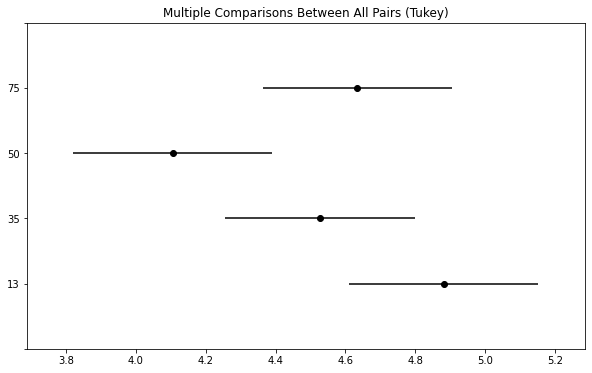

In [140]:
#To determine which groups had a significant difference from one another, a Tukey's HSD test was performed.
#The null hypothesis should be rejected for all the 'False' pairs.
mc = pairwise_tukeyhsd(df['BGPln'],df['sediments'])
result = mc._results_table
print(result)
_ = mc.plot_simultaneous()

### 12. Total belowground biomass accumulation

Total belowground biomass ($g$ $m^{3}$ per month) accumulation for both the original sod and newly added sediment layers. We used natural log transformations for the ANOVA test on belowground biomass accumulated per month. Figures show the value of belowground biomass accumulation at the end of 246 days.

Intermediate sediment layers had higher belowground biomass accumulation.

#### Two-way ANOVA

In [141]:
#Reading the data
#bgbm_df = pd.read_excel (r'C:\Users\molli\Dropbox\Publish\Working Graphs for Publication_2020_revised.xlsx', sheet_name='BGBM', index_col=0) 
#bgbm_df = pd.DataFrame(bgbm_df, columns= ['Plot','Core','g_m3','BGP.246.m3.month','sediments','nutrients'])
#bgbm_df['sediments'] = bgbm_df['sediments'].astype('str') 

In [142]:
df = bgbm_df.groupby(['Plot', 'sediments', 'nutrients']).agg({'BGP.246.m3.month': np.sum,'g_m3': np.sum})  
df = df.reset_index()
df.index = np.arange(1, len(df)+1)
df.index.names = ['ID']
df['BGPln'] = np.log(bgbm_df['BGP.246.m3.month']) 
df['BGPsqrt'] = np.sqrt(bgbm_df['BGP.246.m3.month'])

In [143]:
zero_df = df.query('sediments == "0"')
thirty_df = df.query('sediments == "13"')
sixty_df = df.query('sediments == "35"')
ninety_df = df.query('sediments == "50"')
onetwenty_df = df.query('sediments == "75"')

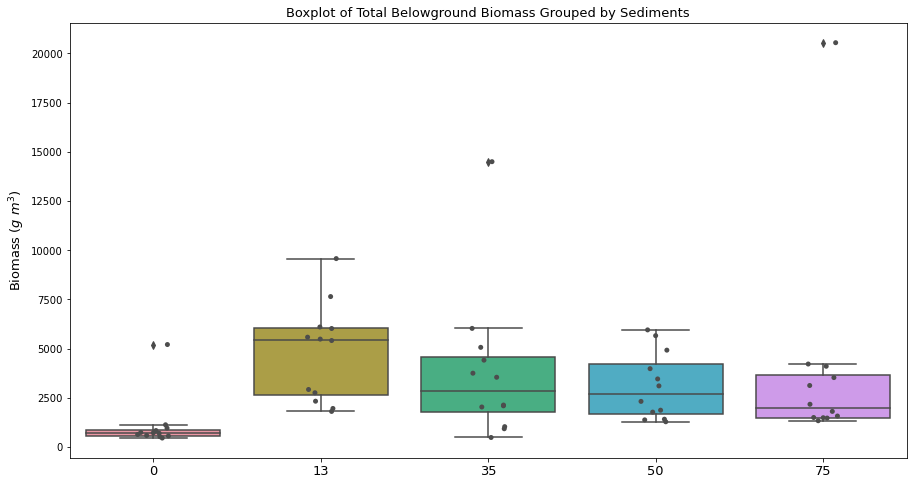

In [144]:
#I visualise the data using the seaborn library to create a boxplot of the subsidence for each sediment treatment.
#The middle line is the median.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="sediments", y="g_m3", data=df, order=["0","13","35","50","75"]) 
sns.stripplot(x="sediments", y="g_m3", data=df, order=["0","13","35","50","75"], jitter=0.1, color="0.3")  #
plt.title("Boxplot of Total Belowground Biomass Grouped by Sediments", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2,3,4],["0","13","35","50","75"], fontsize=13)  #
plt.ylabel("Biomass ($g$ $m^{3}$)", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "BGP_boxplot.png")
plt.show()

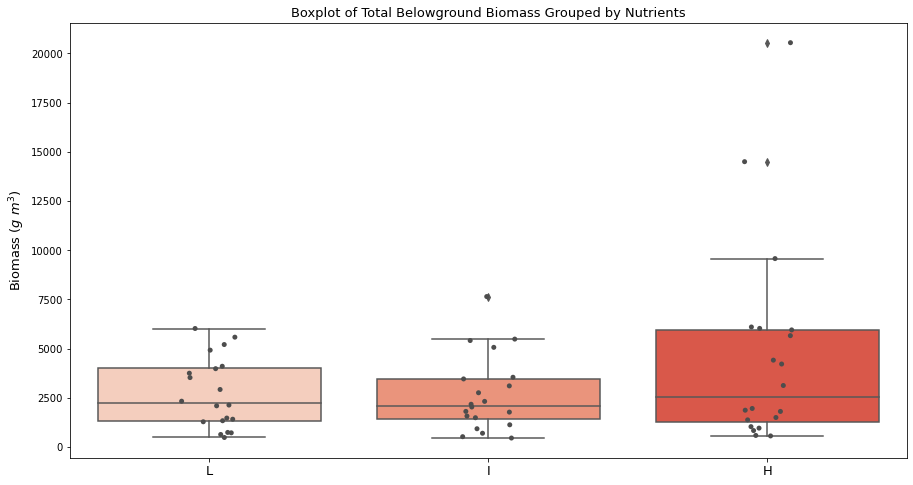

In [145]:
#I repeat this for each nutrient treatment.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="nutrients", y="g_m3", data=df, order=["L","I","H"])  #,"90","120"
sns.stripplot(x="nutrients", y="g_m3", data=df, order=["L","I","H"], jitter=0.1, color="0.3")  #,"90","120"
plt.title("Boxplot of Total Belowground Biomass Grouped by Nutrients", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2],["L","I","H"], fontsize=13)  #,"90","120"
plt.ylabel("Biomass ($g$ $m^{3}$)", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "BGP_nutrients_boxplot.png")
plt.show()

#### Normality Assumption Check

In [146]:
formula = 'BGPln ~ C(sediments) *C(nutrients)'
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  BGPln   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     1.461
Date:                Tue, 13 Oct 2020   Prob (F-statistic):              0.166
Time:                        15:27:44   Log-Likelihood:                -75.841
No. Observations:                  60   AIC:                             181.7
Df Residuals:                      45   BIC:                             213.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                4.4005      0.494      8.899      0.000       3.404       5.396
C(sediments)[T.13]                       1.8824      0.699      2.692      0.010       0.474       3.291
C(sediments)[T.35]                       1.6004      0.699      2.288      0.027       0.192       3.009
C(sediments)[T.50]                       0.7961      0.699      1.138      0.261      -0.612       2.205
C(sediments)[T.75]                       1.3228      0.699      1.892      0.065      -0.086       2.731
C(nutrients)[T.I]                        0.1677      0.699      0.240      0.812      -1.241       1.576
C(nutrients)[T.L]                        0.5272      0.699      0.754      0.455      -0.881       1.936
C(sediments)[T.13]:C(nutrients)[T.I]    -1.5879      0.989     -1.606      0.115      -3.580       0.404
C(sediments)[T.35]:C(nutrients)[T.I]    -0.8840      0.989     -0.894      0.376      -2.876       1.108
C(sediments)[T.50]:C(nutrients)[T.I]    -0.3246      0.989     -0.328      0.744      -2.317       1.667
C(sediments)[T.75]:C(nutrients)[T.I]     0.2841      0.989      0.287      0.775      -1.708       2.276
C(sediments)[T.13]:C(nutrients)[T.L]    -2.2422      0.989     -2.267      0.028      -4.234      -0.250
C(sediments)[T.35]:C(nutrients)[T.L]    -1.2277      0.989     -1.241      0.221      -3.220       0.764
C(sediments)[T.50]:C(nutrients)[T.L]    -0.5940      0.989     -0.601      0.551      -2.586       1.398
C(sediments)[T.75]:C(nutrients)[T.L]    -0.4163      0.989     -0.421      0.676      -2.408       1.576
==============================================================================
Omnibus:                        1.164   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.559   Jarque-Bera (JB):                0.550
Skew:                           0.171   Prob(JB):                        0.760
Kurtosis:                       3.321   Cond. No.                         21.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [147]:
w, pvalue = stats.shapiro(model.resid)
print("Shapiro: w", w, "pvalue", pvalue)
#If the p-value is >0.05 for all groups, we can conclude that they follow the Gaussian Distribution. 

Shapiro: w 0.9867823123931885 pvalue 0.7619662284851074


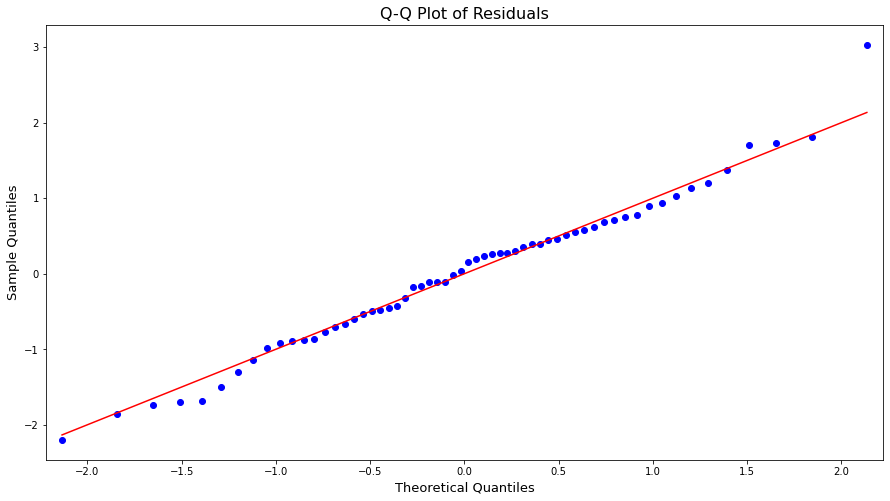

In [148]:
#QQ Plot Test - check the Normal distribution of residuals to ensure that the first asumption of ANOVA is satisfied. 
#As the plot is fairly linear along the diagonal, the assumption is considered satisfied.
res = model.resid
fig = qqplot(res, line='s', fit=True)
ax = plt.gca()
fig.set_size_inches(15,8)
ax.set_xlabel("Theoretical Quantiles", fontsize=13)
ax.set_ylabel("Sample Quantiles", fontsize=13)
ax.set_title("Q-Q Plot of Residuals", fontsize=16)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "BGP_residuals.png")
plt.show()

#### Homogeneity Check

In [149]:
#A levene tests is then used to test the homoscedasticity of the groups. 
#An assumption of ANOVA is that the groups must be equal variance (homoscedatic)
#P-value more than 0.05 means groups are homoscedastic and assumption was satisfied
levene_test = levene(zero_df.BGPln, thirty_df.BGPln, sixty_df.BGPln, ninety_df.BGPln, onetwenty_df.BGPln)
levene_test

LeveneResult(statistic=2.1284858249383123, pvalue=0.0895173746102679)

#### Summary of ANOVA results for the total belowground biomass  ($g$ $m^{3}$ per month) 

In [150]:
#Two-way ANOVA was then completed using the statsmodels library. 
#The threshold was then adjusted using a Bonferroni correction (P-value/number of tests). 
#P-value was below this threshold, meaning the null hypothesis should be rejected.
table = anova_lm(model)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(sediments),4.0,10.873671,2.718418,2.779307,0.037984
C(nutrients),2.0,1.661602,0.830801,0.849410,0.434409
C(sediments):C(nutrients),8.0,7.477299,0.934662,0.955598,0.482003
Residual,45.0,44.014132,0.978092,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0     13   0.6057 0.5536 -0.5262 1.7376  False
     0     35   0.8965 0.1827 -0.2354 2.0284  False
     0     50   0.4899 0.7142  -0.642 1.6218  False
     0     75   1.2788 0.0193  0.1469 2.4107   True
    13     35   0.2908    0.9 -0.8411 1.4227  False
    13     50  -0.1158    0.9 -1.2477 1.0161  False
    13     75   0.6731 0.4576 -0.4588  1.805  False
    35     50  -0.4066 0.8298 -1.5385 0.7253  False
    35     75   0.3823 0.8634 -0.7496 1.5142  False
    50     75   0.7889 0.2963  -0.343 1.9208  False
---------------------------------------------------


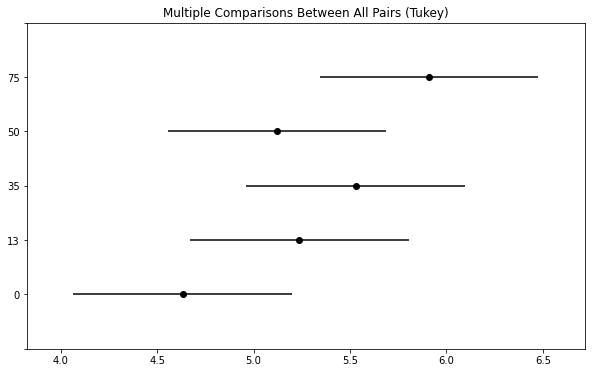

In [151]:
#To determine which groups had a significant difference from one another, a Tukey's HSD test was performed.
#The null hypothesis should be rejected for all the 'False' pairs.
mc = pairwise_tukeyhsd(df['BGPln'],df['sediments'])
result = mc._results_table
print(result)
_ = mc.plot_simultaneous()

## 13. Decomposition 

Decomposition is expressed as % Ash Free Dry Mass (% AFDM) remaining at the close of the 246 d experiment. The organic matter decomposition is the decomposed material from plant roots and rhizomes left in litterbags places belowground. These litterbags were placed in the upper 5 cm of each sod and they were collected at the end of the 246 day experiment. 

Decomposition was higher with the sediment treatments. Nutrient loading had no impact. No transformation was neccessary.

#### Two-way ANOVA

In [152]:
#Reading the data
df = pd.read_excel (r'C:\Users\molli\Dropbox\Publish\Working Graphs for Publication_2020_revised.xlsx', sheet_name='AFDM', index_col=0) 
df = pd.DataFrame(df, columns= ['plots','AFDM_remaining','sediments','nutrients'])
df['sediments'] = df['sediments'].astype('str')
df[["sediments", "AFDM_remaining"]].groupby("sediments").agg(['mean', 'sem'])

AFDM_remaining          
                    mean       sem
sediments                         
0               0.692618  0.013349
13              0.553278  0.018853
35              0.577112  0.016590
50              0.526488  0.016272
75              0.540430  0.020699

In [153]:
zero_df = df.query('sediments == "0"')
thirty_df = df.query('sediments == "13"')
sixty_df = df.query('sediments == "35"')
ninety_df = df.query('sediments == "50"')
onetwenty_df = df.query('sediments == "75"')

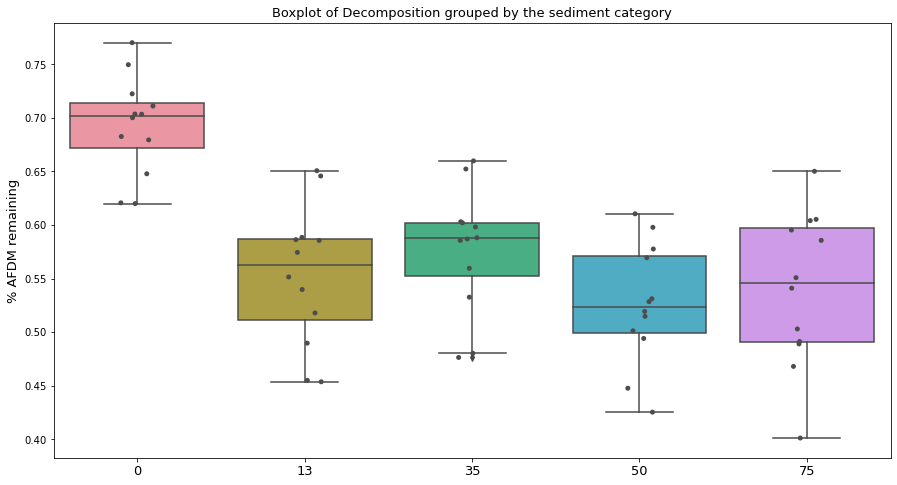

In [154]:
#I visualise the data using the seaborn library to create a boxplot of the subsidence for each sediment treatment.
#The middle line is the median.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="sediments", y="AFDM_remaining", data=df, order=["0","13","35","50","75"]) 
sns.stripplot(x="sediments", y="AFDM_remaining", data=df, order=["0","13","35","50","75"], jitter=0.1, color="0.3")  #
plt.title("Boxplot of Decomposition grouped by the sediment category", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2,3,4],["0","13","35","50","75"], fontsize=13)  #
plt.ylabel("% AFDM remaining", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "afdmremaining_boxplot.png")
plt.show()

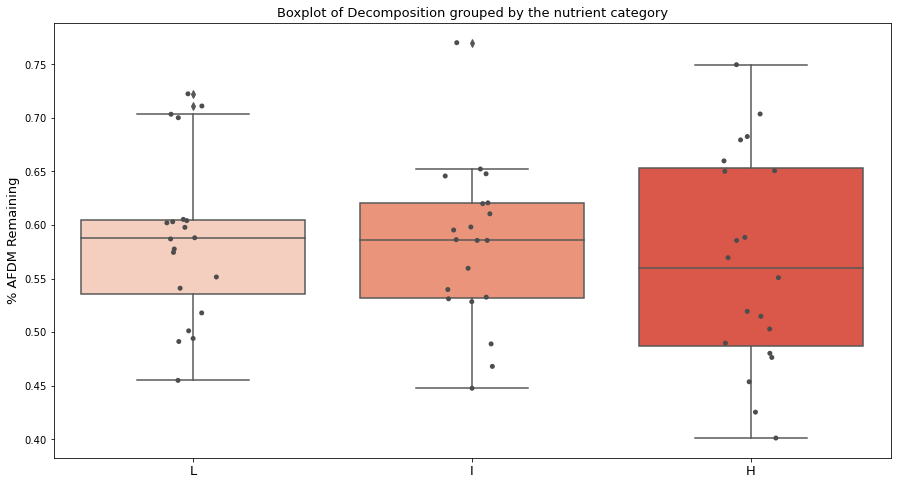

In [155]:
#I repeat this for each nutrient treatment.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="nutrients", y="AFDM_remaining", data=df, order=["L","I","H"])  #,"90","120"
sns.stripplot(x="nutrients", y="AFDM_remaining", data=df, order=["L","I","H"], jitter=0.1, color="0.3")  #,"90","120"
plt.title("Boxplot of Decomposition grouped by the nutrient category", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2],["L","I","H"], fontsize=13)  #,"90","120"
plt.ylabel("% AFDM Remaining", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "afdmremaining_nutrients_boxplot.png")
plt.show()

#### Normality Assumption Check

In [156]:
formula = 'AFDM_remaining ~ C(sediments) *C(nutrients)'
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         AFDM_remaining   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     4.340
Date:                Tue, 13 Oct 2020   Prob (F-statistic):           8.30e-05
Time:                        15:27:50   Log-Likelihood:                 89.929
No. Observations:                  60   AIC:                            -149.9
Df Residuals:                      45   BIC:                            -118.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                0.7039      0.031     22.554      0.000       0.641       0.767
C(sediments)[T.13]                      -0.1582      0.044     -3.584      0.001      -0.247      -0.069
C(sediments)[T.35]                      -0.1533      0.044     -3.474      0.001      -0.242      -0.064
C(sediments)[T.50]                      -0.1966      0.044     -4.454      0.000      -0.285      -0.108
C(sediments)[T.75]                      -0.1776      0.044     -4.023      0.000      -0.266      -0.089
C(nutrients)[T.I]                       -0.0392      0.044     -0.887      0.380      -0.128       0.050
C(nutrients)[T.L]                        0.0054      0.044      0.123      0.902      -0.083       0.094
C(sediments)[T.13]:C(nutrients)[T.I]     0.0829      0.062      1.328      0.191      -0.043       0.209
C(sediments)[T.35]:C(nutrients)[T.I]     0.0743      0.062      1.191      0.240      -0.051       0.200
C(sediments)[T.50]:C(nutrients)[T.I]     0.0614      0.062      0.983      0.331      -0.064       0.187
C(sediments)[T.75]:C(nutrients)[T.I]     0.0474      0.062      0.759      0.452      -0.078       0.173
C(sediments)[T.13]:C(nutrients)[T.L]    -0.0264      0.062     -0.423      0.675      -0.152       0.099
C(sediments)[T.35]:C(nutrients)[T.L]     0.0391      0.062      0.626      0.534      -0.087       0.165
C(sediments)[T.50]:C(nutrients)[T.L]     0.0300      0.062      0.481      0.633      -0.096       0.156
C(sediments)[T.75]:C(nutrients)[T.L]     0.0287      0.062      0.460      0.648      -0.097       0.154
==============================================================================
Omnibus:                        0.427   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.808   Jarque-Bera (JB):                0.586
Skew:                           0.147   Prob(JB):                        0.746
Kurtosis:                       2.615   Cond. No.                         21.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
w, pvalue = stats.shapiro(model.resid)
print("Shapiro: w", w, "pvalue", pvalue)
#If the p-value is >0.05 for all groups, we can conclude that residuals follow the Gaussian Distribution. 

Shapiro: w 0.9868642687797546 pvalue 0.7660945057868958


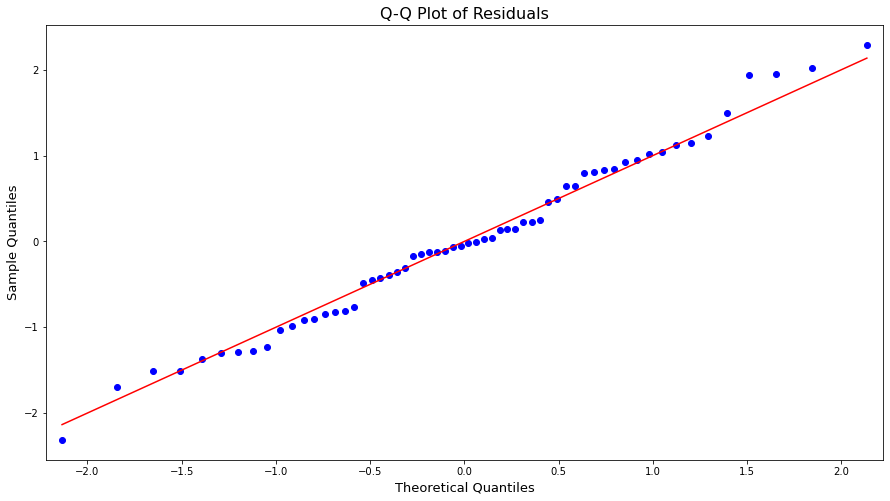

In [158]:
#QQ Plot Test - check the Normal distribution of residuals to ensure that the first asumption of ANOVA is satisfied. 
#As the plot is fairly linear along the diagonal, the assumption is considered satisfied.
res = model.resid
fig = qqplot(res, line='s', fit=True)
ax = plt.gca()
fig.set_size_inches(15,8)
ax.set_xlabel("Theoretical Quantiles", fontsize=13)
ax.set_ylabel("Sample Quantiles", fontsize=13)
ax.set_title("Q-Q Plot of Residuals", fontsize=16)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "afdm_remaining_month_residuals.png")
plt.show()

#### Homogeneity Check

In [159]:
#A levene tests is then used to test the homoscedasticity of the groups. 
#An assumption of ANOVA is that the groups must be equal variance (homoscedatic)
#P-value more than 0.05 means groups are homoscedastic and assumption was satisfied
levene_test = levene(zero_df.AFDM_remaining, thirty_df.AFDM_remaining, sixty_df.AFDM_remaining, ninety_df.AFDM_remaining, onetwenty_df.AFDM_remaining)
levene_test

LeveneResult(statistic=0.8191958592717156, pvalue=0.5185013246265325)

#### Summary of ANOVA results from Decomposition

In [160]:
#Two-way ANOVA was then completed using the statsmodels library. 
#The threshold was then adjusted using a Bonferroni correction (P-value/number of tests). 
#P-value was below this threshold, meaning the null hypothesis should be rejected.
table = anova_lm(model, typ=2)
table

,sum_sq,df,F,PR(>F)
C(sediments),0.213771,4.0,13.717821,2.166392e-07
C(nutrients),0.004122,2.0,0.528960,5.928356e-01
C(sediments):C(nutrients),0.018840,8.0,0.604495,7.690922e-01
Residual,0.175313,45.0,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0     13  -0.1393  0.001 -0.2085 -0.0702   True
     0     35  -0.1155  0.001 -0.1846 -0.0464   True
     0     50  -0.1661  0.001 -0.2353  -0.097   True
     0     75  -0.1522  0.001 -0.2213 -0.0831   True
    13     35   0.0238 0.8525 -0.0453   0.093  False
    13     50  -0.0268 0.7853 -0.0959  0.0423  False
    13     75  -0.0128    0.9  -0.082  0.0563  False
    35     50  -0.0506 0.2498 -0.1198  0.0185  False
    35     75  -0.0367 0.5607 -0.1058  0.0325  False
    50     75   0.0139    0.9 -0.0552  0.0831  False
----------------------------------------------------


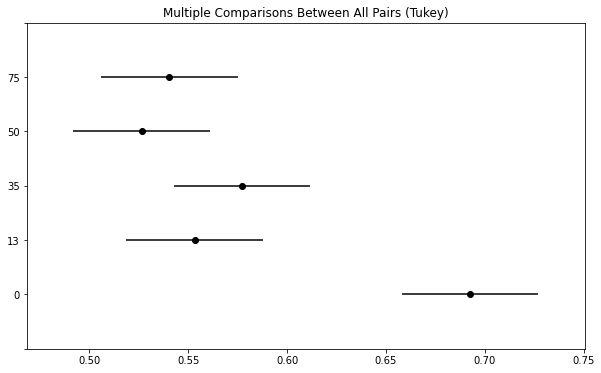

In [161]:
#To determine which groups had a significant difference from one another, a Tukey's HSD test was performed.
#The null hypothesis should be rejected for all the 'False' pairs.
mc = pairwise_tukeyhsd(df['AFDM_remaining'],df['sediments'])
result = mc._results_table
print(result)
_ = mc.plot_simultaneous()

## Physicochemistry

Physicochemical conditions include bulk density ($g$ $m^{3}$), water content (%), and organic matter content (%) collected at the end of the 246 day experiment. This section also includes the results from the average porewater salinity (psu) and average sulfide concentrations (mM).

Some mesocosms tended towards higher salinity concentrations due to frequent water replenishment and structural repair. The mesocosms with abnormally high salinity and sulfide concentrations were adjusted to normal concentrations after each bimonthly check. Ultimately, the average salinity of the mesocosms throughout the experiment was approximately 5-6 ppm and sulfides were ~470 mM.

Bulk density and salinity both had a square root transformation for the ANOVA test.

### 14. Bulk densities

In [338]:
df = pd.read_excel (r'C:\Users\molli\Dropbox\Publish\Working Graphs for Publication_2020_revised.xlsx', sheet_name='Physicochemical', index_col=0) 
df = pd.DataFrame(df, columns= ['Plots','bulk_density_g_m3','bulk_density_g_cm3','OM','WC','nutrients', 'sediments'])
df['sediments'] = df['sediments'].astype('str')
df['BD'] = np.sqrt(df['bulk_density_g_m3']) 
df[["sediments", "bulk_density_g_cm3"]].groupby("sediments").agg(['mean', 'sem'])

bulk_density_g_cm3          
                        mean       sem
sediments                             
0                   0.145479  0.015374
13                  0.260045  0.034728
35                  0.422896  0.042109
50                  0.465231  0.024129
75                  0.547293  0.018386

In [335]:
zero_df = df.query('sediments == "0"')
thirty_df = df.query('sediments == "13"')
sixty_df = df.query('sediments == "35"')
ninety_df = df.query('sediments == "50"')
onetwenty_df = df.query('sediments == "75"')

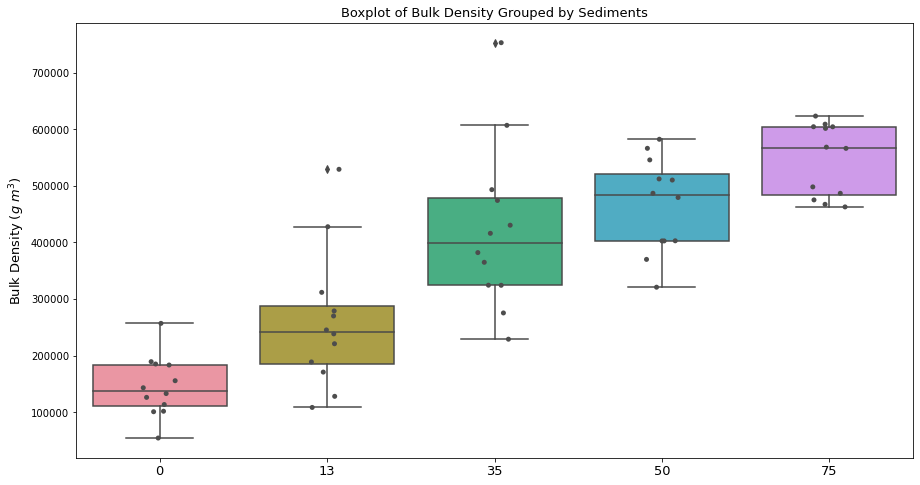

In [336]:
#I visualise the data using the seaborn library to create a boxplot of the subsidence for each sediment treatment.
#The middle line is the median.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="sediments", y="bulk_density_g_m3", data=df, order=["0","13","35","50","75"]) 
sns.stripplot(x="sediments", y="bulk_density_g_m3", data=df, order=["0","13","35","50","75"], jitter=0.1, color="0.3")  #
plt.title("Boxplot of Bulk Density Grouped by Sediments", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2,3,4],["0","13","35","50","75"], fontsize=13)  #
plt.ylabel("Bulk Density ($g$ $m^{3}$)", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "bulk_density_g_m3_boxplot.png")
plt.show()

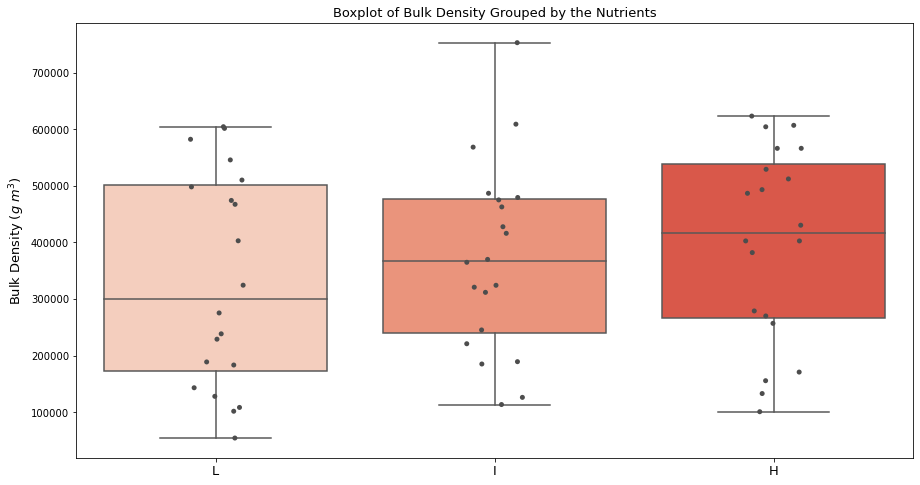

In [337]:
#I repeat this for each nutrient treatment.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="nutrients", y="bulk_density_g_m3", data=df, order=["L","I","H"])  #,"90","120"
sns.stripplot(x="nutrients", y="bulk_density_g_m3", data=df, order=["L","I","H"], jitter=0.1, color="0.3")  #,"90","120"
plt.title("Boxplot of Bulk Density Grouped by the Nutrients", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2],["L","I","H"], fontsize=13)  #,"90","120"
plt.ylabel("Bulk Density ($g$ $m^{3}$)", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "bulk_density_g_m3_nutrients_boxplot.png")
plt.show()

#### Normality Assumption Check

In [166]:
formula = 'BD ~ C(sediments) *C(nutrients)'
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     BD   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     13.30
Date:                Tue, 13 Oct 2020   Prob (F-statistic):           1.25e-11
Time:                        15:27:55   Log-Likelihood:                 75.919
No. Observations:                  60   AIC:                            -121.8
Df Residuals:                      45   BIC:                            -90.42
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                0.3962      0.039     10.051      0.000       0.317       0.476
C(sediments)[T.13]                       0.1511      0.056      2.711      0.009       0.039       0.263
C(sediments)[T.35]                       0.2927      0.056      5.251      0.000       0.180       0.405
C(sediments)[T.50]                       0.2882      0.056      5.170      0.000       0.176       0.400
C(sediments)[T.75]                       0.3581      0.056      6.424      0.000       0.246       0.470
C(nutrients)[T.I]                       -0.0065      0.056     -0.117      0.907      -0.119       0.106
C(nutrients)[T.L]                       -0.0562      0.056     -1.008      0.319      -0.168       0.056
C(sediments)[T.13]:C(nutrients)[T.I]     0.0038      0.079      0.048      0.962      -0.155       0.163
C(sediments)[T.35]:C(nutrients)[T.I]    -0.0108      0.079     -0.137      0.892      -0.170       0.148
C(sediments)[T.50]:C(nutrients)[T.I]    -0.0366      0.079     -0.464      0.645      -0.195       0.122
C(sediments)[T.75]:C(nutrients)[T.I]    -0.0218      0.079     -0.276      0.784      -0.181       0.137
C(sediments)[T.13]:C(nutrients)[T.L]    -0.0884      0.079     -1.121      0.268      -0.247       0.070
C(sediments)[T.35]:C(nutrients)[T.L]    -0.0672      0.079     -0.853      0.398      -0.226       0.092
C(sediments)[T.50]:C(nutrients)[T.L]     0.0845      0.079      1.072      0.289      -0.074       0.243
C(sediments)[T.75]:C(nutrients)[T.L]     0.0375      0.079      0.476      0.636      -0.121       0.196
==============================================================================
Omnibus:                        4.746   Durbin-Watson:                   1.567
Prob(Omnibus):                  0.093   Jarque-Bera (JB):                4.027
Skew:                           0.625   Prob(JB):                        0.134
Kurtosis:                       3.220   Cond. No.                         21.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [167]:
w, pvalue = stats.shapiro(model.resid)
print("Shapiro: w", w, "pvalue", pvalue)
#If the p-value is >0.05 for all groups, we can conclude that residuals follow the Gaussian Distribution. 

Shapiro: w 0.9651893377304077 pvalue 0.08462076634168625


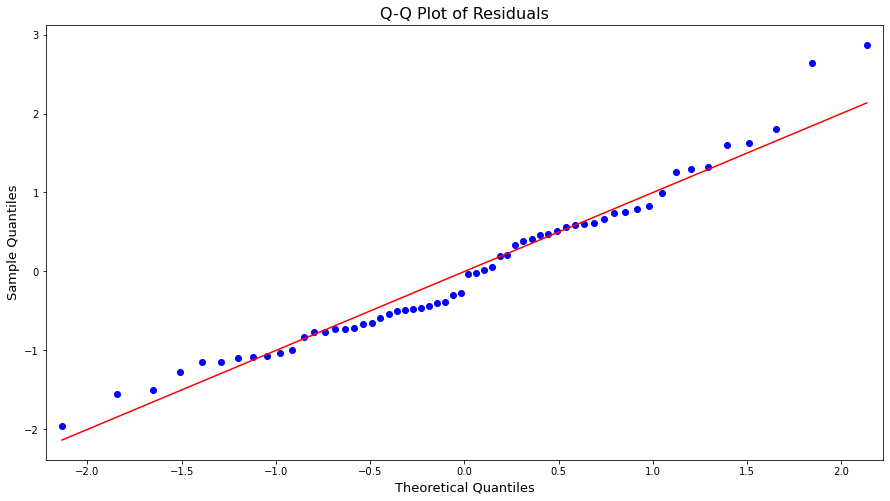

In [168]:
#QQ Plot Test - check the Normal distribution of residuals to ensure that the first asumption of ANOVA is satisfied. 
#As the plot is fairly linear along the diagonal, the assumption is considered satisfied.
res = model.resid
fig = qqplot(res, line='s', fit=True)
ax = plt.gca()
fig.set_size_inches(15,8)
ax.set_xlabel("Theoretical Quantiles", fontsize=13)
ax.set_ylabel("Sample Quantiles", fontsize=13)
ax.set_title("Q-Q Plot of Residuals", fontsize=16)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "BD_residuals.png")
plt.show()

#### Homogeneity Check

In [169]:
#A levene tests is then used to test the homoscedasticity of the groups. 
#An assumption of ANOVA is that the groups must be equal variance (homoscedatic)
#P-value more than 0.05 means groups are homoscedastic and assumption was satisfied
levene_test = levene(zero_df.BD, thirty_df.BD, sixty_df.BD, ninety_df.BD, onetwenty_df.BD)
levene_test

LeveneResult(statistic=1.7011185908812547, pvalue=0.16292181244402612)

#### Summary of ANOVA results of Bulk Density

In [170]:
#Two-way ANOVA was then completed using the statsmodels library. 
#The threshold was then adjusted using a Bonferroni correction (P-value/number of tests). 
#P-value was below this threshold, meaning the null hypothesis should be rejected.
table = anova_lm(model) #, typ=2
table

,df,sum_sq,mean_sq,F,PR(>F)
C(sediments),4.0,1.047258,0.261815,42.127696,1.144244e-14
C(nutrients),2.0,0.041412,0.020706,3.331764,4.473427e-02
C(sediments):C(nutrients),8.0,0.068562,0.008570,1.379010,2.315985e-01
Residual,45.0,0.279665,0.006215,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0     13   0.1229 0.0063   0.026 0.2198   True
     0     35   0.2667  0.001  0.1698 0.3636   True
     0     50   0.3042  0.001  0.2073 0.4011   True
     0     75   0.3633  0.001  0.2664 0.4602   True
    13     35   0.1438  0.001  0.0469 0.2407   True
    13     50   0.1813  0.001  0.0843 0.2782   True
    13     75   0.2404  0.001  0.1435 0.3373   True
    35     50   0.0375  0.787 -0.0595 0.1344  False
    35     75   0.0966 0.0511 -0.0003 0.1935  False
    50     75   0.0592 0.4311 -0.0378 0.1561  False
---------------------------------------------------


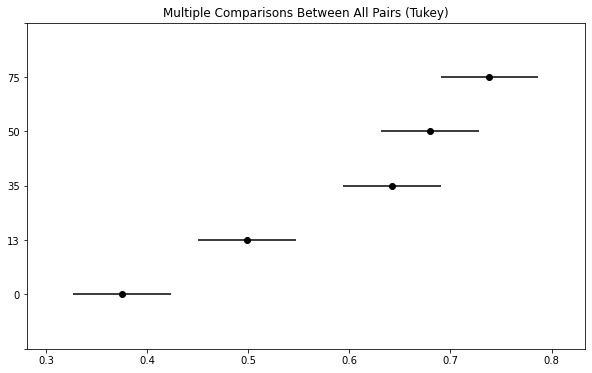

In [171]:
#To determine which groups had a significant difference from one another, a Tukey's HSD test was performed.
#The null hypothesis should be rejected for all the 'False' pairs.
mc = pairwise_tukeyhsd(df['BD'],df['sediments'])
result = mc._results_table
print(result)
_ = mc.plot_simultaneous()

### 15. Water Content (WC %)

In [172]:
df['WC%'] = (df['WC']*100) 
df[["sediments", "WC"]].groupby("sediments").agg(['mean', 'sem'])

WC          
               mean       sem
sediments                    
0          0.644879  0.020014
13         0.542100  0.022304
35         0.412831  0.019358
50         0.360790  0.008545
75         0.332559  0.009118

In [173]:
zero_df = df.query('sediments == "0"')
thirty_df = df.query('sediments == "13"')
sixty_df = df.query('sediments == "35"')
ninety_df = df.query('sediments == "50"')
onetwenty_df = df.query('sediments == "75"')

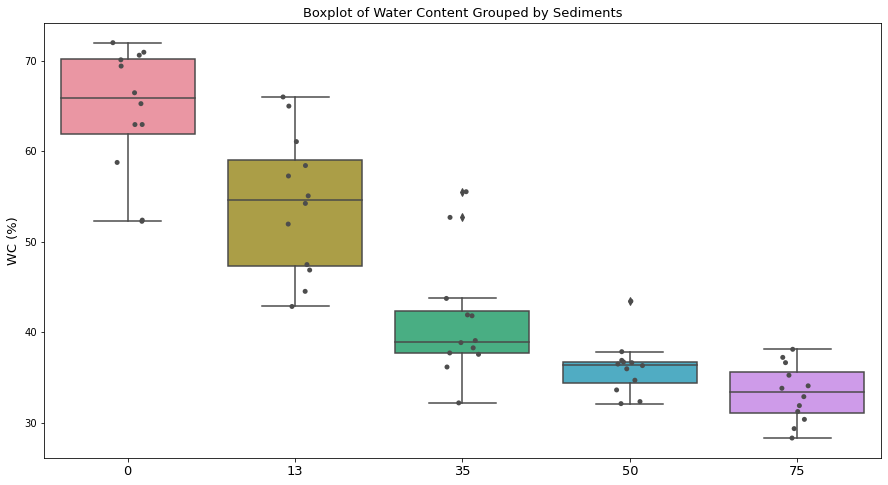

In [174]:
#I visualise the data using the seaborn library to create a boxplot of the subsidence for each sediment treatment.
#The middle line is the median.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="sediments", y="WC%", data=df, order=["0","13","35","50","75"]) 
sns.stripplot(x="sediments", y="WC%", data=df, order=["0","13","35","50","75"], jitter=0.1, color="0.3")  #
plt.title("Boxplot of Water Content Grouped by Sediments", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2,3,4],["0","13","35","50","75"], fontsize=13)  #
plt.ylabel("WC (%)", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "WC%_boxplot.png")
plt.show()

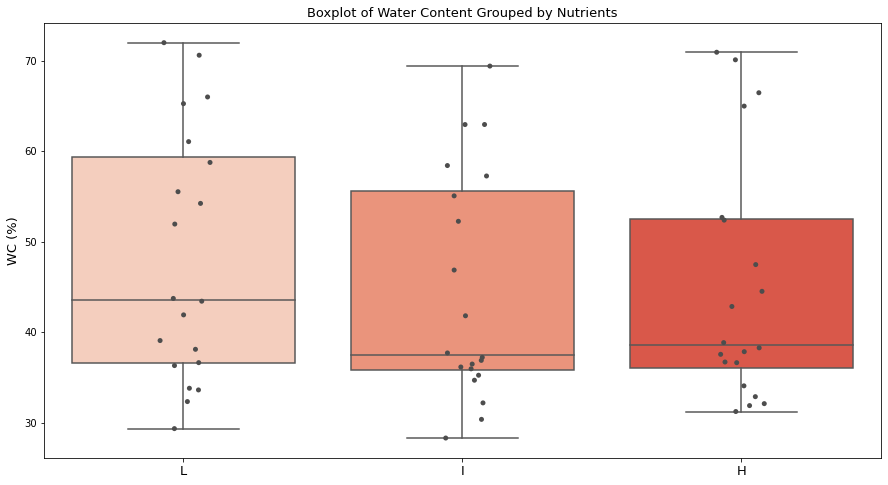

In [175]:
#I repeat this for each nutrient treatment.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="nutrients", y="WC%", data=df, order=["L","I","H"])  #,"90","120"
sns.stripplot(x="nutrients", y="WC%", data=df, order=["L","I","H"], jitter=0.1, color="0.3")  #,"90","120"
plt.title("Boxplot of Water Content Grouped by Nutrients", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2],["L","I","H"], fontsize=13)  #,"90","120"
plt.ylabel("WC (%)", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "WC_nutrients_boxplot.png")
plt.show()

#### Normality Assumption Check

In [176]:
formula = 'WC ~ C(sediments) *C(nutrients)'
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     WC   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     17.82
Date:                Tue, 13 Oct 2020   Prob (F-statistic):           7.20e-14
Time:                        15:27:57   Log-Likelihood:                 93.483
No. Observations:                  60   AIC:                            -157.0
Df Residuals:                      45   BIC:                            -125.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                0.6495      0.029     22.083      0.000       0.590       0.709
C(sediments)[T.13]                      -0.1501      0.042     -3.608      0.001      -0.234      -0.066
C(sediments)[T.35]                      -0.2312      0.042     -5.558      0.000      -0.315      -0.147
C(sediments)[T.50]                      -0.2913      0.042     -7.004      0.000      -0.375      -0.208
C(sediments)[T.75]                      -0.3244      0.042     -7.798      0.000      -0.408      -0.241
C(nutrients)[T.I]                       -0.0308      0.042     -0.740      0.463      -0.115       0.053
C(nutrients)[T.L]                        0.0168      0.042      0.404      0.688      -0.067       0.101
C(sediments)[T.13]:C(nutrients)[T.I]     0.0753      0.059      1.279      0.207      -0.043       0.194
C(sediments)[T.35]:C(nutrients)[T.I]    -0.0179      0.059     -0.305      0.762      -0.136       0.101
C(sediments)[T.50]:C(nutrients)[T.I]     0.0326      0.059      0.554      0.582      -0.086       0.151
C(sediments)[T.75]:C(nutrients)[T.I]     0.0334      0.059      0.569      0.572      -0.085       0.152
C(sediments)[T.13]:C(nutrients)[T.L]     0.0667      0.059      1.134      0.263      -0.052       0.185
C(sediments)[T.35]:C(nutrients)[T.L]     0.0154      0.059      0.261      0.795      -0.103       0.134
C(sediments)[T.50]:C(nutrients)[T.L]    -0.0108      0.059     -0.184      0.855      -0.129       0.108
C(sediments)[T.75]:C(nutrients)[T.L]     0.0027      0.059      0.046      0.963      -0.116       0.121
==============================================================================
Omnibus:                        2.352   Durbin-Watson:                   1.686
Prob(Omnibus):                  0.309   Jarque-Bera (JB):                1.518
Skew:                           0.307   Prob(JB):                        0.468
Kurtosis:                       3.480   Cond. No.                         21.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [177]:
w, pvalue = stats.shapiro(model.resid)
print("Shapiro: w", w, "pvalue", pvalue)
#If the p-value is >0.05 for all groups, we can conclude that residuals follow the Gaussian Distribution. 

Shapiro: w 0.9898580312728882 pvalue 0.9003534913063049


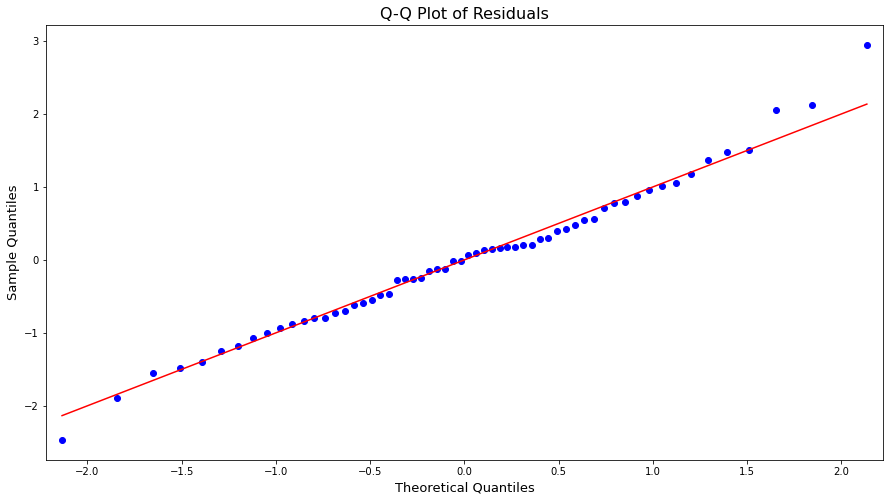

In [178]:
#QQ Plot Test - check the Normal distribution of residuals to ensure that the first asumption of ANOVA is satisfied. 
#As the plot is fairly linear along the diagonal, the assumption is considered satisfied.
res = model.resid
fig = qqplot(res, line='s', fit=True)
ax = plt.gca()
fig.set_size_inches(15,8)
ax.set_xlabel("Theoretical Quantiles", fontsize=13)
ax.set_ylabel("Sample Quantiles", fontsize=13)
ax.set_title("Q-Q Plot of Residuals", fontsize=16)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "WC_residuals.png")
plt.show()

#### Homogeneity Check

In [179]:
#A levene tests is then used to test the homoscedasticity of the groups. 
#An assumption of ANOVA is that the groups must be equal variance (homoscedatic)
#P-value more than 0.05 means groups are homoscedastic and assumption was satisfied
levene_test = levene(zero_df.WC, thirty_df.WC, sixty_df.WC, ninety_df.WC, onetwenty_df.WC)
levene_test

LeveneResult(statistic=2.8211312131678667, pvalue=0.033544274572636174)

#### Summary of ANOVA results of Water Content

In [180]:
#Two-way ANOVA was then completed using the statsmodels library. 
#The threshold was then adjusted using a Bonferroni correction (P-value/number of tests). 
#P-value was below this threshold, meaning the null hypothesis should be rejected.
table = anova_lm(model) #, typ=2
table

,df,sum_sq,mean_sq,F,PR(>F)
C(sediments),4.0,0.830636,0.207659,60.004680,1.830295e-17
C(nutrients),2.0,0.016405,0.008203,2.370199,1.050324e-01
C(sediments):C(nutrients),8.0,0.016483,0.002060,0.595377,7.764747e-01
Residual,45.0,0.155732,0.003461,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0     13  -0.1028  0.001 -0.1702 -0.0354   True
     0     35   -0.232  0.001 -0.2995 -0.1646   True
     0     50  -0.2841  0.001 -0.3515 -0.2167   True
     0     75  -0.3123  0.001 -0.3797 -0.2449   True
    13     35  -0.1293  0.001 -0.1967 -0.0618   True
    13     50  -0.1813  0.001 -0.2487 -0.1139   True
    13     75  -0.2095  0.001  -0.277 -0.1421   True
    35     50   -0.052 0.2039 -0.1195  0.0154  False
    35     75  -0.0803  0.012 -0.1477 -0.0128   True
    50     75  -0.0282 0.7364 -0.0957  0.0392  False
----------------------------------------------------


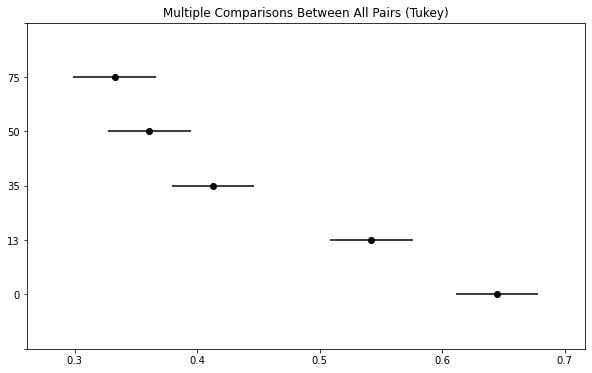

In [181]:
#To determine which groups had a significant difference from one another, a Tukey's HSD test was performed.
#The null hypothesis should be rejected for all the 'False' pairs.
mc = pairwise_tukeyhsd(df['WC'],df['sediments'])
result = mc._results_table
print(result)
_ = mc.plot_simultaneous()

### 17. Organic Matter Content (OM %)

In [182]:
df['OM%'] = (df['OM']*100) 
df[["sediments", "OM"]].groupby("sediments").agg(['mean', 'sem'])

OM          
               mean       sem
sediments                    
0          0.165743  0.013668
13         0.093976  0.009469
35         0.076427  0.013397
50         0.053338  0.004329
75         0.058572  0.005161

In [183]:
zero_df = df.query('sediments == "0"')
thirty_df = df.query('sediments == "13"')
sixty_df = df.query('sediments == "35"')
ninety_df = df.query('sediments == "50"')
onetwenty_df = df.query('sediments == "75"')

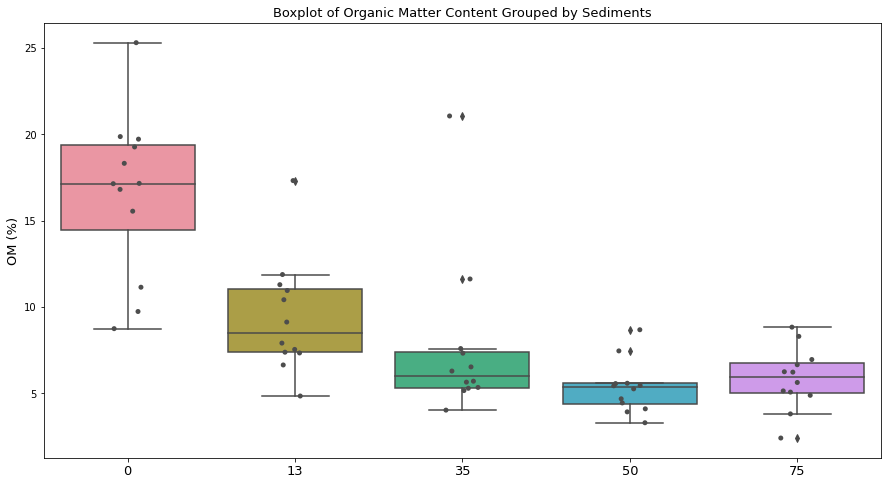

In [184]:
#I visualise the data using the seaborn library to create a boxplot of the subsidence for each sediment treatment.
#The middle line is the median.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="sediments", y="OM%", data=df, order=["0","13","35","50","75"]) 
sns.stripplot(x="sediments", y="OM%", data=df, order=["0","13","35","50","75"], jitter=0.1, color="0.3")  #
plt.title("Boxplot of Organic Matter Content Grouped by Sediments", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2,3,4],["0","13","35","50","75"], fontsize=13)  #
plt.ylabel("OM (%)", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "OM%_boxplot.png")
plt.show()

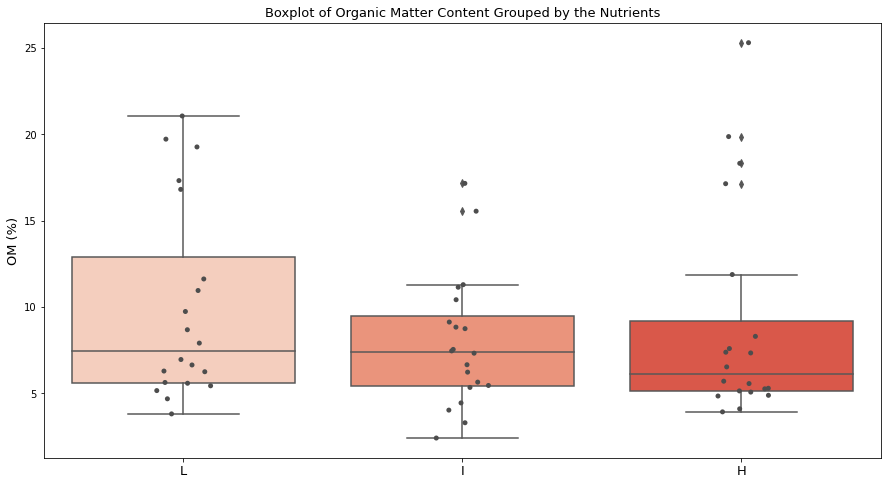

In [185]:
#I repeat this for each nutrient treatment.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="nutrients", y="OM%", data=df, order=["L","I","H"])  #,"90","120"
sns.stripplot(x="nutrients", y="OM%", data=df, order=["L","I","H"], jitter=0.1, color="0.3")  #,"90","120"
plt.title("Boxplot of Organic Matter Content Grouped by the Nutrients", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2],["L","I","H"], fontsize=13)  #,"90","120"
plt.ylabel("OM (%)", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "OM_nutrients_boxplot.png")
plt.show()

#### Normality Assumption Check

In [186]:
formula = 'OM ~ C(sediments) *C(nutrients)'
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     OM   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     8.043
Date:                Tue, 13 Oct 2020   Prob (F-statistic):           3.53e-08
Time:                        15:28:02   Log-Likelihood:                 129.28
No. Observations:                  60   AIC:                            -228.6
Df Residuals:                      45   BIC:                            -197.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                0.2017      0.016     12.452      0.000       0.169       0.234
C(sediments)[T.13]                      -0.1230      0.023     -5.369      0.000      -0.169      -0.077
C(sediments)[T.35]                      -0.1388      0.023     -6.059      0.000      -0.185      -0.093
C(sediments)[T.50]                      -0.1545      0.023     -6.743      0.000      -0.201      -0.108
C(sediments)[T.75]                      -0.1431      0.023     -6.247      0.000      -0.189      -0.097
C(nutrients)[T.I]                       -0.0701      0.023     -3.060      0.004      -0.116      -0.024
C(nutrients)[T.L]                       -0.0377      0.023     -1.648      0.106      -0.084       0.008
C(sediments)[T.13]:C(nutrients)[T.I]     0.0874      0.032      2.699      0.010       0.022       0.153
C(sediments)[T.35]:C(nutrients)[T.I]     0.0632      0.032      1.950      0.057      -0.002       0.128
C(sediments)[T.50]:C(nutrients)[T.I]     0.0746      0.032      2.303      0.026       0.009       0.140
C(sediments)[T.75]:C(nutrients)[T.I]     0.0719      0.032      2.220      0.031       0.007       0.137
C(sediments)[T.13]:C(nutrients)[T.L]     0.0662      0.032      2.043      0.047       0.001       0.131
C(sediments)[T.35]:C(nutrients)[T.L]     0.0853      0.032      2.633      0.012       0.020       0.151
C(sediments)[T.50]:C(nutrients)[T.L]     0.0516      0.032      1.592      0.118      -0.014       0.117
C(sediments)[T.75]:C(nutrients)[T.L]     0.0359      0.032      1.107      0.274      -0.029       0.101
==============================================================================
Omnibus:                        9.980   Durbin-Watson:                   2.153
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               13.246
Skew:                           0.600   Prob(JB):                      0.00133
Kurtosis:                       4.965   Cond. No.                         21.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [187]:
w, pvalue = stats.shapiro(model.resid)
print("Shapiro: w", w, "pvalue", pvalue)
#If the p-value is >0.05 for all groups, we can conclude that residuals follow the Gaussian Distribution. 

Shapiro: w 0.9576720595359802 pvalue 0.03624025359749794


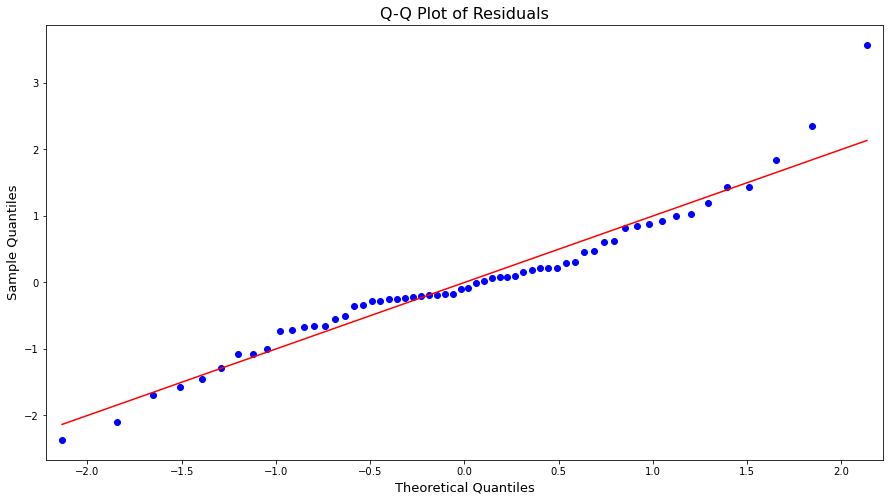

In [188]:
#QQ Plot Test - check the Normal distribution of residuals to ensure that the first asumption of ANOVA is satisfied. 
#As the plot is fairly linear along the diagonal, the assumption is considered satisfied.
res = model.resid
fig = qqplot(res, line='s', fit=True)
ax = plt.gca()
fig.set_size_inches(15,8)
ax.set_xlabel("Theoretical Quantiles", fontsize=13)
ax.set_ylabel("Sample Quantiles", fontsize=13)
ax.set_title("Q-Q Plot of Residuals", fontsize=16)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "OM_residuals.png")
plt.show()

#### Homogeneity Check

In [189]:
#A levene tests is then used to test the homoscedasticity of the groups. 
#An assumption of ANOVA is that the groups must be equal variance (homoscedatic)
#P-value more than 0.05 means groups are homoscedastic and assumption was satisfied
levene_test = levene(zero_df.OM, thirty_df.OM, sixty_df.OM, ninety_df.OM, onetwenty_df.OM)
levene_test

LeveneResult(statistic=1.4871080297499204, pvalue=0.21868380136154286)

#### Summary of ANOVA results of the Organic Matter Content 

In [190]:
#Two-way ANOVA was then completed using the statsmodels library. 
#The threshold was then adjusted using a Bonferroni correction (P-value/number of tests). 
#P-value was below this threshold, meaning the null hypothesis should be rejected.
table = anova_lm(model) #, typ=2
table

,df,sum_sq,mean_sq,F,PR(>F)
C(sediments),4.0,0.099217,0.024804,23.637179,1.417933e-10
C(nutrients),2.0,0.004292,0.002146,2.044917,1.412445e-01
C(sediments):C(nutrients),8.0,0.014660,0.001832,1.746269,1.137436e-01
Residual,45.0,0.047222,0.001049,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0     13  -0.0718  0.001 -0.1117 -0.0318   True
     0     35  -0.0893  0.001 -0.1293 -0.0494   True
     0     50  -0.1124  0.001 -0.1523 -0.0725   True
     0     75  -0.1072  0.001 -0.1471 -0.0672   True
    13     35  -0.0175 0.7038 -0.0575  0.0224  False
    13     50  -0.0406 0.0443 -0.0806 -0.0007   True
    13     75  -0.0354 0.1055 -0.0753  0.0045  False
    35     50  -0.0231 0.4853  -0.063  0.0168  False
    35     75  -0.0179 0.6918 -0.0578  0.0221  False
    50     75   0.0052    0.9 -0.0347  0.0452  False
----------------------------------------------------


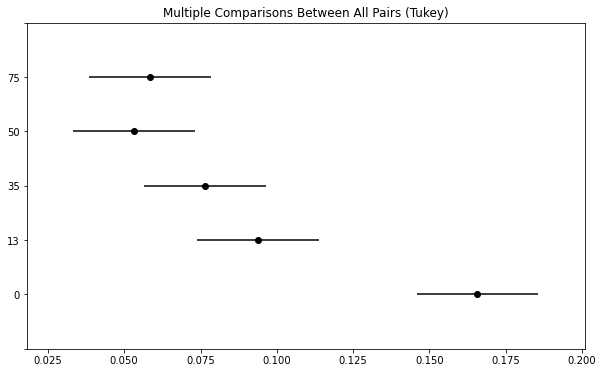

In [191]:
#To determine which groups had a significant difference from one another, a Tukey's HSD test was performed.
#The null hypothesis should be rejected for all the 'False' pairs.
mc = pairwise_tukeyhsd(df['OM'],df['sediments'])
result = mc._results_table
print(result)
_ = mc.plot_simultaneous()

## 19 - 20. Nitrate and Phosphate Analyses

Summary of $NH_4^+$ and $PO_4^+$ concentrations during the spring, summer, and late fall of the 246 d experiment.

Originally, we removed 0S1, 0S5, and 0S7 for late fall and 0S10 and 0S12 for the Spring season. In this current version, those outliers were included in the final analyses. All the analyses have a natural log transformation. In the $NH_4^+$ porewater analyses for the fall group, we changed all the negative values to zero.

In [192]:
#Reading the data
nutrients_df = pd.read_excel (r'C:\Users\molli\Dropbox\Publish\Working Graphs for Publication_2020_revised.xlsx', sheet_name='Nutrients', index_col=0) 
nutrients_df = pd.DataFrame(nutrients_df, columns= ['Plot','Time', 'PO4','NH4','sediments','nutrients'])
nutrients_df['sediments'] = nutrients_df['sediments'].astype('str')
nutrients_df['ln_PO4'] = np.log(nutrients_df['PO4'])
nutrients_df['ln_NH4'] = np.log(nutrients_df['NH4'])
#nutrients_df['sqrt_PO4'] = np.sqrt(nutrients_df['PO4'])
#nutrients_df['sqrt_NH4'] = np.sqrt(nutrients_df['NH4'])

### Phosphate levels in the spring

In [305]:
df = nutrients_df.query('Time == "5.15.17"')
df[["sediments", "PO4"]].groupby("sediments").agg(['mean', 'sem'])

PO4          
               mean       sem
sediments                    
0          0.243333  0.035512
13         1.168333  0.585825
35         0.976667  0.273242
50         1.355833  0.460394
75         5.511667  1.666752

In [194]:
df.shape

(60, 8)

In [195]:
zero_df = df.query('sediments == "0"')
thirty_df = df.query('sediments == "13"')
sixty_df = df.query('sediments == "35"')
ninety_df = df.query('sediments == "50"')
onetwenty_df = df.query('sediments == "75"')

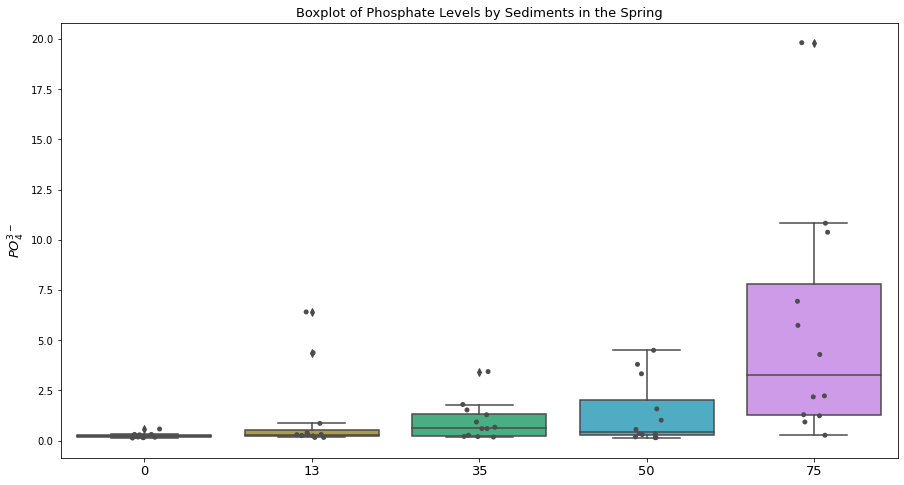

In [196]:
#I visualise the data using the seaborn library to create a boxplot of the subsidence for each sediment treatment.
#The middle line is the median.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="sediments", y="PO4", data=df, order=["0","13","35","50","75"]) 
sns.stripplot(x="sediments", y="PO4", data=df, order=["0","13","35","50","75"], jitter=0.1, color="0.3")  #
plt.title("Boxplot of Phosphate Levels by Sediments in the Spring", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2,3,4],["0","13","35","50","75"], fontsize=13)  #
plt.ylabel("$PO_4^{3-}$", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "PO4_boxplot.png")
plt.show()

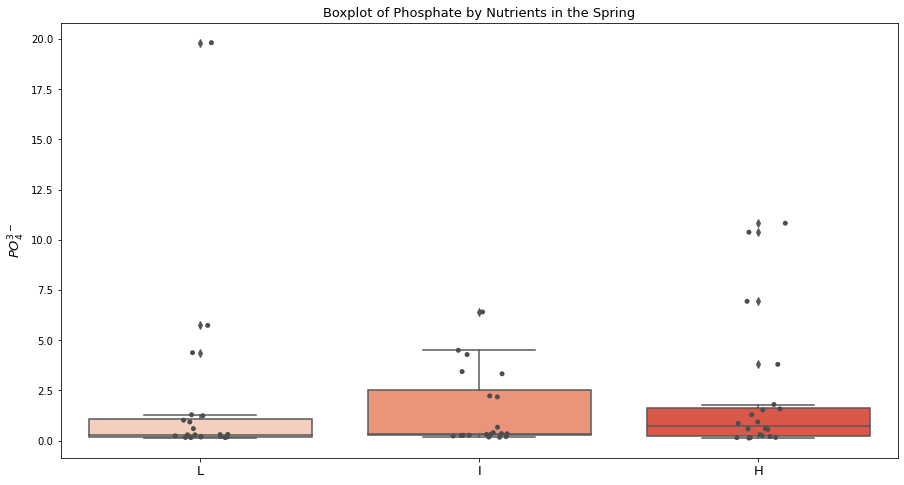

In [197]:
#I repeat this for each nutrient treatment.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="nutrients", y="PO4", data=df, order=["L","I","H"])  #,"90","120"
sns.stripplot(x="nutrients", y="PO4", data=df, order=["L","I","H"], jitter=0.1, color="0.3")  #,"90","120"
plt.title("Boxplot of Phosphate by Nutrients in the Spring", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2],["L","I","H"], fontsize=13)  #,"90","120"
plt.ylabel("$PO_4^{3-}$", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "PO4_boxplot.png")
plt.show()

#### Normality Assumption Check for natural log of PO4

In [198]:
formula = 'ln_PO4 ~ C(sediments) *C(nutrients)'
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ln_PO4   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     3.330
Date:                Tue, 13 Oct 2020   Prob (F-statistic):            0.00108
Time:                        15:28:09   Log-Likelihood:                -81.239
No. Observations:                  60   AIC:                             192.5
Df Residuals:                      45   BIC:                             223.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -1.5107      0.541     -2.792      0.008      -2.600      -0.421
C(sediments)[T.13]                       0.3673      0.765      0.480      0.634      -1.174       1.908
C(sediments)[T.35]                       1.6181      0.765      2.115      0.040       0.077       3.159
C(sediments)[T.50]                       1.3396      0.765      1.751      0.087      -0.202       2.881
C(sediments)[T.75]                       3.2392      0.765      4.233      0.000       1.698       4.780
C(nutrients)[T.I]                       -0.0212      0.765     -0.028      0.978      -1.562       1.520
C(nutrients)[T.L]                        0.0440      0.765      0.057      0.954      -1.497       1.585
C(sediments)[T.13]:C(nutrients)[T.I]     0.7705      1.082      0.712      0.480      -1.409       2.950
C(sediments)[T.35]:C(nutrients)[T.I]    -0.6071      1.082     -0.561      0.578      -2.787       1.572
C(sediments)[T.50]:C(nutrients)[T.I]     0.3370      1.082      0.311      0.757      -1.842       2.516
C(sediments)[T.75]:C(nutrients)[T.I]    -1.2752      1.082     -1.179      0.245      -3.455       0.904
C(sediments)[T.13]:C(nutrients)[T.L]     0.3443      1.082      0.318      0.752      -1.835       2.524
C(sediments)[T.35]:C(nutrients)[T.L]    -1.0343      1.082     -0.956      0.344      -3.214       1.145
C(sediments)[T.50]:C(nutrients)[T.L]    -1.0583      1.082     -0.978      0.333      -3.238       1.121
C(sediments)[T.75]:C(nutrients)[T.L]    -0.5533      1.082     -0.511      0.612      -2.733       1.626
==============================================================================
Omnibus:                        2.027   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.363   Jarque-Bera (JB):                1.975
Skew:                           0.415   Prob(JB):                        0.373
Kurtosis:                       2.683   Cond. No.                         21.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [199]:
w, pvalue = stats.shapiro(model.resid)
print("Shapiro: w", w, "pvalue", pvalue)
#If the p-value is >0.05 for all groups, we can conclude that residuals follow the Gaussian Distribution. This does not meet the Gaussian Distribution.

Shapiro: w 0.9779216051101685 pvalue 0.347082257270813


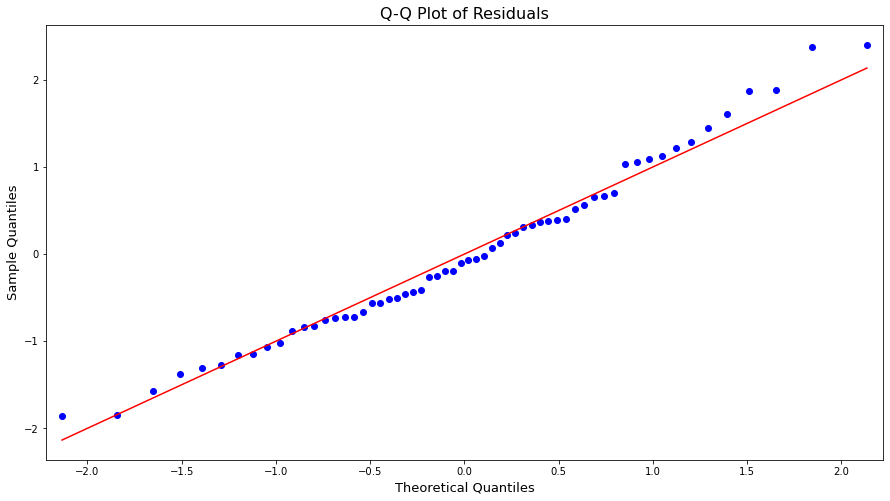

In [200]:
#QQ Plot Test - check the Normal distribution of residuals to ensure that the first asumption of ANOVA is satisfied. 
#As the plot is fairly linear along the diagonal, the assumption is considered satisfied.
res = model.resid
fig = qqplot(res, line='s', fit=True)
ax = plt.gca()
fig.set_size_inches(15,8)
ax.set_xlabel("Theoretical Quantiles", fontsize=13)
ax.set_ylabel("Sample Quantiles", fontsize=13)
ax.set_title("Q-Q Plot of Residuals", fontsize=16)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "ln_PO4_residuals.png")
plt.show()

#### Homogeneity Check

In [201]:
#A levene tests is then used to test the homoscedasticity of the groups. 
#An assumption of ANOVA is that the groups must be equal variance (homoscedatic)
#P-value more than 0.05 means groups are homoscedastic and assumption was satisfied
levene_test = levene(zero_df.ln_PO4, thirty_df.ln_PO4, sixty_df.ln_PO4, ninety_df.ln_PO4, onetwenty_df.ln_PO4)
levene_test

LeveneResult(statistic=2.1848696547735633, pvalue=0.0826632425749857)

#### Summary of ANOVA results for natural log of Phosphate

In [202]:
#Two-way ANOVA was then completed using the statsmodels library. 
#The threshold was then adjusted using a Bonferroni correction (P-value/number of tests). 
#P-value was below this threshold, meaning the null hypothesis should be rejected.
table = anova_lm(model)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(sediments),4.0,44.171055,11.042764,9.431108,0.000013
C(nutrients),2.0,1.747186,0.873593,0.746095,0.479989
C(sediments):C(nutrients),8.0,8.670546,1.083818,0.925639,0.504780
Residual,45.0,52.689925,1.170887,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0     13   0.7389 0.4502 -0.4945 1.9722  False
     0     35    1.071  0.118 -0.1624 2.3043  False
     0     50   1.0991 0.1025 -0.1343 2.3324  False
     0     75   2.6297  0.001  1.3963 3.8631   True
    13     35   0.3321    0.9 -0.9013 1.5655  False
    13     50   0.3602    0.9 -0.8731 1.5936  False
    13     75   1.8908  0.001  0.6575 3.1242   True
    35     50   0.0281    0.9 -1.2052 1.2615  False
    35     75   1.5587 0.0066  0.3254 2.7921   True
    50     75   1.5306  0.008  0.2972  2.764   True
---------------------------------------------------


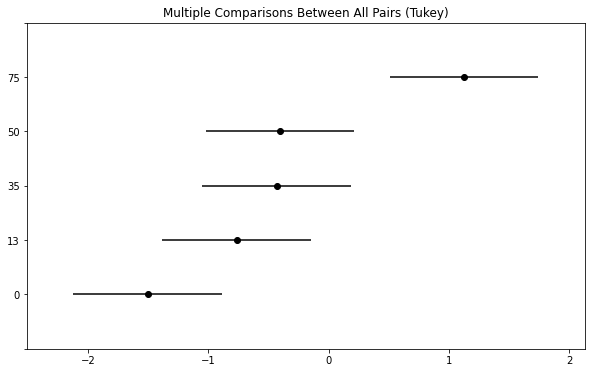

In [203]:
#To determine which groups had a significant difference from one another, a Tukey's HSD test was performed.
#The null hypothesis should be rejected for all the 'False' pairs.
mc = pairwise_tukeyhsd(df['ln_PO4'],df['sediments'])
result = mc._results_table
print(result)
_ = mc.plot_simultaneous()

### Nitrate Levels for the spring

In [ ]:
df[["sediments", "NH4"]].groupby("sediments").agg(['mean', 'sem'])

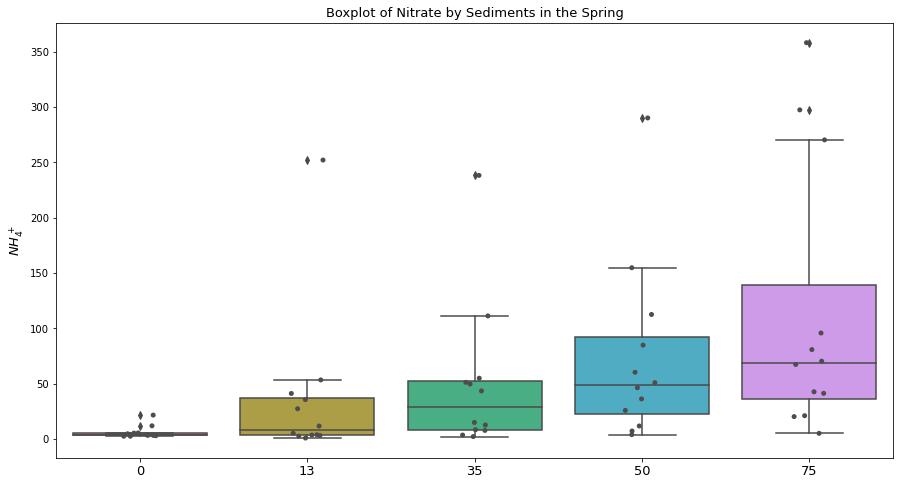

In [204]:
#I visualise the data using the seaborn library to create a boxplot of the subsidence for each sediment treatment.
#The middle line is the median.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="sediments", y="NH4", data=df, order=["0","13","35","50","75"]) 
sns.stripplot(x="sediments", y="NH4", data=df, order=["0","13","35","50","75"], jitter=0.1, color="0.3")  #
plt.title("Boxplot of Nitrate by Sediments in the Spring", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2,3,4],["0","13","35","50","75"], fontsize=13)  #
plt.ylabel("$NH_4^+$", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "NH4_boxplot.png")
plt.show()

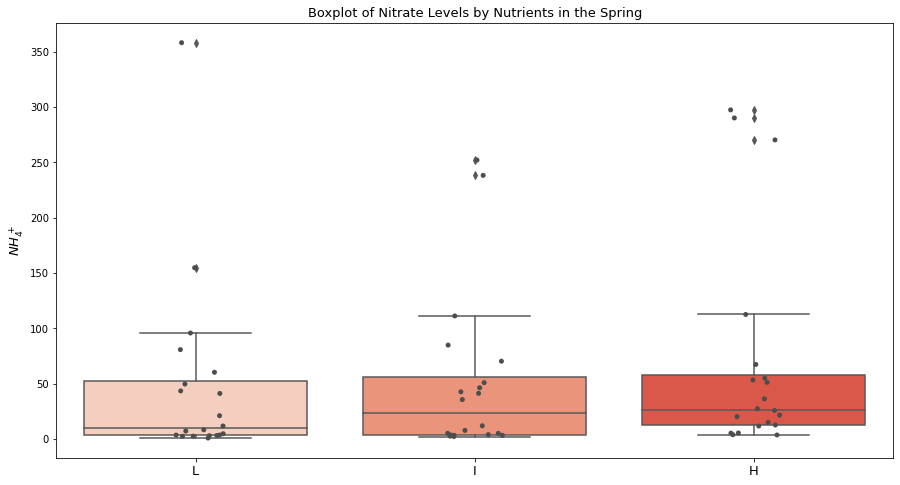

In [205]:
#I repeat this for each nutrient treatment.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="nutrients", y="NH4", data=df, order=["L","I","H"])  #,"90","120"
sns.stripplot(x="nutrients", y="NH4", data=df, order=["L","I","H"], jitter=0.1, color="0.3")  #,"90","120"
plt.title("Boxplot of Nitrate Levels by Nutrients in the Spring", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2],["L","I","H"], fontsize=13)  #,"90","120"
plt.ylabel("$NH_4^+$", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "NH4_boxplot.png")
plt.show()

#### Normality Assumption Check for natural log of Nitrates

In [206]:
formula = 'ln_NH4 ~ C(sediments) *C(nutrients)'
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ln_NH4   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     2.692
Date:                Tue, 13 Oct 2020   Prob (F-statistic):            0.00601
Time:                        15:28:12   Log-Likelihood:                -92.548
No. Observations:                  60   AIC:                             215.1
Df Residuals:                      45   BIC:                             246.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                1.9398      0.653      2.969      0.005       0.624       3.256
C(sediments)[T.13]                       0.8381      0.924      0.907      0.369      -1.023       2.699
C(sediments)[T.35]                       1.3578      0.924      1.470      0.149      -0.503       3.218
C(sediments)[T.50]                       2.3696      0.924      2.565      0.014       0.509       4.230
C(sediments)[T.75]                       2.6889      0.924      2.910      0.006       0.828       4.550
C(nutrients)[T.I]                       -0.3776      0.924     -0.409      0.685      -2.238       1.483
C(nutrients)[T.L]                       -0.8044      0.924     -0.871      0.389      -2.665       1.056
C(sediments)[T.13]:C(nutrients)[T.I]     0.5300      1.307      0.406      0.687      -2.102       3.161
C(sediments)[T.35]:C(nutrients)[T.I]     0.3396      1.307      0.260      0.796      -2.292       2.971
C(sediments)[T.50]:C(nutrients)[T.I]    -0.5333      1.307     -0.408      0.685      -3.165       2.098
C(sediments)[T.75]:C(nutrients)[T.I]    -0.9089      1.307     -0.696      0.490      -3.540       1.723
C(sediments)[T.13]:C(nutrients)[T.L]    -0.4538      1.307     -0.347      0.730      -3.085       2.178
C(sediments)[T.35]:C(nutrients)[T.L]     0.2793      1.307      0.214      0.832      -2.352       2.911
C(sediments)[T.50]:C(nutrients)[T.L]    -0.1068      1.307     -0.082      0.935      -2.738       2.525
C(sediments)[T.75]:C(nutrients)[T.L]     0.6469      1.307      0.495      0.623      -1.985       3.278
==============================================================================
Omnibus:                        0.837   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.658   Jarque-Bera (JB):                0.815
Skew:                           0.010   Prob(JB):                        0.665
Kurtosis:                       2.429   Cond. No.                         21.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [207]:
w, pvalue = stats.shapiro(model.resid)
print("Shapiro: w", w, "pvalue", pvalue)
#If the p-value is >0.05 for all groups, we can conclude that residuals follow the Gaussian Distribution. This does not meet the Gaussian Distribution.

Shapiro: w 0.9858803749084473 pvalue 0.7157823443412781


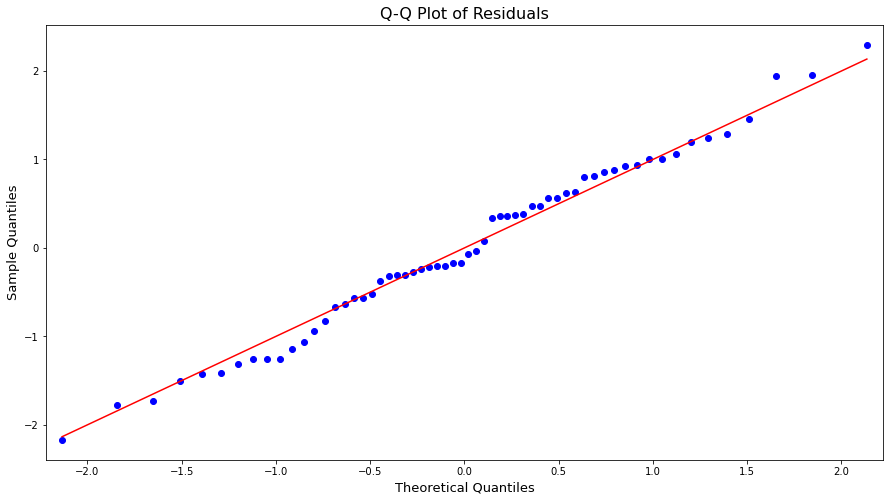

In [208]:
#QQ Plot Test - check the Normal distribution of residuals to ensure that the first asumption of ANOVA is satisfied. 
#As the plot is fairly linear along the diagonal, the assumption is considered satisfied.
res = model.resid
fig = qqplot(res, line='s', fit=True)
ax = plt.gca()
fig.set_size_inches(15,8)
ax.set_xlabel("Theoretical Quantiles", fontsize=13)
ax.set_ylabel("Sample Quantiles", fontsize=13)
ax.set_title("Q-Q Plot of Residuals", fontsize=16)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "ln_NH4_residuals.png")
plt.show()

#### Homogeneity Check

In [209]:
#A levene tests is then used to test the homoscedasticity of the groups. 
#An assumption of ANOVA is that the groups must be equal variance (homoscedatic)
#P-value more than 0.05 means groups are homoscedastic and assumption was satisfied
levene_test = levene(zero_df.ln_NH4, thirty_df.ln_NH4, sixty_df.ln_NH4, ninety_df.ln_NH4, onetwenty_df.ln_NH4)
levene_test

LeveneResult(statistic=2.678698831620766, pvalue=0.04105107657996584)

#### Summary of ANOVA results for nitrate levels in the spring

In [210]:
#Two-way ANOVA was then completed using the statsmodels library. 
#The threshold was then adjusted using a Bonferroni correction (P-value/number of tests). 
#P-value was below this threshold, meaning the null hypothesis should be rejected.
table = anova_lm(model)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(sediments),4.0,51.400449,12.850112,7.527865,0.000099
C(nutrients),2.0,5.561397,2.780699,1.628992,0.207480
C(sediments):C(nutrients),8.0,7.367896,0.920987,0.539533,0.820382
Residual,45.0,76.815275,1.707006,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0     13   0.8635 0.4703 -0.6073 2.3343  False
     0     35    1.564 0.0318  0.0932 3.0348   True
     0     50   2.1562 0.0011  0.6854  3.627   True
     0     75   2.6015  0.001  1.1307 4.0723   True
    13     35   0.7005 0.6459 -0.7703 2.1713  False
    13     50   1.2927 0.1106 -0.1781 2.7635  False
    13     75    1.738 0.0129  0.2672 3.2088   True
    35     50   0.5921 0.7616 -0.8787 2.0629  False
    35     75   1.0375 0.2848 -0.4333 2.5083  False
    50     75   0.4453    0.9 -1.0255 1.9161  False
---------------------------------------------------


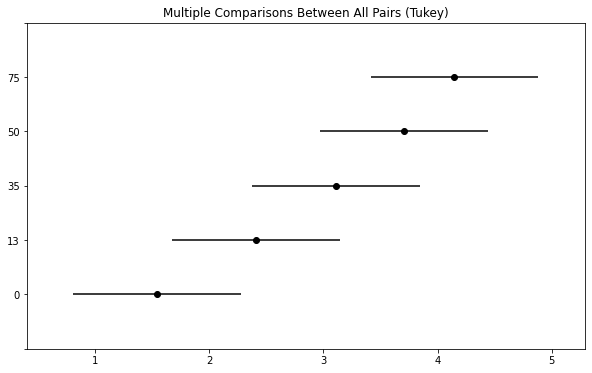

In [211]:
#To determine which groups had a significant difference from one another, a Tukey's HSD test was performed.
#The null hypothesis should be rejected for all the 'False' pairs.
mc = pairwise_tukeyhsd(df['ln_NH4'],df['sediments'])
result = mc._results_table
print(result)
_ = mc.plot_simultaneous()

### Phosphate Levels for summer

In [212]:
df = nutrients_df.query('Time == "7.17.17"')
df[["sediments", "PO4"]].groupby("sediments").agg(['mean', 'sem'])

PO4          
               mean       sem
sediments                    
0          1.606667  0.873381
13         0.949167  0.545385
35         4.325833  2.729844
50         2.555833  1.282662
75         9.175833  2.151977

In [213]:
df.shape

(60, 8)

In [214]:
zero_df = df.query('sediments == "0"')
thirty_df = df.query('sediments == "13"')
sixty_df = df.query('sediments == "35"')
ninety_df = df.query('sediments == "50"')
onetwenty_df = df.query('sediments == "75"')

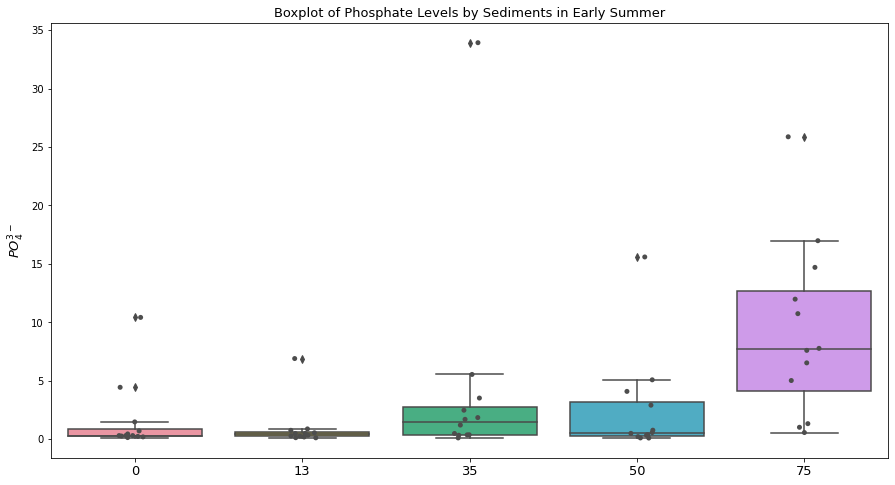

In [215]:
#I visualise the data using the seaborn library to create a boxplot of the subsidence for each sediment treatment.
#The middle line is the median.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="sediments", y="PO4", data=df, order=["0","13","35","50","75"]) 
sns.stripplot(x="sediments", y="PO4", data=df, order=["0","13","35","50","75"], jitter=0.1, color="0.3")  #
plt.title("Boxplot of Phosphate Levels by Sediments in Summer", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2,3,4],["0","13","35","50","75"], fontsize=13)  #
plt.ylabel("$PO_4^{3-}$", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "PO4_boxplot.png")
plt.show()

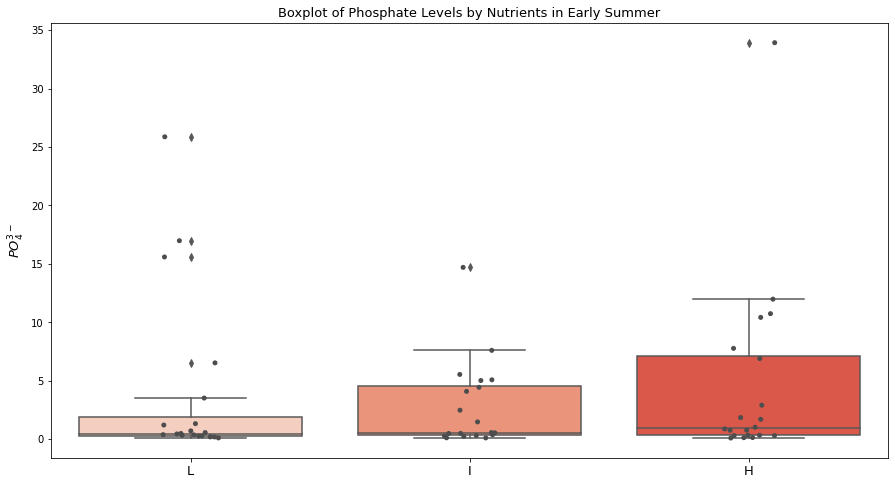

In [216]:
#I repeat this for each nutrient treatment.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="nutrients", y="PO4", data=df, order=["L","I","H"])  #,"90","120"
sns.stripplot(x="nutrients", y="PO4", data=df, order=["L","I","H"], jitter=0.1, color="0.3")  #,"90","120"
plt.title("Boxplot of Phosphate Levels by Nutrients in Summer", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2],["L","I","H"], fontsize=13)  #,"90","120"
plt.ylabel("$PO_4^{3-}$", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "PO4_boxplot.png")
plt.show()

#### Normality Assumption Check for natural log of Phosphate Levels

In [217]:
formula = 'ln_PO4 ~ C(sediments) *C(nutrients)'
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ln_PO4   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     2.068
Date:                Tue, 13 Oct 2020   Prob (F-statistic):             0.0333
Time:                        15:28:15   Log-Likelihood:                -98.111
No. Observations:                  60   AIC:                             226.2
Df Residuals:                      45   BIC:                             257.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -0.4912      0.717     -0.685      0.497      -1.935       0.952
C(sediments)[T.13]                       0.3634      1.014      0.359      0.722      -1.678       2.405
C(sediments)[T.35]                       1.3889      1.014      1.370      0.177      -0.653       3.430
C(sediments)[T.50]                      -0.1525      1.014     -0.150      0.881      -2.194       1.889
C(sediments)[T.75]                       2.2230      1.014      2.193      0.034       0.182       4.265
C(nutrients)[T.I]                        0.3123      1.014      0.308      0.759      -1.729       2.354
C(nutrients)[T.L]                       -0.5238      1.014     -0.517      0.608      -2.565       1.518
C(sediments)[T.13]:C(nutrients)[T.I]    -1.3792      1.433     -0.962      0.341      -4.266       1.508
C(sediments)[T.35]:C(nutrients)[T.I]    -0.9752      1.433     -0.680      0.500      -3.862       1.912
C(sediments)[T.50]:C(nutrients)[T.I]     0.3647      1.433      0.254      0.800      -2.522       3.252
C(sediments)[T.75]:C(nutrients)[T.I]    -0.6023      1.433     -0.420      0.676      -3.489       2.285
C(sediments)[T.13]:C(nutrients)[T.L]    -0.5300      1.433     -0.370      0.713      -3.417       2.357
C(sediments)[T.35]:C(nutrients)[T.L]    -0.8121      1.433     -0.567      0.574      -3.699       2.075
C(sediments)[T.50]:C(nutrients)[T.L]     1.0996      1.433      0.767      0.447      -1.788       3.987
C(sediments)[T.75]:C(nutrients)[T.L]     0.8536      1.433      0.595      0.554      -2.034       3.741
==============================================================================
Omnibus:                        1.332   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.514   Jarque-Bera (JB):                1.355
Skew:                           0.289   Prob(JB):                        0.508
Kurtosis:                       2.543   Cond. No.                         21.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [218]:
w, pvalue = stats.shapiro(model.resid)
print("Shapiro: w", w, "pvalue", pvalue)
#If the p-value is >0.05 for all groups, we can conclude that residuals follow the Gaussian Distribution. This does not meet the Gaussian Distribution.

Shapiro: w 0.9769701361656189 pvalue 0.31413930654525757


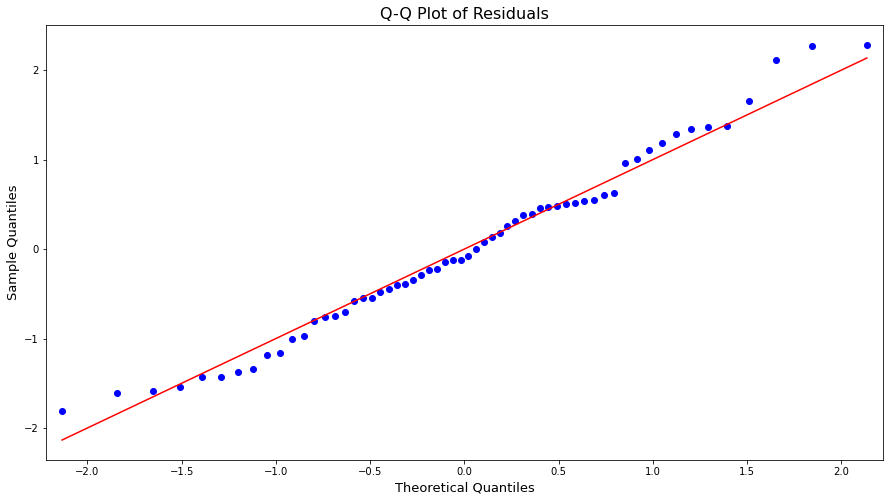

In [219]:
#QQ Plot Test - check the Normal distribution of residuals to ensure that the first asumption of ANOVA is satisfied. 
#As the plot is fairly linear along the diagonal, the assumption is considered satisfied.
res = model.resid
fig = qqplot(res, line='s', fit=True)
ax = plt.gca()
fig.set_size_inches(15,8)
ax.set_xlabel("Theoretical Quantiles", fontsize=13)
ax.set_ylabel("Sample Quantiles", fontsize=13)
ax.set_title("Q-Q Plot of Residuals", fontsize=16)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "ln_PO4_residuals.png")
plt.show()

#### Homogeneity Check

In [220]:
#A levene tests is then used to test the homoscedasticity of the groups. 
#An assumption of ANOVA is that the groups must be equal variance (homoscedatic)
#P-value more than 0.05 means groups are homoscedastic and assumption was satisfied
levene_test = levene(zero_df.ln_PO4, thirty_df.ln_PO4, sixty_df.ln_PO4, ninety_df.ln_PO4, onetwenty_df.ln_PO4)
levene_test

LeveneResult(statistic=0.6065185742620245, pvalue=0.6596088075956168)

#### Summary of ANOVA results for phosphates in summer

In [221]:
#Two-way ANOVA was then completed using the statsmodels library. 
#The threshold was then adjusted using a Bonferroni correction (P-value/number of tests). 
#P-value was below this threshold, meaning the null hypothesis should be rejected.
table = anova_lm(model)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(sediments),4.0,49.644461,12.411115,6.040079,0.000560
C(nutrients),2.0,1.612627,0.806313,0.392406,0.677718
C(sediments):C(nutrients),8.0,8.218973,1.027372,0.499988,0.849722
Residual,45.0,92.465706,2.054793,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0     13  -0.2729    0.9 -1.8432 1.2974  False
     0     35   0.7932 0.6007 -0.7771 2.3635  False
     0     50   0.3356    0.9 -1.2347 1.9059  False
     0     75   2.3068 0.0011  0.7365 3.8771   True
    13     35   1.0661 0.3218 -0.5042 2.6364  False
    13     50   0.6086 0.7853 -0.9617 2.1789  False
    13     75   2.5797  0.001  1.0094   4.15   True
    35     50  -0.4575    0.9 -2.0278 1.1128  False
    35     75   1.5136 0.0641 -0.0567 3.0839  False
    50     75   1.9711 0.0071  0.4008 3.5414   True
---------------------------------------------------


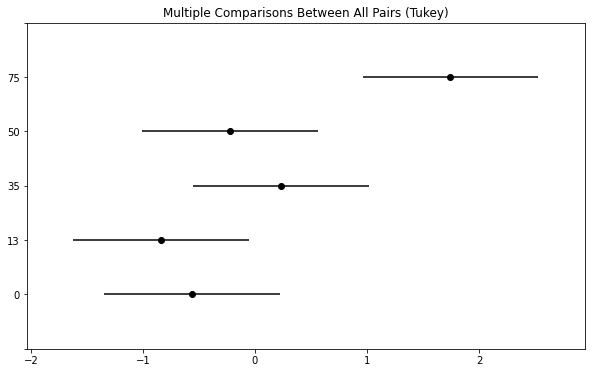

In [222]:
#To determine which groups had a significant difference from one another, a Tukey's HSD test was performed.
#The null hypothesis should be rejected for all the 'False' pairs.
mc = pairwise_tukeyhsd(df['ln_PO4'],df['sediments'])
result = mc._results_table
print(result)
_ = mc.plot_simultaneous()

### Nitrate Levels for the summer

In [ ]:
df[["sediments", "NH4"]].groupby("sediments").agg(['mean', 'sem'])

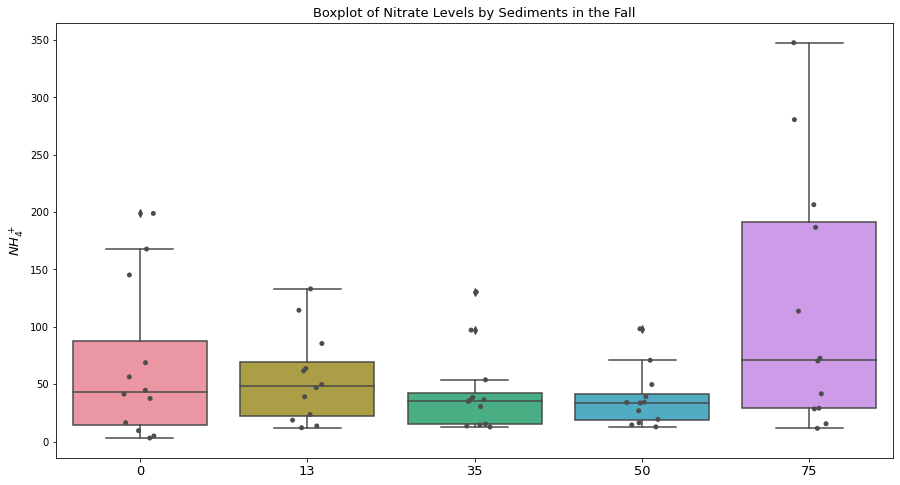

In [223]:
#I visualise the data using the seaborn library to create a boxplot of the subsidence for each sediment treatment.
#The middle line is the median.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="sediments", y="NH4", data=df, order=["0","13","35","50","75"]) 
sns.stripplot(x="sediments", y="NH4", data=df, order=["0","13","35","50","75"], jitter=0.1, color="0.3")  #
plt.title("Boxplot of Nitrate Levels by Sediments in the Fall", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2,3,4],["0","13","35","50","75"], fontsize=13)  #
plt.ylabel("$NH_4^+$", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "NH4_boxplot.png")
plt.show()

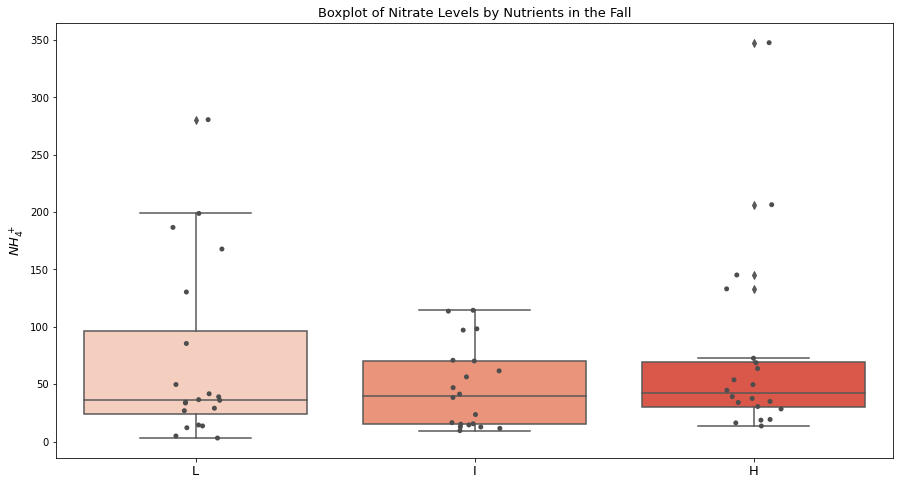

In [224]:
#I repeat this for each nutrient treatment.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="nutrients", y="NH4", data=df, order=["L","I","H"])  #,"90","120"
sns.stripplot(x="nutrients", y="NH4", data=df, order=["L","I","H"], jitter=0.1, color="0.3")  #,"90","120"
plt.title("Boxplot of Nitrate Levels by Nutrients in the Fall", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2],["L","I","H"], fontsize=13)  #,"90","120"
plt.ylabel("$NH_4^+$", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "NH4_boxplot.png")
plt.show()

#### Normality Assumption Check for natural log of Nitrates

In [225]:
formula = 'ln_NH4 ~ C(sediments) *C(nutrients)'
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ln_NH4   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                    0.8692
Date:                Tue, 13 Oct 2020   Prob (F-statistic):              0.595
Time:                        15:28:17   Log-Likelihood:                -76.820
No. Observations:                  60   AIC:                             183.6
Df Residuals:                      45   BIC:                             215.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                4.1578      0.503      8.272      0.000       3.146       5.170
C(sediments)[T.13]                      -0.1901      0.711     -0.267      0.790      -1.622       1.242
C(sediments)[T.35]                      -0.7682      0.711     -1.081      0.286      -2.200       0.663
C(sediments)[T.50]                      -0.9237      0.711     -1.299      0.200      -2.355       0.508
C(sediments)[T.75]                       0.5449      0.711      0.767      0.447      -0.887       1.977
C(nutrients)[T.I]                       -0.9580      0.711     -1.348      0.184      -2.390       0.474
C(nutrients)[T.L]                       -0.8844      0.711     -1.244      0.220      -2.316       0.547
C(sediments)[T.13]:C(nutrients)[T.I]     0.9567      1.005      0.952      0.346      -1.068       2.981
C(sediments)[T.35]:C(nutrients)[T.I]     0.9381      1.005      0.933      0.356      -1.087       2.963
C(sediments)[T.50]:C(nutrients)[T.I]     1.2397      1.005      1.233      0.224      -0.785       3.264
C(sediments)[T.75]:C(nutrients)[T.I]    -0.2043      1.005     -0.203      0.840      -2.229       1.820
C(sediments)[T.13]:C(nutrients)[T.L]     0.2174      1.005      0.216      0.830      -1.807       2.242
C(sediments)[T.35]:C(nutrients)[T.L]     1.1731      1.005      1.167      0.249      -0.852       3.198
C(sediments)[T.50]:C(nutrients)[T.L]     1.2110      1.005      1.205      0.235      -0.814       3.236
C(sediments)[T.75]:C(nutrients)[T.L]     0.6720      1.005      0.668      0.507      -1.353       2.697
==============================================================================
Omnibus:                        0.275   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.871   Jarque-Bera (JB):                0.463
Skew:                           0.019   Prob(JB):                        0.793
Kurtosis:                       2.571   Cond. No.                         21.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [226]:
w, pvalue = stats.shapiro(model.resid)
print("Shapiro: w", w, "pvalue", pvalue)
#If the p-value is >0.05 for all groups, we can conclude that residuals follow the Gaussian Distribution. This does not meet the Gaussian Distribution.

Shapiro: w 0.9859709143638611 pvalue 0.7204650044441223


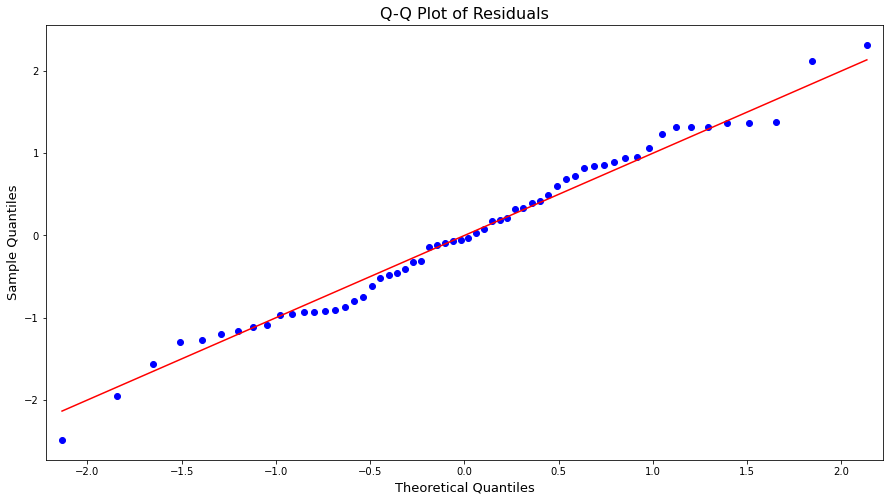

In [227]:
#QQ Plot Test - check the Normal distribution of residuals to ensure that the first asumption of ANOVA is satisfied. 
#As the plot is fairly linear along the diagonal, the assumption is considered satisfied.
res = model.resid
fig = qqplot(res, line='s', fit=True)
ax = plt.gca()
fig.set_size_inches(15,8)
ax.set_xlabel("Theoretical Quantiles", fontsize=13)
ax.set_ylabel("Sample Quantiles", fontsize=13)
ax.set_title("Q-Q Plot of Residuals", fontsize=16)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "ln_NH4_residuals.png")
plt.show()

#### Homogeneity Check

In [228]:
#A levene tests is then used to test the homoscedasticity of the groups. 
#An assumption of ANOVA is that the groups must be equal variance (homoscedatic)
#P-value more than 0.05 means groups are homoscedastic and assumption was satisfied
levene_test = levene(zero_df.ln_NH4, thirty_df.ln_NH4, sixty_df.ln_NH4, ninety_df.ln_NH4, onetwenty_df.ln_NH4)
levene_test

LeveneResult(statistic=2.039957709417245, pvalue=0.10142099040809853)

#### Summary of ANOVA results for nitrates in summer

In [229]:
#Two-way ANOVA was then completed using the statsmodels library. 
#The threshold was then adjusted using a Bonferroni correction (P-value/number of tests). 
#P-value was below this threshold, meaning the null hypothesis should be rejected.
table = anova_lm(model)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(sediments),4.0,5.284994,1.321248,1.307467,0.281663
C(nutrients),2.0,1.409198,0.704599,0.697250,0.503252
C(sediments):C(nutrients),8.0,5.602289,0.700286,0.692982,0.695589
Residual,45.0,45.474308,1.010540,NaN,NaN


### Phosphate Levels for summer

In [230]:
df = nutrients_df.query('Time == "8.18.17"')
df[["sediments", "PO4"]].groupby("sediments").agg(['mean', 'sem'])

PO4          
               mean       sem
sediments                    
0          1.828333  0.818972
13         1.426667  0.533805
35         3.340833  1.191752
50         1.514167  0.341071
75         6.468333  1.301129

In [231]:
df.shape

(60, 8)

In [232]:
zero_df = df.query('sediments == "0"')
thirty_df = df.query('sediments == "13"')
sixty_df = df.query('sediments == "35"')
ninety_df = df.query('sediments == "50"')
onetwenty_df = df.query('sediments == "75"')

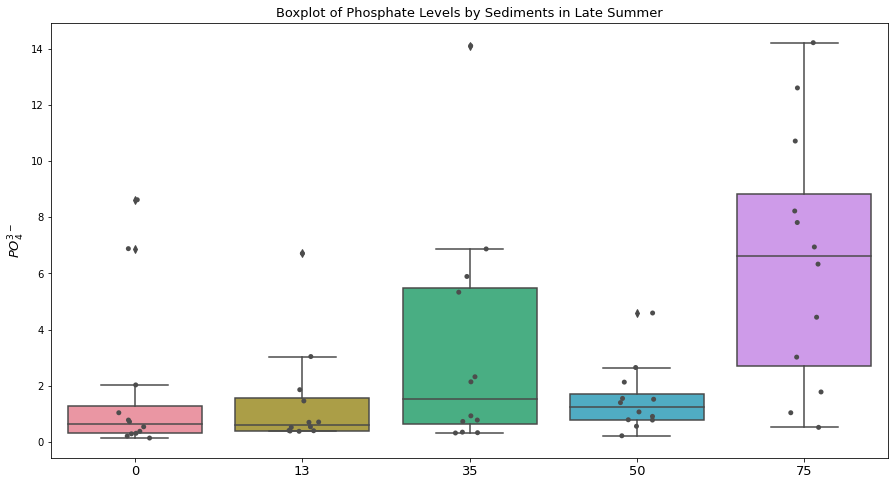

In [233]:
#I visualise the data using the seaborn library to create a boxplot of the subsidence for each sediment treatment.
#The middle line is the median.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="sediments", y="PO4", data=df, order=["0","13","35","50","75"]) 
sns.stripplot(x="sediments", y="PO4", data=df, order=["0","13","35","50","75"], jitter=0.1, color="0.3")  #
plt.title("Boxplot of Phosphate Levels by Sediments in Summer", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2,3,4],["0","13","35","50","75"], fontsize=13)  #
plt.ylabel("$PO_4^{3-}$", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "PO4_boxplot.png")
plt.show()

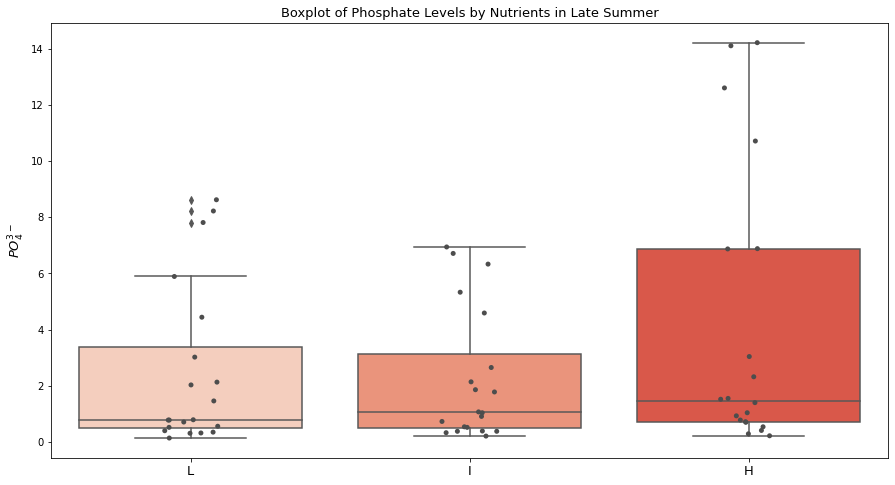

In [234]:
#I repeat this for each nutrient treatment.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="nutrients", y="PO4", data=df, order=["L","I","H"])  #,"90","120"
sns.stripplot(x="nutrients", y="PO4", data=df, order=["L","I","H"], jitter=0.1, color="0.3")  #,"90","120"
plt.title("Boxplot of Phosphate Levels by Nutrients in Summer", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2],["L","I","H"], fontsize=13)  #,"90","120"
plt.ylabel("$PO_4^{3-}$", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "PO4_boxplot.png")
plt.show()

#### Summary of ANOVA results for the Phosphates in summer

In [235]:
formula = 'ln_PO4 ~ C(sediments) *C(nutrients)'
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ln_PO4   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     1.989
Date:                Tue, 13 Oct 2020   Prob (F-statistic):             0.0413
Time:                        15:28:20   Log-Likelihood:                -82.944
No. Observations:                  60   AIC:                             195.9
Df Residuals:                      45   BIC:                             227.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                0.0284      0.557      0.051      0.959      -1.093       1.150
C(sediments)[T.13]                      -0.2166      0.787     -0.275      0.784      -1.802       1.369
C(sediments)[T.35]                       1.3071      0.787      1.660      0.104      -0.278       2.893
C(sediments)[T.50]                      -0.1086      0.787     -0.138      0.891      -1.694       1.477
C(sediments)[T.75]                       1.8711      0.787      2.377      0.022       0.286       3.457
C(nutrients)[T.I]                       -0.8047      0.787     -1.022      0.312      -2.390       0.781
C(nutrients)[T.L]                       -0.0972      0.787     -0.124      0.902      -1.683       1.488
C(sediments)[T.13]:C(nutrients)[T.I]     1.1466      1.113      1.030      0.309      -1.096       3.389
C(sediments)[T.35]:C(nutrients)[T.I]    -0.2781      1.113     -0.250      0.804      -2.520       1.964
C(sediments)[T.50]:C(nutrients)[T.I]     1.5029      1.113      1.350      0.184      -0.739       3.745
C(sediments)[T.75]:C(nutrients)[T.I]    -0.1684      1.113     -0.151      0.880      -2.411       2.074
C(sediments)[T.13]:C(nutrients)[T.L]    -0.0982      1.113     -0.088      0.930      -2.340       2.144
C(sediments)[T.35]:C(nutrients)[T.L]    -1.4045      1.113     -1.262      0.214      -3.647       0.838
C(sediments)[T.50]:C(nutrients)[T.L]     0.1004      1.113      0.090      0.929      -2.142       2.343
C(sediments)[T.75]:C(nutrients)[T.L]    -0.1128      1.113     -0.101      0.920      -2.355       2.129
==============================================================================
Omnibus:                        0.879   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.922
Skew:                           0.159   Prob(JB):                        0.631
Kurtosis:                       2.483   Cond. No.                         21.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [236]:
w, pvalue = stats.shapiro(model.resid)
print("Shapiro: w", w, "pvalue", pvalue)
#If the p-value is >0.05 for all groups, we can conclude that residuals follow the Gaussian Distribution. This does not meet the Gaussian Distribution.

Shapiro: w 0.9847390055656433 pvalue 0.6564546823501587


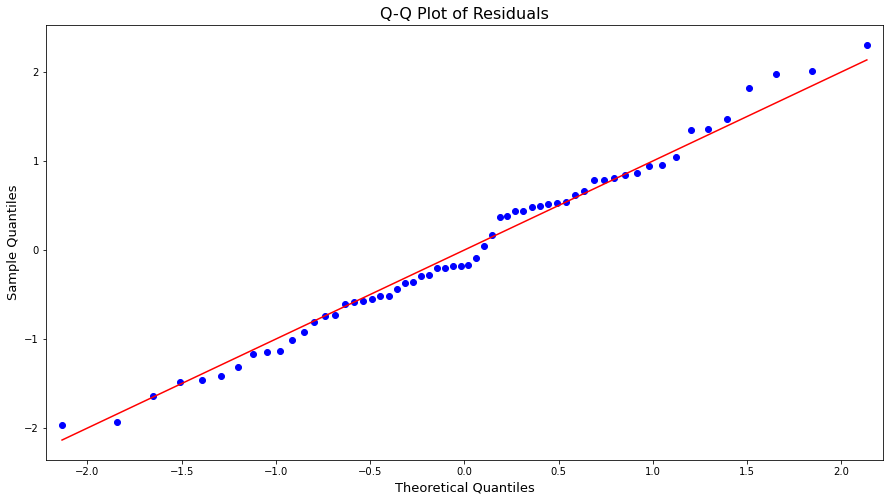

In [237]:
#QQ Plot Test - check the Normal distribution of residuals to ensure that the first asumption of ANOVA is satisfied. 
#As the plot is fairly linear along the diagonal, the assumption is considered satisfied.
res = model.resid
fig = qqplot(res, line='s', fit=True)
ax = plt.gca()
fig.set_size_inches(15,8)
ax.set_xlabel("Theoretical Quantiles", fontsize=13)
ax.set_ylabel("Sample Quantiles", fontsize=13)
ax.set_title("Q-Q Plot of Residuals", fontsize=16)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "ln_PO4_residuals.png")
plt.show()

#### Homogeneity Check

In [238]:
#A levene tests is then used to test the homoscedasticity of the groups. 
#An assumption of ANOVA is that the groups must be equal variance (homoscedatic)
#P-value more than 0.05 means groups are homoscedastic and assumption was satisfied
levene_test = levene(zero_df.ln_PO4, thirty_df.ln_PO4, sixty_df.ln_PO4, ninety_df.ln_PO4, onetwenty_df.ln_PO4)
levene_test

LeveneResult(statistic=1.2224436377722674, pvalue=0.31190787300157946)

#### Summary of ANOVA results for natural log of Phosphate

In [239]:
#Two-way ANOVA was then completed using the statsmodels library. 
#The threshold was then adjusted using a Bonferroni correction (P-value/number of tests). 
#P-value was below this threshold, meaning the null hypothesis should be rejected.
table = anova_lm(model)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(sediments),4.0,24.175758,6.043940,4.876580,0.002363
C(nutrients),2.0,1.960703,0.980351,0.791001,0.459593
C(sediments):C(nutrients),8.0,8.370588,1.046323,0.844231,0.569323
Residual,45.0,55.772139,1.239381,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0     13   0.1329    0.9 -1.1294 1.3952  False
     0     35   0.7463 0.4634  -0.516 2.0086  False
     0     50   0.4258 0.8641 -0.8365 1.6881  False
     0     75   1.7773 0.0019   0.515 3.0396   True
    13     35   0.6134 0.6308 -0.6489 1.8757  False
    13     50   0.2929    0.9 -0.9694 1.5552  False
    13     75   1.6444 0.0047  0.3821 2.9067   True
    35     50  -0.3205    0.9 -1.5828 0.9418  False
    35     75    1.031 0.1593 -0.2313 2.2933  False
    50     75   1.3515 0.0302  0.0892 2.6138   True
---------------------------------------------------


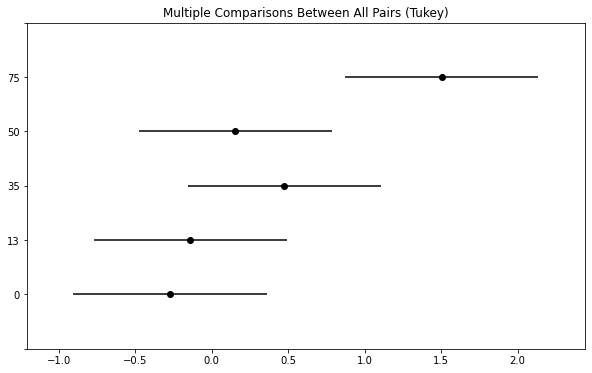

In [240]:
#To determine which groups had a significant difference from one another, a Tukey's HSD test was performed.
#The null hypothesis should be rejected for all the 'False' pairs.
mc = pairwise_tukeyhsd(df['ln_PO4'],df['sediments'])
result = mc._results_table
print(result)
_ = mc.plot_simultaneous()

### Nitrate Levels for the summer

In [ ]:
df[["sediments", "NH4"]].groupby("sediments").agg(['mean', 'sem'])

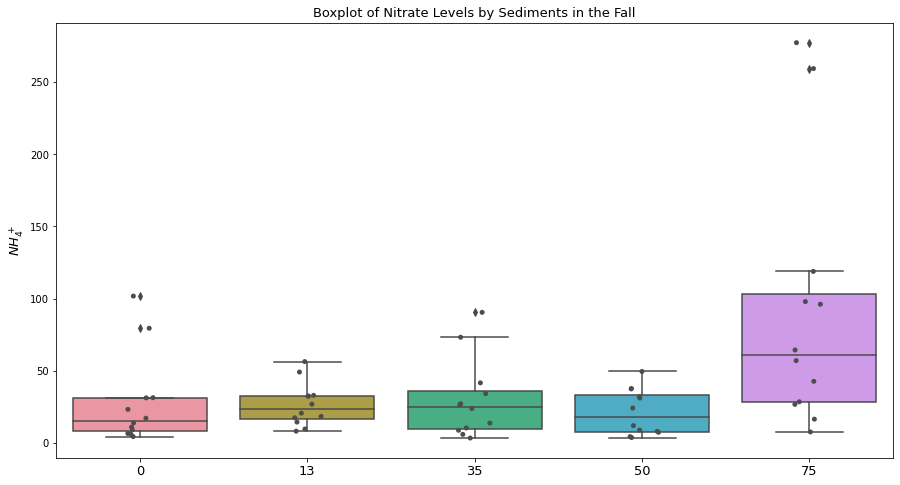

In [241]:
#I visualise the data using the seaborn library to create a boxplot of the subsidence for each sediment treatment.
#The middle line is the median.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="sediments", y="NH4", data=df, order=["0","13","35","50","75"]) 
sns.stripplot(x="sediments", y="NH4", data=df, order=["0","13","35","50","75"], jitter=0.1, color="0.3")  #
plt.title("Boxplot of Nitrate Levels by Sediments in the Fall", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2,3,4],["0","13","35","50","75"], fontsize=13)  #
plt.ylabel("$NH_4^+$", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "NH4_boxplot.png")
plt.show()

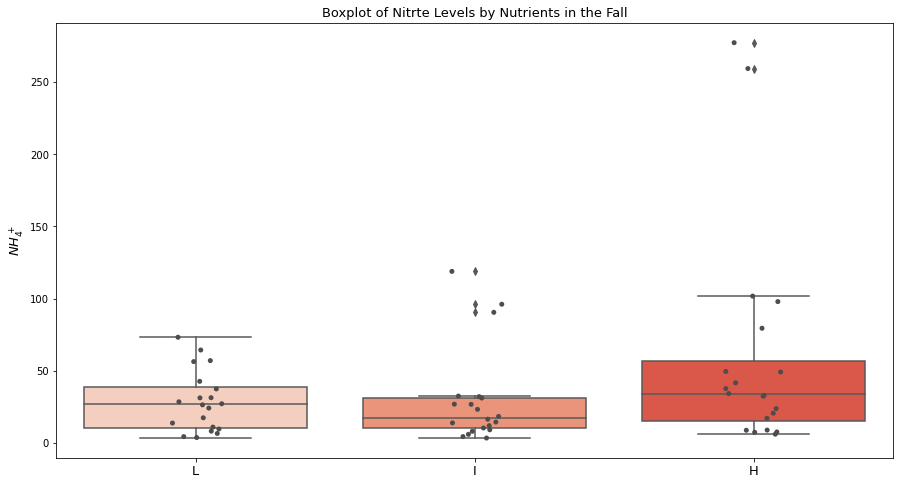

In [242]:
#I repeat this for each nutrient treatment.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="nutrients", y="NH4", data=df, order=["L","I","H"])  #,"90","120"
sns.stripplot(x="nutrients", y="NH4", data=df, order=["L","I","H"], jitter=0.1, color="0.3")  #,"90","120"
plt.title("Boxplot of Nitrte Levels by Nutrients in the Fall", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2],["L","I","H"], fontsize=13)  #,"90","120"
plt.ylabel("$NH_4^+$", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "NH4_boxplot.png")
plt.show()

#### Summary of ANOVA results for Nitrates in summer

In [243]:
formula = 'ln_NH4 ~ C(sediments) *C(nutrients)'
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ln_NH4   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     1.539
Date:                Tue, 13 Oct 2020   Prob (F-statistic):              0.136
Time:                        15:28:23   Log-Likelihood:                -73.994
No. Observations:                  60   AIC:                             178.0
Df Residuals:                      45   BIC:                             209.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                3.4037      0.480      7.098      0.000       2.438       4.369
C(sediments)[T.13]                       0.0668      0.678      0.099      0.922      -1.299       1.433
C(sediments)[T.35]                      -0.2578      0.678     -0.380      0.706      -1.624       1.108
C(sediments)[T.50]                      -0.4821      0.678     -0.711      0.481      -1.848       0.884
C(sediments)[T.75]                       1.0426      0.678      1.537      0.131      -0.323       2.408
C(nutrients)[T.I]                       -1.0491      0.678     -1.547      0.129      -2.415       0.317
C(nutrients)[T.L]                       -0.6205      0.678     -0.915      0.365      -1.986       0.745
C(sediments)[T.13]:C(nutrients)[T.I]     0.6623      0.959      0.691      0.493      -1.269       2.594
C(sediments)[T.35]:C(nutrients)[T.I]     0.3501      0.959      0.365      0.717      -1.581       2.282
C(sediments)[T.50]:C(nutrients)[T.I]     0.9893      0.959      1.032      0.308      -0.942       2.921
C(sediments)[T.75]:C(nutrients)[T.I]     0.4577      0.959      0.477      0.635      -1.474       2.389
C(sediments)[T.13]:C(nutrients)[T.L]    -0.0434      0.959     -0.045      0.964      -1.975       1.888
C(sediments)[T.35]:C(nutrients)[T.L]     0.8435      0.959      0.880      0.384      -1.088       2.775
C(sediments)[T.50]:C(nutrients)[T.L]     0.0844      0.959      0.088      0.930      -1.847       2.016
C(sediments)[T.75]:C(nutrients)[T.L]     0.0004      0.959      0.000      1.000      -1.931       1.932
==============================================================================
Omnibus:                        0.585   Durbin-Watson:                   2.414
Prob(Omnibus):                  0.747   Jarque-Bera (JB):                0.337
Skew:                          -0.183   Prob(JB):                        0.845
Kurtosis:                       3.020   Cond. No.                         21.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [244]:
w, pvalue = stats.shapiro(model.resid)
print("Shapiro: w", w, "pvalue", pvalue)
#If the p-value is >0.05 for all groups, we can conclude that residuals follow the Gaussian Distribution. This does not meet the Gaussian Distribution.

Shapiro: w 0.9849615693092346 pvalue 0.6680253148078918


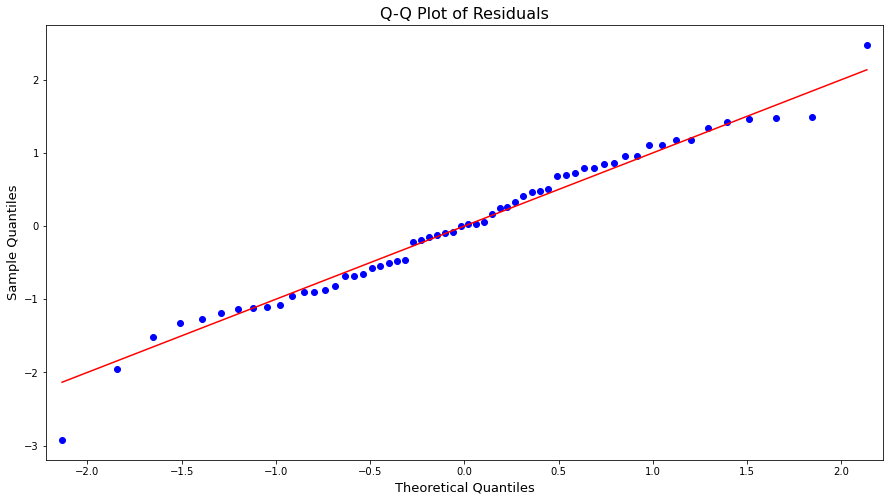

In [245]:
#QQ Plot Test - check the Normal distribution of residuals to ensure that the first asumption of ANOVA is satisfied. 
#As the plot is fairly linear along the diagonal, the assumption is considered satisfied.
res = model.resid
fig = qqplot(res, line='s', fit=True)
ax = plt.gca()
fig.set_size_inches(15,8)
ax.set_xlabel("Theoretical Quantiles", fontsize=13)
ax.set_ylabel("Sample Quantiles", fontsize=13)
ax.set_title("Q-Q Plot of Residuals", fontsize=16)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "ln_NH4_residuals.png")
plt.show()

#### Homogeneity Check

In [246]:
#A levene tests is then used to test the homoscedasticity of the groups. 
#An assumption of ANOVA is that the groups must be equal variance (homoscedatic)
#P-value more than 0.05 means groups are homoscedastic and assumption was satisfied
levene_test = levene(zero_df.ln_NH4, thirty_df.ln_NH4, sixty_df.ln_NH4, ninety_df.ln_NH4, onetwenty_df.ln_NH4)
levene_test

LeveneResult(statistic=0.9201822463721345, pvalue=0.4588838476351885)

#### Summary of ANOVA results for Nitrates in summer

In [247]:
#Two-way ANOVA was then completed using the statsmodels library. 
#The threshold was then adjusted using a Bonferroni correction (P-value/number of tests). 
#P-value was below this threshold, meaning the null hypothesis should be rejected.
table = anova_lm(model)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(sediments),4.0,13.172722,3.293180,3.580776,0.012827
C(nutrients),2.0,3.467137,1.733568,1.884962,0.163629
C(sediments):C(nutrients),8.0,3.169599,0.396200,0.430800,0.896301
Residual,45.0,41.385754,0.919683,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0     13   0.2731    0.9 -0.8028  1.349  False
     0     35     0.14    0.9 -0.9359 1.2159  False
     0     50  -0.1242    0.9 -1.2001 0.9517  False
     0     75   1.1953 0.0223  0.1194 2.2712   True
    13     35  -0.1331    0.9  -1.209 0.9428  False
    13     50  -0.3973  0.814 -1.4732 0.6786  False
    13     75   0.9222 0.1258 -0.1537 1.9981  False
    35     50  -0.2642    0.9 -1.3401 0.8117  False
    35     75   1.0553 0.0571 -0.0206 2.1312  False
    50     75   1.3195  0.009  0.2436 2.3954   True
---------------------------------------------------


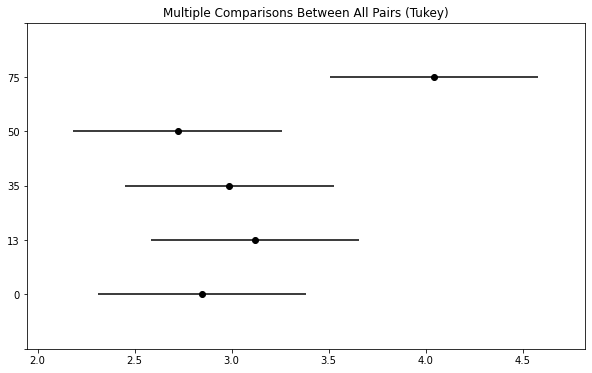

In [248]:
#To determine which groups had a significant difference from one another, a Tukey's HSD test was performed.
#The null hypothesis should be rejected for all the 'False' pairs.
mc = pairwise_tukeyhsd(df['ln_NH4'],df['sediments'])
result = mc._results_table
print(result)
_ = mc.plot_simultaneous()

### Phosphate levels for the fall

Before the natural log transformation, we changed the negative values to zero.

In [249]:
df = nutrients_df.query('Time == "12.12.17"')
df = df.replace(np.nan,0)
df[["sediments", "PO4"]].groupby("sediments").agg(['mean', 'sem'])

PO4          
               mean       sem
sediments                    
0          0.475000  0.189846
13         2.520833  1.898644
35         0.662500  0.176824
50         1.045000  0.533988
75         1.566667  0.433263

In [250]:
df.shape

(60, 8)

In [251]:
zero_df = df.query('sediments == "0"')
thirty_df = df.query('sediments == "13"')
sixty_df = df.query('sediments == "35"')
ninety_df = df.query('sediments == "50"')
onetwenty_df = df.query('sediments == "75"')

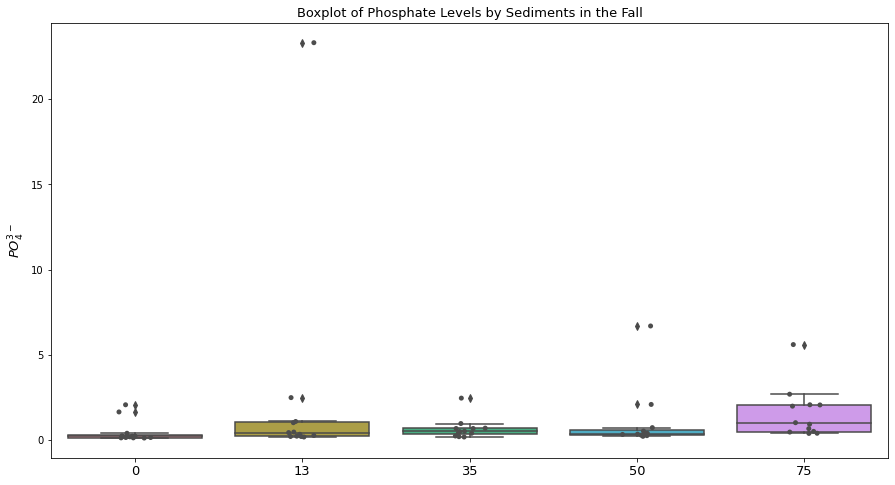

In [252]:
#I visualise the data using the seaborn library to create a boxplot of the subsidence for each sediment treatment.
#The middle line is the median.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="sediments", y="PO4", data=df, order=["0","13","35","50","75"]) 
sns.stripplot(x="sediments", y="PO4", data=df, order=["0","13","35","50","75"], jitter=0.1, color="0.3")  #
plt.title("Boxplot of Phosphate Levels by Sediments in the Fall", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2,3,4],["0","13","35","50","75"], fontsize=13)  #
plt.ylabel("$PO_4^{3-}$", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "PO4_boxplot.png")
plt.show()

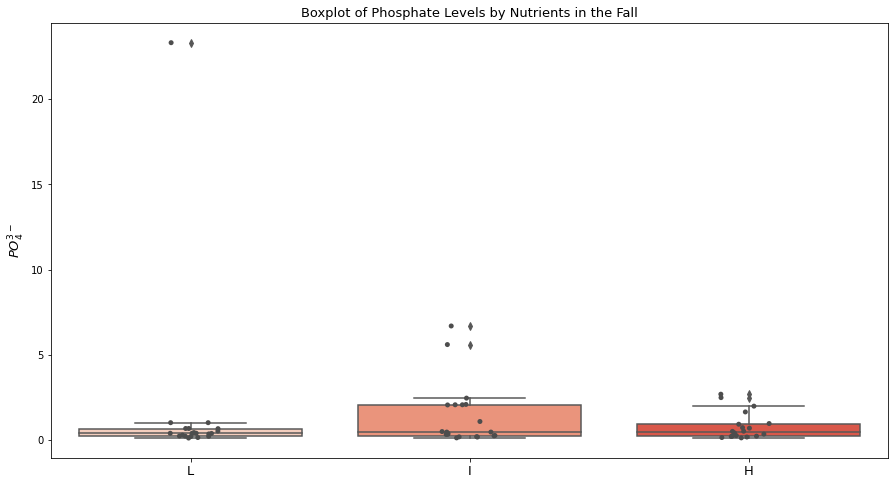

In [253]:
#I repeat this for each nutrient treatment.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="nutrients", y="PO4", data=df, order=["L","I","H"])  #,"90","120"
sns.stripplot(x="nutrients", y="PO4", data=df, order=["L","I","H"], jitter=0.1, color="0.3")  #,"90","120"
plt.title("Boxplot of Phosphate Levels by Nutrients in the Fall", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2],["L","I","H"], fontsize=13)  #,"90","120"
plt.ylabel("$PO_4^{3-}$", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "PO4_boxplot.png")
plt.show()

#### Normality Assumption Check of PO4

In [254]:
formula = 'ln_PO4 ~ C(sediments) *C(nutrients)'
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ln_PO4   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     1.554
Date:                Tue, 13 Oct 2020   Prob (F-statistic):              0.131
Time:                        15:28:25   Log-Likelihood:                -77.482
No. Observations:                  60   AIC:                             185.0
Df Residuals:                      45   BIC:                             216.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -1.2266      0.508     -2.414      0.020      -2.250      -0.203
C(sediments)[T.13]                       0.2684      0.719      0.373      0.711      -1.179       1.716
C(sediments)[T.35]                       0.7494      0.719      1.043      0.303      -0.698       2.197
C(sediments)[T.50]                       0.2392      0.719      0.333      0.741      -1.208       1.687
C(sediments)[T.75]                       1.4595      0.719      2.031      0.048       0.012       2.907
C(nutrients)[T.I]                        0.1366      0.719      0.190      0.850      -1.311       1.584
C(nutrients)[T.L]                       -0.3743      0.719     -0.521      0.605      -1.822       1.073
C(sediments)[T.13]:C(nutrients)[T.I]     0.0573      1.016      0.056      0.955      -1.990       2.104
C(sediments)[T.35]:C(nutrients)[T.I]    -0.4388      1.016     -0.432      0.668      -2.486       1.608
C(sediments)[T.50]:C(nutrients)[T.I]     1.0039      1.016      0.988      0.329      -1.043       3.051
C(sediments)[T.75]:C(nutrients)[T.I]     0.2349      1.016      0.231      0.818      -1.812       2.282
C(sediments)[T.13]:C(nutrients)[T.L]     1.5291      1.016      1.504      0.139      -0.518       3.576
C(sediments)[T.35]:C(nutrients)[T.L]     0.0727      1.016      0.072      0.943      -1.974       2.120
C(sediments)[T.50]:C(nutrients)[T.L]     0.2595      1.016      0.255      0.800      -1.788       2.307
C(sediments)[T.75]:C(nutrients)[T.L]    -0.4183      1.016     -0.412      0.683      -2.465       1.629
==============================================================================
Omnibus:                       12.214   Durbin-Watson:                   2.436
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.773
Skew:                           0.961   Prob(JB):                      0.00168
Kurtosis:                       4.188   Cond. No.                         21.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [255]:
w, pvalue = stats.shapiro(model.resid)
print("Shapiro: w", w, "pvalue", pvalue)
#If the p-value is >0.05 for all groups, we can conclude that residuals follow the Gaussian Distribution. This does not meet the Gaussian Distribution.

Shapiro: w 0.9390327334403992 pvalue 0.004902999382466078


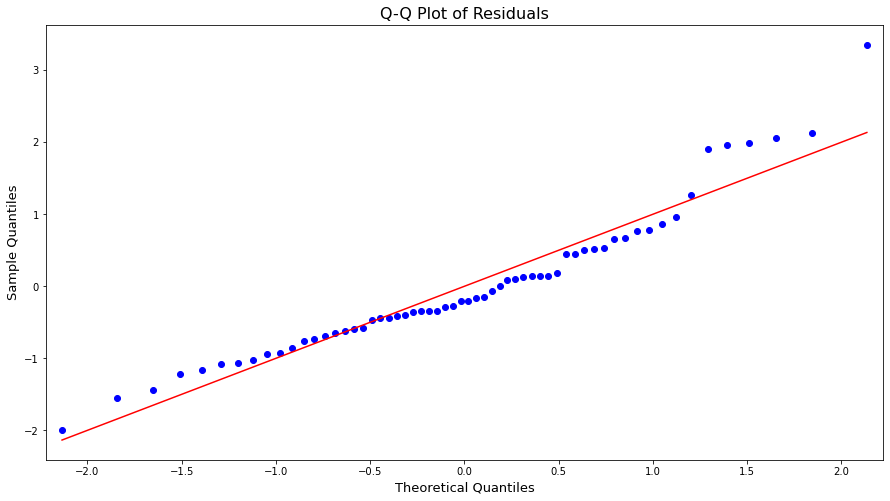

In [256]:
#QQ Plot Test - check the Normal distribution of residuals to ensure that the first asumption of ANOVA is satisfied. 
#As the plot is fairly linear along the diagonal, the assumption is considered satisfied.
res = model.resid
fig = qqplot(res, line='s', fit=True)
ax = plt.gca()
fig.set_size_inches(15,8)
ax.set_xlabel("Theoretical Quantiles", fontsize=13)
ax.set_ylabel("Sample Quantiles", fontsize=13)
ax.set_title("Q-Q Plot of Residuals", fontsize=16)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "ln_PO4_residuals.png")
plt.show()

#### Homogeneity Check

In [257]:
#A levene tests is then used to test the homoscedasticity of the groups. 
#An assumption of ANOVA is that the groups must be equal variance (homoscedatic)
#P-value more than 0.05 means groups are homoscedastic and assumption was satisfied
levene_test = levene(zero_df.ln_PO4, thirty_df.ln_PO4, sixty_df.ln_PO4, ninety_df.ln_PO4, onetwenty_df.ln_PO4)
levene_test

LeveneResult(statistic=0.5055732370274868, pvalue=0.7317713088844047)

#### Summary of ANOVA results of phosphates in the fall

In [258]:
#Two-way ANOVA was then completed using the statsmodels library. 
#The threshold was then adjusted using a Bonferroni correction (P-value/number of tests). 
#P-value was below this threshold, meaning the null hypothesis should be rejected.
table = anova_lm(model)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(sediments),4.0,11.927466,2.981866,2.886436,0.032811
C(nutrients),2.0,1.715531,0.857765,0.830314,0.442480
C(sediments):C(nutrients),8.0,8.828640,1.103580,1.068261,0.401951
Residual,45.0,46.487783,1.033062,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0     13   0.7972 0.3204 -0.3753 1.9697  False
     0     35   0.6274 0.5536 -0.5451 1.7999  False
     0     50   0.6603 0.5095 -0.5121 1.8328  False
     0     75   1.3984 0.0118  0.2259 2.5709   True
    13     35  -0.1698    0.9 -1.3423 1.0027  False
    13     50  -0.1368    0.9 -1.3093 1.0357  False
    13     75   0.6012 0.5887 -0.5713 1.7737  False
    35     50   0.0329    0.9 -1.1395 1.2054  False
    35     75    0.771 0.3542 -0.4015 1.9435  False
    50     75    0.738 0.3995 -0.4345 1.9105  False
---------------------------------------------------


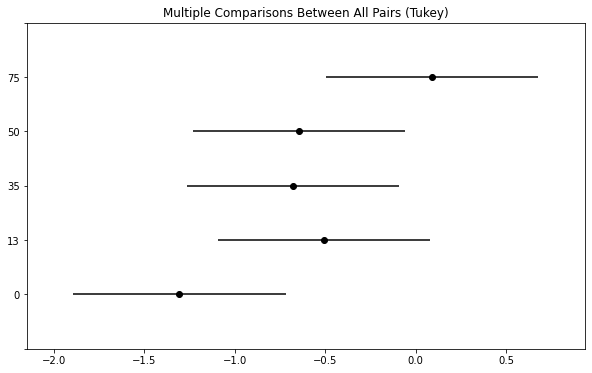

In [259]:
#To determine which groups had a significant difference from one another, a Tukey's HSD test was performed.
#The null hypothesis should be rejected for all the 'False' pairs.
mc = pairwise_tukeyhsd(df['ln_PO4'],df['sediments'])
result = mc._results_table
print(result)
_ = mc.plot_simultaneous()

### Nitrate levels for the fall

In [ ]:
df[["sediments", "NH4"]].groupby("sediments").agg(['mean', 'sem'])

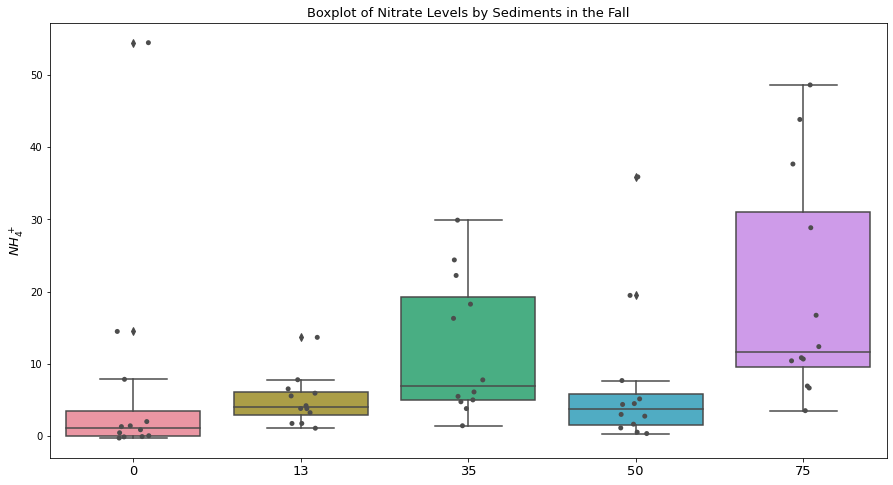

In [260]:
#I visualise the data using the seaborn library to create a boxplot of the subsidence for each sediment treatment.
#The middle line is the median.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="sediments", y="NH4", data=df, order=["0","13","35","50","75"]) 
sns.stripplot(x="sediments", y="NH4", data=df, order=["0","13","35","50","75"], jitter=0.1, color="0.3")  #
plt.title("Boxplot of Nitrate Levels by Sediments in the Fall", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2,3,4],["0","13","35","50","75"], fontsize=13)  #
plt.ylabel("$NH_4^+$", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "NH4_boxplot.png")
plt.show()

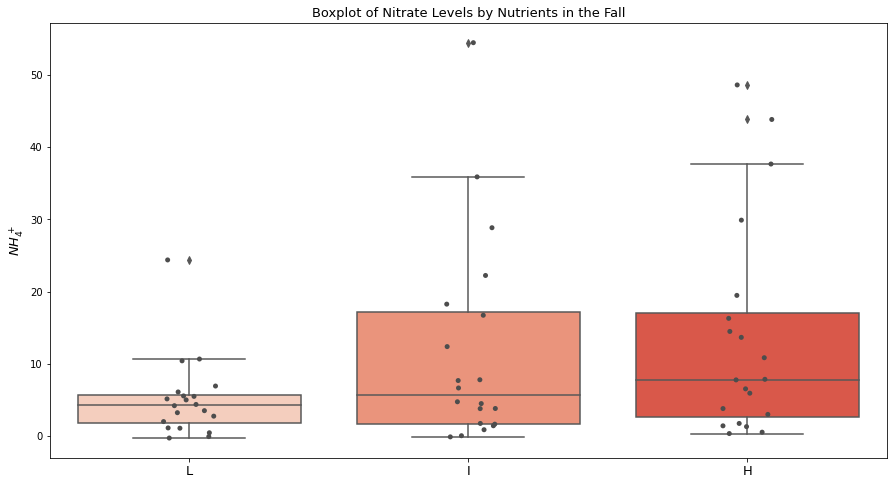

In [261]:
#I repeat this for each nutrient treatment.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="nutrients", y="NH4", data=df, order=["L","I","H"])  #,"90","120"
sns.stripplot(x="nutrients", y="NH4", data=df, order=["L","I","H"], jitter=0.1, color="0.3")  #,"90","120"
plt.title("Boxplot of Nitrate Levels by Nutrients in the Fall", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2],["L","I","H"], fontsize=13)  #,"90","120"
plt.ylabel("$NH_4^+$", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "NH4_boxplot.png")
plt.show()

#### Normality Assumption Check for natural log of Nitrates

In [262]:
formula = 'ln_NH4 ~ C(sediments) *C(nutrients)'
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ln_NH4   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     2.364
Date:                Tue, 13 Oct 2020   Prob (F-statistic):             0.0148
Time:                        15:28:28   Log-Likelihood:                -87.848
No. Observations:                  60   AIC:                             205.7
Df Residuals:                      45   BIC:                             237.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                1.3348      0.604      2.210      0.032       0.118       2.551
C(sediments)[T.13]                       0.3714      0.854      0.435      0.666      -1.349       2.092
C(sediments)[T.35]                       1.0585      0.854      1.239      0.222      -0.662       2.779
C(sediments)[T.50]                      -0.7472      0.854     -0.875      0.386      -2.468       0.973
C(sediments)[T.75]                       2.0842      0.854      2.440      0.019       0.364       3.805
C(nutrients)[T.I]                       -1.1750      0.854     -1.375      0.176      -2.896       0.546
C(nutrients)[T.L]                       -1.3611      0.854     -1.593      0.118      -3.082       0.359
C(sediments)[T.13]:C(nutrients)[T.I]     0.7880      1.208      0.652      0.518      -1.645       3.221
C(sediments)[T.35]:C(nutrients)[T.I]     0.7599      1.208      0.629      0.533      -1.673       3.193
C(sediments)[T.50]:C(nutrients)[T.I]     2.4912      1.208      2.062      0.045       0.058       4.924
C(sediments)[T.75]:C(nutrients)[T.I]     0.4032      1.208      0.334      0.740      -2.030       2.836
C(sediments)[T.13]:C(nutrients)[T.L]     0.7545      1.208      0.625      0.535      -1.679       3.188
C(sediments)[T.35]:C(nutrients)[T.L]     1.0464      1.208      0.866      0.391      -1.387       3.480
C(sediments)[T.50]:C(nutrients)[T.L]     1.8327      1.208      1.517      0.136      -0.601       4.266
C(sediments)[T.75]:C(nutrients)[T.L]    -0.0830      1.208     -0.069      0.946      -2.516       2.350
==============================================================================
Omnibus:                       10.439   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               22.979
Skew:                           0.332   Prob(JB):                     1.02e-05
Kurtosis:                       5.958   Cond. No.                         21.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [263]:
w, pvalue = stats.shapiro(model.resid)
print("Shapiro: w", w, "pvalue", pvalue)
#If the p-value is >0.05 for all groups, we can conclude that residuals follow the Gaussian Distribution. This does not meet the Gaussian Distribution.

Shapiro: w 0.9470245838165283 pvalue 0.011311745271086693


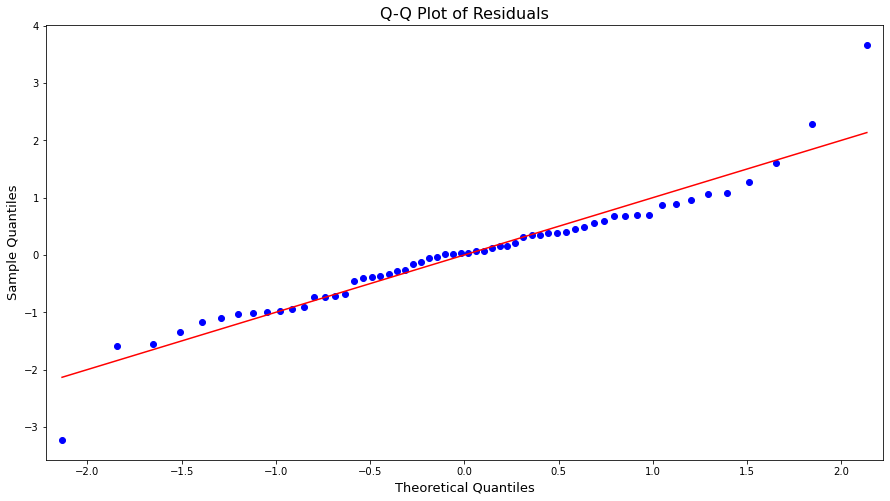

In [264]:
#QQ Plot Test - check the Normal distribution of residuals to ensure that the first asumption of ANOVA is satisfied. 
#As the plot is fairly linear along the diagonal, the assumption is considered satisfied.
res = model.resid
fig = qqplot(res, line='s', fit=True)
ax = plt.gca()
fig.set_size_inches(15,8)
ax.set_xlabel("Theoretical Quantiles", fontsize=13)
ax.set_ylabel("Sample Quantiles", fontsize=13)
ax.set_title("Q-Q Plot of Residuals", fontsize=16)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "ln_NH4_residuals.png")
plt.show()

#### Homogeneity Check

In [265]:
#A levene tests is then used to test the homoscedasticity of the groups. 
#An assumption of ANOVA is that the groups must be equal variance (homoscedatic)
#P-value more than 0.05 means groups are homoscedastic and assumption was satisfied
levene_test = levene(zero_df.ln_NH4, thirty_df.ln_NH4, sixty_df.ln_NH4, ninety_df.ln_NH4, onetwenty_df.ln_NH4)
levene_test

LeveneResult(statistic=1.251538002998129, pvalue=0.30015582091395826)

#### Summary of ANOVA results for nitrates in the fall

In [266]:
#Two-way ANOVA was then completed using the statsmodels library. 
#The threshold was then adjusted using a Bonferroni correction (P-value/number of tests). 
#P-value was below this threshold, meaning the null hypothesis should be rejected.
table = anova_lm(model)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(sediments),4.0,35.090454,8.772614,6.010742,0.000580
C(nutrients),2.0,4.258531,2.129265,1.458911,0.243275
C(sediments):C(nutrients),8.0,8.964198,1.120525,0.767751,0.632612
Residual,45.0,65.677023,1.459489,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0     13   0.8856 0.3788 -0.4935 2.2646  False
     0     35   1.6606 0.0107  0.2815 3.0397   True
     0     50   0.6941 0.6035  -0.685 2.0732  False
     0     75   2.1909  0.001  0.8119   3.57   True
    13     35   0.7751 0.5113  -0.604 2.1541  False
    13     50  -0.1914    0.9 -1.5705 1.1876  False
    13     75   1.3054 0.0719 -0.0737 2.6844  False
    35     50  -0.9665  0.291 -2.3456 0.4126  False
    35     75   0.5303   0.79 -0.8488 1.9094  False
    50     75   1.4968  0.027  0.1177 2.8759   True
---------------------------------------------------


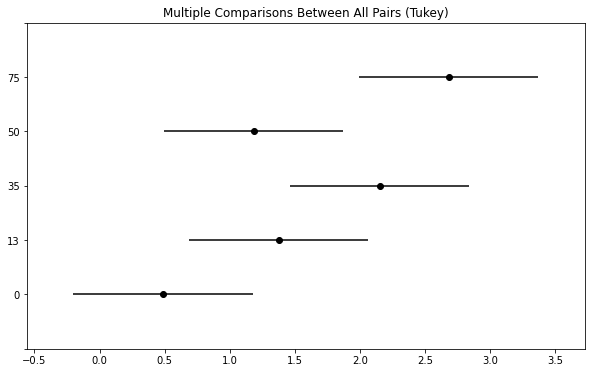

In [267]:
#To determine which groups had a significant difference from one another, a Tukey's HSD test was performed.
#The null hypothesis should be rejected for all the 'False' pairs.
mc = pairwise_tukeyhsd(df['ln_NH4'],df['sediments'])
result = mc._results_table
print(result)
_ = mc.plot_simultaneous()

## Porewater Readings

### Porewater - Salinity

In order to sustain the brackish marsh environment, the salinity (psu) and sulfides (mM) had to be continuously monitored and maintained. We had to continuously maintain 0S6, 3S4, and 12S7, so those were removed to get an averaged value.

In [343]:
#Reading the data
porewater = pd.read_excel (r'C:\Users\molli\Dropbox\Publish\Working Graphs for Publication_2020_revised.xlsx', sheet_name='Porewater', index_col=0) 
df = pd.DataFrame(porewater, columns= ['Plots','Sulfides_average','Salt_average','pH_average','nutrients', 'sediments'])
df['sediments'] = df['sediments'].astype('str')
df = df[~df['Plots'].isin(['0S6','3S4','12S7'])]
df['Salt'] = np.sqrt(df['Salt_average']) 

In [344]:
df[["sediments", "Salt_average"]].groupby("sediments").agg(['mean', 'sem'])

Salt_average          
                  mean       sem
sediments                       
0             5.809091  0.307598
13            6.154545  0.265536
35            6.639583  0.236140
50            5.841667  0.227643
75            6.202273  0.364262

In [345]:
zero_df = df.query('sediments == "0"')
thirty_df = df.query('sediments == "13"')
sixty_df = df.query('sediments == "35"')
ninety_df = df.query('sediments == "50"')
onetwenty_df = df.query('sediments == "75"')

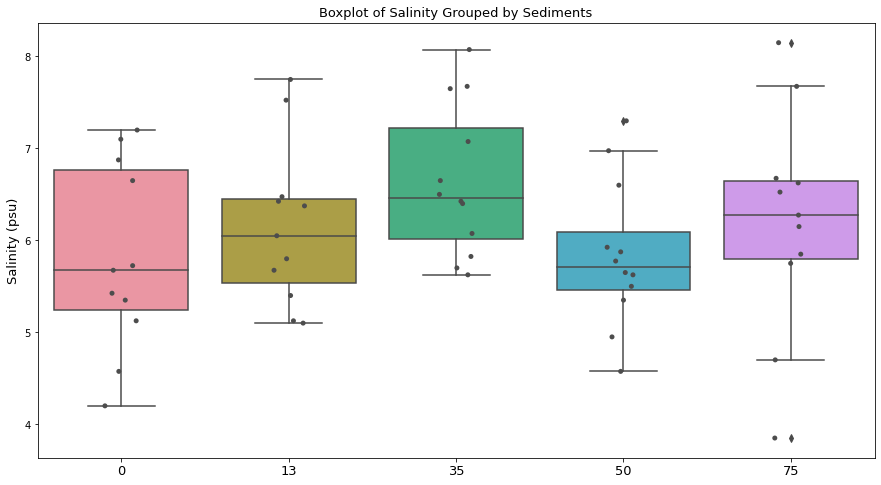

In [346]:
#I visualise the data using the seaborn library to create a boxplot of the subsidence for each sediment treatment.
#The middle line is the median.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="sediments", y="Salt_average", data=df, order=["0","13","35","50","75"]) 
sns.stripplot(x="sediments", y="Salt_average", data=df, order=["0","13","35","50","75"], jitter=0.1, color="0.3")  #
plt.title("Boxplot of Salinity Grouped by Sediments", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2,3,4],["0","13","35","50","75"], fontsize=13)  #
plt.ylabel("Salinity (psu)", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "Salt_average_boxplot.png")
plt.show()

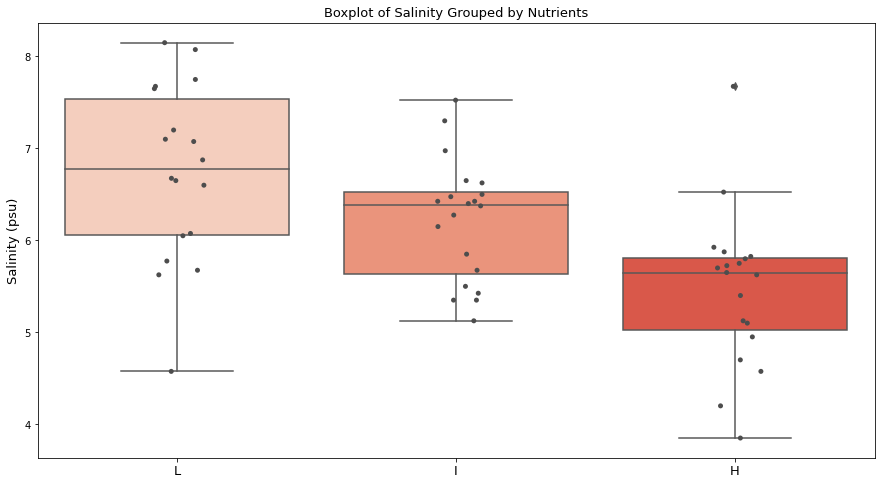

In [347]:
#I repeat this for each nutrient treatment.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="nutrients", y="Salt_average", data=df, order=["L","I","H"])  #,"90","120"
sns.stripplot(x="nutrients", y="Salt_average", data=df, order=["L","I","H"], jitter=0.1, color="0.3")  #,"90","120"
plt.title("Boxplot of Salinity Grouped by Nutrients", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2],["L","I","H"], fontsize=13)  #,"90","120"
plt.ylabel("Salinity (psu)", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "Salt_average_nutrients_boxplot.png")
plt.show()

### Porewater - Sulfides

The same outliers for salinity measurements apply here. They were removed to get average value for sulfide readings.

In [348]:
df['Sulfide'] = df['Sulfides_average']
df[["sediments", "Sulfides_average"]].groupby("sediments").agg(['mean', 'sem'])

Sulfides_average           
                      mean        sem
sediments                            
0              -454.272727   7.077182
13             -443.939394  15.943006
35             -473.583333  18.966128
50             -531.500000  14.069303
75             -455.878788  23.515062

In [291]:
zero_df = df.query('sediments == "0"')
thirty_df = df.query('sediments == "13"')
sixty_df = df.query('sediments == "35"')
ninety_df = df.query('sediments == "50"')
onetwenty_df = df.query('sediments == "75"')

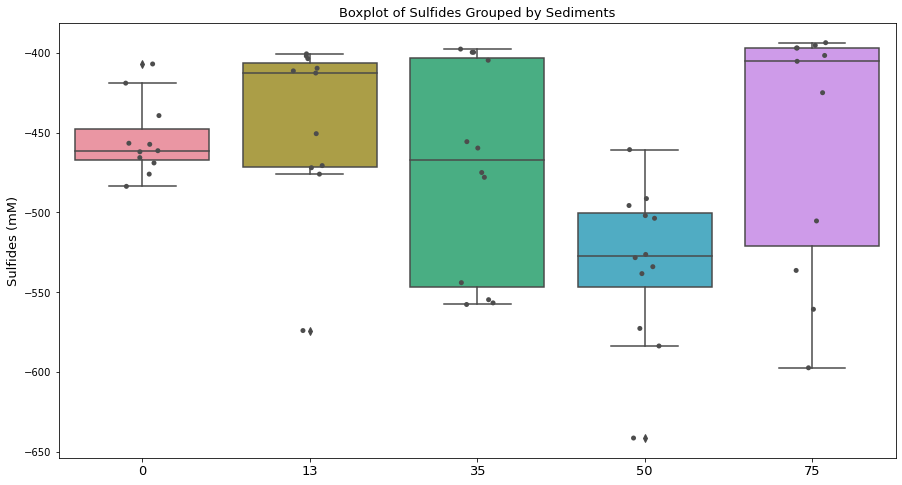

In [292]:
#I visualise the data using the seaborn library to create a boxplot of the subsidence for each sediment treatment.
#The middle line is the median.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="sediments", y="Sulfides_average", data=df, order=["0","13","35","50","75"]) 
sns.stripplot(x="sediments", y="Sulfides_average", data=df, order=["0","13","35","50","75"], jitter=0.1, color="0.3")  #
plt.title("Boxplot of Sulfides Grouped by Sediments", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2,3,4],["0","13","35","50","75"], fontsize=13)  #
plt.ylabel("Sulfides (mM)", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "Sulfides_average_boxplot.png")
plt.show()

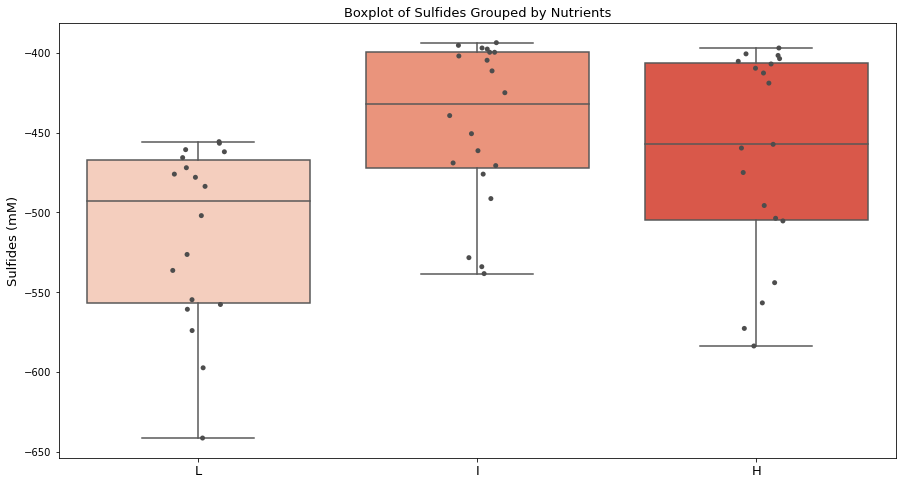

In [293]:
#I repeat this for each nutrient treatment.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="nutrients", y="Sulfides_average", data=df, order=["L","I","H"])  #,"90","120"
sns.stripplot(x="nutrients", y="Sulfides_average", data=df, order=["L","I","H"], jitter=0.1, color="0.3")  #,"90","120"
plt.title("Boxplot of Sulfides Grouped by Nutrients", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2],["L","I","H"], fontsize=13)  #,"90","120"
plt.ylabel("Sulfides (mM)", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "Sulfides_nutrients_boxplot.png")
plt.show()

### Porewater - pH

The same outliers for salinity and sulfides apply to pH. Theses outliers were removed to get average value for pH readings throughout the experiment.

In [298]:
df['pH'] = df['pH_average']
df[["sediments", "pH_average"]].groupby("sediments").agg(['mean', 'sem'])

pH_average          
                mean       sem
sediments                     
0           6.516591  0.181397
13          6.332273  0.268576
35          6.720625  0.084443
50          6.788958  0.071622
75          6.254091  0.250107

In [299]:
zero_df = df.query('sediments == "0"')
thirty_df = df.query('sediments == "13"')
sixty_df = df.query('sediments == "35"')
ninety_df = df.query('sediments == "50"')
onetwenty_df = df.query('sediments == "75"')

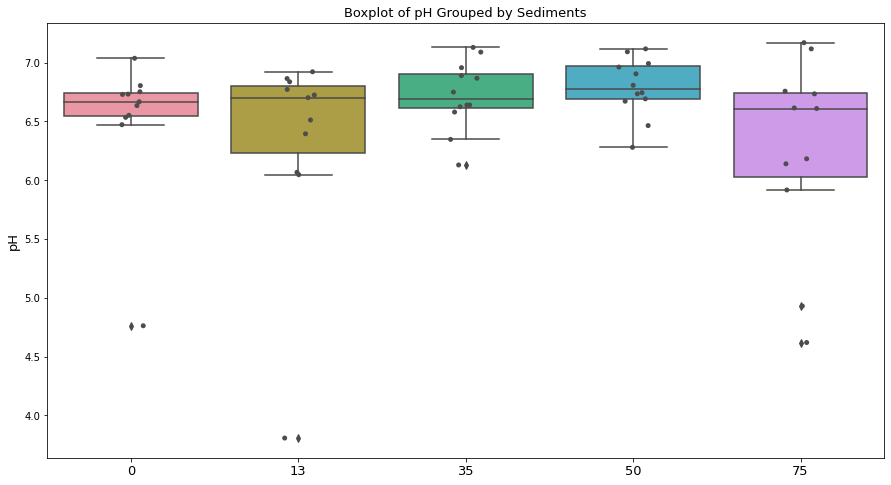

In [300]:
#I visualise the data using the seaborn library to create a boxplot of the subsidence for each sediment treatment.
#The middle line is the median.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="sediments", y="pH_average", data=df, order=["0","13","35","50","75"]) 
sns.stripplot(x="sediments", y="pH_average", data=df, order=["0","13","35","50","75"], jitter=0.1, color="0.3")  #
plt.title("Boxplot of pH Grouped by Sediments", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2,3,4],["0","13","35","50","75"], fontsize=13)  #
plt.ylabel("pH", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "pH_average_boxplot.png")
plt.show()

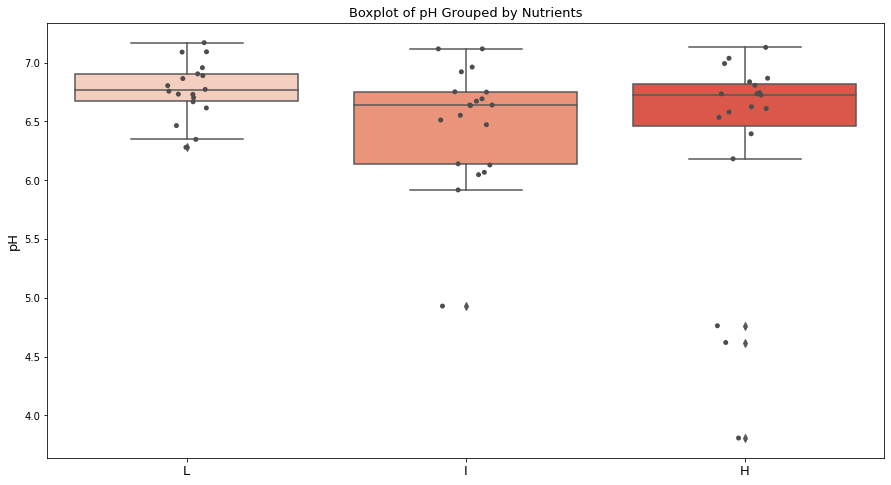

In [301]:
#I repeat this for each nutrient treatment.
plt.figure(figsize=(15,8))
#sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="nutrients", y="pH_average", data=df, order=["L","I","H"])  #,"90","120"
sns.stripplot(x="nutrients", y="pH_average", data=df, order=["L","I","H"], jitter=0.1, color="0.3")  #,"90","120"
plt.title("Boxplot of pH Grouped by Nutrients", fontsize=13)
plt.xlabel("")
plt.xticks([0,1,2],["L","I","H"], fontsize=13)  #,"90","120"
plt.ylabel("pH", fontsize=13)

file_path = "C:/Users/molli/Dropbox/Thesis/Thesis/plots"
plt.savefig(file_path + "pH_nutrients_boxplot.png")
plt.show()

In [304]:
#Blogs and helpful github scripts
#https://github.com/marsja/jupyter/blob/master/Python_ANOVA/Python_ANOVA_Factorial_Using_Statsmodels.ipynb
#https://github.com/VaibhawKumar/Advanced-Da/blob/master/untitled76.py
#https://stackoverflow.com/questions/49963138/label-groups-from-tuekys-test-results-according-to-significant
#https://github.com/faragunaj/white-pipeline/blob/0d81ce39205d9763839bdad993f099fc3124d2df/modules.py
#https://github.com/search?l=Python&q=levene+test+2+way&type=Code
#https://github.com/maximtrp/scikit-posthocs
#https://github.com/ravimalde/ufc_fighter_stance/blob/a45d022d9cdddca449bedf5fde7127259182185d/.ipynb_checkpoints/UFC_fighter_details-checkpoint.ipynb